<a href="https://colab.research.google.com/github/opentrainingcamp/python/blob/main/exemple1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Objectif de la mission

Dans l'optique d'un développement à l'international, notre entreprise de cours en ligne souhaite avoir plus d'information sur le marché mondial. Elle souhaite définir ses priorités d'implantation à partir de différents critères.

Pour cela, il me faut réaliser une analyser exploraroire des données sur les mondiales de l'éducation (Taux d'investissement dans l'éducation, nombre d'élèves, taux d'équipement en internet...)

## Besoin exprimé
Notre entreprise souhaite avoir des réponses à ces questions :

- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays notre entreprise doit-elle opérer en priorité ?

## Mode opératoire:
- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

## Avant-Propos

Pour notre étude, nous nous appuierons sur différentes données : EdStatsCountry, EdStatsCountry-Series, EdStatsData, EdStatsFootnote et EdStatsSeries.

Avant de détailler, il est important de préciser que seul les éléments retenus dans l'étude seront évoqués dans la description des données.    
Présentons maintenant nos données:
    
- EdStatsCountry comporte des données sur la région et le revenu des pays.
- EdStatsCountry-Series contient des données qui auraient pu nous servir en tant que clé, mais nous ne les avons pas retenus   
- EdStatsFootNote comportait des séries comme le 'Country Code' qui auraient pu nous servir de clés mais nous ne l'avons pas retenus
- EdStatsData comporte le nom des pays, les indicateurs qui y sont rattachés ainsi que les données allant de l'année 1970 à des données prévisionnelles au delà de 2021. Ce dataframe nous a permis de définir différentes clés pour notre traitement de données. Nous nous sommes ainsi servi de ces series : 'Indicator Name', 'Country Name' et 'Region'.
- EdStatsSeries nous a permis de lire les descriptions complètes des différentes indicateurs afin de mieux les sélectionner.

### Chargement des fichiers nécessaires

Exemple où on récupère un fichier depuis le web , en local

In [ ]:
!wget https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/DAN-P4-FAO.zip
!unzip DAN-P4-FAO.zip

Un exemple pour charger un dataframe directement depuis le web

In [ ]:
erp_df = pd.read_excel('https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/P5+ERP+vin/erp.xlsx')

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Recuperer le fichier en local

In [ ]:
!wget https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/P5+ERP+vin/web.xlsx

In [ ]:
df_web = pd.read_excel('web.xlsx')

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
df_web.head()

In [ ]:
erp_df.head()

product_id  onsale_web  price  stock_quantity stock_status
0        3847           1   24.2               0   outofstock
1        3849           1   34.3               0   outofstock
2        3850           1   20.8               0   outofstock
3        4032           1   14.1               0   outofstock
4        4039           1   46.0               0   outofstock

In [ ]:
# On donne le chemin d'accès du fichier qu'on souhaite afficher. On enregistre la lecture de ce fichier, ici sous le nom "Country".
# Dans les propriétés du fichier à afficher, aller dans l'onglet sécurité puis copier le "nom de l'objet" en entier. Attention : Il ressemble à un chemin d'accès, ne pas confondre.
# Penser à toujours ajouter r juste après la parenthèse, vérifier également les parenthèses
# Pour afficher quelques lignes du dataframe, on utilise la commande data.head() 

Country = pd.read_csv('EdStatsCountry.csv')
Country.head()

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

            IMF data dissemination standard  \
0                                       NaN   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   
3                 2010.0            2012.0                         2006   
4                    NaN            2006.0                          NaN   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 32 columns]

In [ ]:
Country_Series = pd.read_csv(r'C:\Users\Clément\Documents\Data Openclassrooms\Fichiers projets 1\Fichier Edstat .csv\data\EdStatsCountry-Series.csv')
Country_Series.head()

FileNotFoundError: ignored

In [ ]:
Data = pd.read_csv(r'C:\Users\Clément\Documents\Data Openclassrooms\Fichiers projets 1\Fichier Edstat .csv\data\EdStatsData.csv')
Data.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [ ]:
FootNote = pd.read_csv(r'C:\Users\Clément\Documents\Data Openclassrooms\Fichiers projets 1\Fichier Edstat .csv\data\EdStatsFootNote.csv')
FootNote.head()

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [ ]:
Series = pd.read_csv(r'C:\Users\Clément\Documents\Data Openclassrooms\Fichiers projets 1\Fichier Edstat .csv\data\EdStatsSeries.csv')
Series.head()

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   
3         NaN         NaN         NaN                NaN  ...   
4         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   
3                        NaN               NaN   
4                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   
3                  NaN             NaN                 NaN           NaN   
4                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

In [ ]:
# On veut afficher les intitulés des colonnes
# L'objectif est de fusionner les dataframes qui ont au moins un intitulé en commun, dans le cas contraire, il y aura une erreur.
# On donne le nom du dataframe concerné puis on ajoute "".columns" ---->  nomdudataframe.columns

Country.columns


Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [ ]:
Country_Series.columns

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

In [ ]:
FootNote.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')

In [ ]:
Series.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

### Fusion des dataframes à partir de variables communes 

In [ ]:
# Je veux fusionner l'ensemble des données

Data_Country = pd.merge(Data, Country, on='Country Code', how= 'left')
Data_Country.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   

   IMF data dissemination standard  Latest population census  \
0                              NaN                       NaN   
1                              NaN                       NaN   
2                              NaN                       NaN   
3                              NaN                       NaN   
4                              NaN                       NaN   

   Latest household survey  Source of most recent Income and expenditure data  \
0                      NaN                                                NaN   
1                      NaN                                                NaN   
2                      NaN                                                NaN   
3                      NaN                                                NaN   
4                      NaN                                                NaN   

   Vital registration complete  Latest agricultural census  \
0                          NaN                         NaN   
1                          NaN                         NaN   
2                          NaN                         NaN   
3                          NaN                         NaN   
4                          NaN                         NaN   

   Latest industrial data  Latest trade data  Latest water withdrawal data  \
0                     NaN                NaN                           NaN   
1                     NaN                NaN                           NaN   
2                     NaN                NaN                           NaN   
3                     NaN                NaN                           NaN   
4                     NaN                NaN                           NaN   

   Unnamed: 31  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 101 columns]

In [ ]:
#Je souhaite vérifier que le merge s'est correctement passé en comparant les anciennes et les nouvelles proportions des dataframes

print(Country.shape)
print(Data.shape)
print(Data_Country.shape)

(241, 32)
(886930, 70)
(886930, 101)


In [ ]:
Data_Country.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975',
       ...
       'IMF data dissemination standard', 'Latest population census',
       'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object', length=101)

In [ ]:
Data_Country_cols = Data_Country.columns

In [ ]:
# La fonction ".sum" indique que je veux la somme de  l'ensemble des données nulles par colonne.
# Aucune valeur nulle n'est présente dans la colonne "Country Name"
# 814 642 valeurs sont manquantes dans la colonne correspondante à l'année 1970.
# IMPORTANT : Dans pandas, .sum va convertir les valeurs True et False en valeur numérique. True = 1 et False = 0

Data_Country.isnull().sum()

Country Name                         0
Country Code                         0
Indicator Name                       0
Indicator Code                       0
1970                            814642
                                 ...  
Latest agricultural census      366500
Latest industrial data          494775
Latest trade data               208905
Latest water withdrawal data    230895
Unnamed: 31                     886930
Length: 101, dtype: int64

In [ ]:
# Rappel :

# axis=0 lis les données, de haut en bas dans le dataframe. Dans le sens des lignes donc.
# axis=1 ---------------- de haut en bas -----------------. Dans le sens des colonnes.    

# La fonction drop.na fonction par défaut avec axis=0

# La fonction drop.na sert à se débarasser des valeurs manquantes.
# Ici, en précisant (how='all'), je demande à me débarasser de la totalité des lignes (de la variable) 
# si l'ensemble, ("all") des valeurs y sont manquantes.
# How='any' : si au moins une valeur est manquantes, on se débarrasse de la variable.

Data_Country.dropna(how='all').shape

(886930, 101)

In [ ]:
# La fonction précédente n'a pas été efficace. On va affecter un taux de valeurs manquantes à la fonction pour savoir si on garde la variables concernées.

len(Data_Country)

886930

In [ ]:
df1 = pd.merge(Country, Data, how= 'left')
df1.head()

Country Code Short Name Table Name Long Name 2-alpha code  Currency Unit  \
0          ABW      Aruba      Aruba     Aruba           AW  Aruban florin   
1          ABW      Aruba      Aruba     Aruba           AW  Aruban florin   
2          ABW      Aruba      Aruba     Aruba           AW  Aruban florin   
3          ABW      Aruba      Aruba     Aruba           AW  Aruban florin   
4          ABW      Aruba      Aruba     Aruba           AW  Aruban florin   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  SNA data for 2000-2011 are updated from offici...   
2  SNA data for 2000-2011 are updated from offici...   
3  SNA data for 2000-2011 are updated from offici...   
4  SNA data for 2000-2011 are updated from offici...   

                      Region          Income Group WB-2 code  ... 2060  2065  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...  NaN   NaN   
1  Latin America & Caribbean  High income: nonOECD        AW  ...  NaN   NaN   
2  Latin America & Caribbean  High income: nonOECD        AW  ...  NaN   NaN   
3  Latin America & Caribbean  High income: nonOECD        AW  ...  NaN   NaN   
4  Latin America & Caribbean  High income: nonOECD        AW  ...  NaN   NaN   

  2070 2075 2080 2085 2090 2095 2100 Unnamed: 69  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN         NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN         NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN         NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN         NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN         NaN  

[5 rows x 101 columns]

In [ ]:
df1.shape

(886930, 101)

In [ ]:
df2 = pd.merge(Series, df1, how= 'left')
df2.head()

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1  BAR.NOED.1519.FE.ZS  Attainment   
2  BAR.NOED.1519.FE.ZS  Attainment   
3  BAR.NOED.1519.FE.ZS  Attainment   
4  BAR.NOED.1519.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of female population age...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of female population age...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of female population age 15-19 with...   
2  Percentage of female population age 15-19 with...   
3  Percentage of female population age 15-19 with...   
4  Percentage of female population age 15-19 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of female population age 15-19 with...              NaN   
2  Percentage of female population age 15-19 with...              NaN   
3  Percentage of female population age 15-19 with...              NaN   
4  Percentage of female population age 15-19 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  ... 2060  2065 2070  \
0         NaN         NaN         NaN                NaN  ...  NaN   NaN  NaN   
1         NaN         NaN         NaN                NaN  ...  NaN   NaN  NaN   
2         NaN         NaN         NaN                NaN  ...  NaN   NaN  NaN   
3         NaN         NaN         NaN                NaN  ...  NaN   NaN  NaN   
4         NaN         NaN         NaN                NaN  ...  NaN   NaN  NaN   

  2075 2080 2085 2090  2095  2100  Unnamed: 69  
0  NaN  NaN  NaN  NaN   NaN   NaN          NaN  
1  NaN  NaN  NaN  NaN   NaN   NaN          NaN  
2  NaN  NaN  NaN  NaN   NaN   NaN          NaN  
3  NaN  NaN  NaN  NaN   NaN   NaN          NaN  
4  NaN  NaN  NaN  NaN   NaN   NaN          NaN  

[5 rows x 121 columns]

In [ ]:
df2.shape

(887392, 121)

In [ ]:
# Je cible les colonnes que je souhaite conserver parmis celles que j'ai présélectionné.

cols = ['Indicator Name', 'Long definition', 'Unit of measure', 'Periodicity', 'Base Period', 'Development relevance', 'Related indicators', 'Region', 'Income Group', 'SNA price valuation', 'Lending category', 'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'External debt Reporting status', 'Latest population census', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Country Name', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
data_to_study = df2[cols]
data_to_study.head()

Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of female population age...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of female population age...   
4  Barro-Lee: Percentage of female population age...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of female population age 15-19 with...              NaN   
2  Percentage of female population age 15-19 with...              NaN   
3  Percentage of female population age 15-19 with...              NaN   
4  Percentage of female population age 15-19 with...              NaN   

  Periodicity Base Period Development relevance  Related indicators  \
0         NaN         NaN                   NaN                 NaN   
1         NaN         NaN                   NaN                 NaN   
2         NaN         NaN                   NaN                 NaN   
3         NaN         NaN                   NaN                 NaN   
4         NaN         NaN                   NaN                 NaN   

                      Region          Income Group  \
0  Latin America & Caribbean  High income: nonOECD   
1                 South Asia            Low income   
2         Sub-Saharan Africa   Upper middle income   
3      Europe & Central Asia   Upper middle income   
4      Europe & Central Asia  High income: nonOECD   

                    SNA price valuation  ... 2008 2009   2010 2011 2012 2013  \
0     Value added at basic prices (VAB)  ...  NaN  NaN    NaN  NaN  NaN  NaN   
1     Value added at basic prices (VAB)  ...  NaN  NaN  59.18  NaN  NaN  NaN   
2  Value added at producer prices (VAP)  ...  NaN  NaN    NaN  NaN  NaN  NaN   
3     Value added at basic prices (VAB)  ...  NaN  NaN   0.95  NaN  NaN  NaN   
4                                   NaN  ...  NaN  NaN    NaN  NaN  NaN  NaN   

  2014 2015 2016  2017  
0  NaN  NaN  NaN   NaN  
1  NaN  NaN  NaN   NaN  
2  NaN  NaN  NaN   NaN  
3  NaN  NaN  NaN   NaN  
4  NaN  NaN  NaN   NaN  

[5 rows x 40 columns]

In [ ]:
data_to_study.shape

(887392, 40)

### Filtrage des valeurs manquantes 

In [ ]:
# On va affecter un taux de valeurs manquantes à la fonction pour savoir si on garde la variables concernées.

df4 = data_to_study.dropna(thresh=len( data_to_study.columns)*0.7)

In [ ]:
df4

Indicator Name  \
147863               Internet users (per 100 people)   
147864               Internet users (per 100 people)   
147865               Internet users (per 100 people)   
147868               Internet users (per 100 people)   
147869               Internet users (per 100 people)   
...                                              ...   
812849  Unemployment, total (% of total labor force)   
812851  Unemployment, total (% of total labor force)   
812852  Unemployment, total (% of total labor force)   
812853  Unemployment, total (% of total labor force)   
812854  Unemployment, total (% of total labor force)   

                                          Long definition  Unit of measure  \
147863  Internet users are individuals who have used t...              NaN   
147864  Internet users are individuals who have used t...              NaN   
147865  Internet users are individuals who have used t...              NaN   
147868  Internet users are individuals who have used t...              NaN   
147869  Internet users are individuals who have used t...              NaN   
...                                                   ...              ...   
812849                                                NaN              NaN   
812851                                                NaN              NaN   
812852                                                NaN              NaN   
812853                                                NaN              NaN   
812854                                                NaN              NaN   

       Periodicity Base Period Development relevance  Related indicators  \
147863      Annual         NaN                   NaN                 NaN   
147864      Annual         NaN                   NaN                 NaN   
147865      Annual         NaN                   NaN                 NaN   
147868      Annual         NaN                   NaN                 NaN   
147869      Annual         NaN                   NaN                 NaN   
...            ...         ...                   ...                 ...   
812849         NaN         NaN                   NaN                 NaN   
812851         NaN         NaN                   NaN                 NaN   
812852         NaN         NaN                   NaN                 NaN   
812853         NaN         NaN                   NaN                 NaN   
812854         NaN         NaN                   NaN                 NaN   

                            Region          Income Group  \
147863                  South Asia            Low income   
147864          Sub-Saharan Africa   Upper middle income   
147865       Europe & Central Asia   Upper middle income   
147868  Middle East & North Africa  High income: nonOECD   
147869   Latin America & Caribbean   Upper middle income   
...                            ...                   ...   
812849         East Asia & Pacific   Lower middle income   
812851  Middle East & North Africa   Lower middle income   
812852          Sub-Saharan Africa   Upper middle income   
812853          Sub-Saharan Africa   Lower middle income   
812854          Sub-Saharan Africa            Low income   

                         SNA price valuation  ...       2008   2009  \
147863     Value added at basic prices (VAB)  ...   1.840000   3.55   
147864  Value added at producer prices (VAP)  ...   1.900000   2.30   
147865     Value added at basic prices (VAB)  ...  23.860000  41.20   
147868  Value added at producer prices (VAP)  ...  63.000000  64.00   
147869     Value added at basic prices (VAB)  ...  28.112623  34.00   
...                                      ...  ...        ...    ...   
812849     Value added at basic prices (VAB)  ...   2.300000   4.40   
812851  Value added at producer prices (VAP)  ...  15.000000  14.60   
812852     Value added at basic prices (VAB)  ...  22.400000  23.50   
812853     Value added at basic prices (VAB)  ...   7.900000   8.60   
812854     Va

In [ ]:
# J'affiche les lignes uniques de mon df'

df4['Indicator Name'].unique

<bound method Series.unique of 147863                 Internet users (per 100 people)
147864                 Internet users (per 100 people)
147865                 Internet users (per 100 people)
147868                 Internet users (per 100 people)
147869                 Internet users (per 100 people)
                              ...                     
812849    Unemployment, total (% of total labor force)
812851    Unemployment, total (% of total labor force)
812852    Unemployment, total (% of total labor force)
812853    Unemployment, total (% of total labor force)
812854    Unemployment, total (% of total labor force)
Name: Indicator Name, Length: 71758, dtype: object>

In [ ]:
# Je convertis ces lignes en liste

df4['Indicator Name'].unique().tolist()

['Internet users (per 100 people)',
 'GDP, PPP (current international $)',
 'GDP, PPP (constant 2011 international $)',
 'GDP per capita (current US$)',
 'GDP per capita, PPP (current international $)',
 'GDP per capita, PPP (constant 2011 international $)',
 'GNI (current US$)',
 'GNI, PPP (current international $)',
 'GNI per capita, Atlas method (current US$)',
 'GNI per capita, PPP (current international $)',
 'Annual statutory teacher salaries in public institutions in USD. Primary. Starting salary',
 'Annual statutory teacher salaries in public institutions in USD. Primary. 15 years of experience',
 'Annual statutory teacher salaries in public institutions in USD. Primary. Top of scale',
 'Annual statutory teacher salaries in public institutions in USD. Lower Secondary. Starting salary',
 'Annual statutory teacher salaries in public institutions in USD. Lower Secondary. 15 years of experience',
 'Annual statutory teacher salaries in public institutions in USD. Lower Secondary. To

In [ ]:
df4_rows_list = df4['Indicator Name'].unique().tolist()

In [ ]:
df4_rows_list

['Internet users (per 100 people)',
 'GDP, PPP (current international $)',
 'GDP, PPP (constant 2011 international $)',
 'GDP per capita (current US$)',
 'GDP per capita, PPP (current international $)',
 'GDP per capita, PPP (constant 2011 international $)',
 'GNI (current US$)',
 'GNI, PPP (current international $)',
 'GNI per capita, Atlas method (current US$)',
 'GNI per capita, PPP (current international $)',
 'Annual statutory teacher salaries in public institutions in USD. Primary. Starting salary',
 'Annual statutory teacher salaries in public institutions in USD. Primary. 15 years of experience',
 'Annual statutory teacher salaries in public institutions in USD. Primary. Top of scale',
 'Annual statutory teacher salaries in public institutions in USD. Lower Secondary. Starting salary',
 'Annual statutory teacher salaries in public institutions in USD. Lower Secondary. 15 years of experience',
 'Annual statutory teacher salaries in public institutions in USD. Lower Secondary. To

### Sélection des variables 

In [ ]:
# fonction filtrage ligne (fonctionnel)

df4[df4['Indicator Name'].isin(['GDP, PPP (current international $)', 'GDP, PPP (constant 2011 international $)', 'GDP per capita, PPP (current international $)', 'GDP per capita, PPP (constant 2011 international $)', 'Government expenditure on secondary education as % of GDP (%)', 'Government expenditure on tertiary education as % of GDP (%)', 'Internet users (per 100 people)', 'Population growth (annual %)', 'Population, total'])]
df5 = df4[df4['Indicator Name'].isin(['GDP, PPP (current international $)', 'GDP, PPP (constant 2011 international $)', 'GDP per capita, PPP (current international $)', 'GDP per capita, PPP (constant 2011 international $)', 'Government expenditure on secondary education as % of GDP (%)', 'Government expenditure on tertiary education as % of GDP (%)', 'Internet users (per 100 people)', 'Population growth (annual %)', 'Population, total'])]

In [ ]:
df5.shape

(1337, 40)

In [ ]:
# Je crée une liste des années que je souhaite sélectionner

liste_annees = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

In [ ]:
# liste de variables à étudier

var_to_study = ('GDP, PPP (current international $)', 'GDP, PPP (constant 2011 international $)', 'GDP per capita, PPP (current international $)', 'GDP per capita, PPP (constant 2011 international $)', 'Government expenditure on secondary education as % of GDP (%)', 'Government expenditure on tertiary education as % of GDP (%)', 'Internet users (per 100 people)', 'Population growth (annual %)', 'Population, total')

In [ ]:
# Je vérifie que ma fonction melt est bien écrite

pd.melt(df5, id_vars=['Country Name'], value_vars=liste_annees, var_name='Année')


Country Name Année      value
0               Afghanistan  2000        NaN
1                    Angola  2000   0.105046
2                   Albania  2000   0.114097
3      United Arab Emirates  2000  23.625301
4                 Argentina  2000   7.038683
...                     ...   ...        ...
24061       Slovak Republic  2017        NaN
24062            Tajikistan  2017        NaN
24063               Tunisia  2017        NaN
24064               Ukraine  2017        NaN
24065          South Africa  2017        NaN

[24066 rows x 3 columns]

In [ ]:
# J'organise chaque variable

df5_melted = df5.melt(id_vars=['Country Name','Region', 'Income Group', 'Indicator Name'], value_vars=liste_annees, var_name='Année')
df5_Income_Group = df5.melt(id_vars=['Country Name'], value_vars='Income Group', var_name='Niveau de richesse')

In [ ]:
df5_melted

Country Name                      Region          Income Group  \
0               Afghanistan                  South Asia            Low income   
1                    Angola          Sub-Saharan Africa   Upper middle income   
2                   Albania       Europe & Central Asia   Upper middle income   
3      United Arab Emirates  Middle East & North Africa  High income: nonOECD   
4                 Argentina   Latin America & Caribbean   Upper middle income   
...                     ...                         ...                   ...   
24061       Slovak Republic       Europe & Central Asia     High income: OECD   
24062            Tajikistan       Europe & Central Asia            Low income   
24063               Tunisia  Middle East & North Africa   Upper middle income   
24064               Ukraine       Europe & Central Asia   Lower middle income   
24065          South Africa          Sub-Saharan Africa   Upper middle income   

                                          Indicator Name Année      value  
0                        Internet users (per 100 people)  2000        NaN  
1                        Internet users (per 100 people)  2000   0.105046  
2                        Internet users (per 100 people)  2000   0.114097  
3                        Internet users (per 100 people)  2000  23.625301  
4                        Internet users (per 100 people)  2000   7.038683  
...                                                  ...   ...        ...  
24061  Government expenditure on tertiary education a...  2017        NaN  
24062  Government expenditure on tertiary education a...  2017        NaN  
24063  Government expenditure on tertiary education a...  2017        NaN  
24064  Government expenditure on tertiary education a...  2017        NaN  
24065  Government expenditure on tertiary education a...  2017        NaN  

[24066 rows x 6 columns]

In [ ]:
# Je trie mon df par Country Name et par Année

df5_melted.sort_values(by=['Country Name', 'Année'])

Country Name              Region Income Group  \
0      Afghanistan          South Asia   Low income   
185    Afghanistan          South Asia   Low income   
367    Afghanistan          South Asia   Low income   
552    Afghanistan          South Asia   Low income   
734    Afghanistan          South Asia   Low income   
...            ...                 ...          ...   
23280     Zimbabwe  Sub-Saharan Africa   Low income   
23462     Zimbabwe  Sub-Saharan Africa   Low income   
23647     Zimbabwe  Sub-Saharan Africa   Low income   
23836     Zimbabwe  Sub-Saharan Africa   Low income   
24025     Zimbabwe  Sub-Saharan Africa   Low income   

                                          Indicator Name Année  value  
0                        Internet users (per 100 people)  2000    NaN  
185                   GDP, PPP (current international $)  2000    NaN  
367             GDP, PPP (constant 2011 international $)  2000    NaN  
552        GDP per capita, PPP (current international $)  2000    NaN  
734    GDP per capita, PPP (constant 2011 internation...  2000    NaN  
...                                                  ...   ...    ...  
23280           GDP, PPP (constant 2011 international $)  2017    NaN  
23462      GDP per capita, PPP (current international $)  2017    NaN  
23647  GDP per capita, PPP (constant 2011 internation...  2017    NaN  
23836                       Population growth (annual %)  2017    NaN  
24025                                  Population, total  2017    NaN  

[24066 rows x 6 columns]

In [ ]:
# Sélection d'un pays

df5_melted[df5_melted["Country Name"] =='Afghanistan']

Country Name      Region Income Group  \
0      Afghanistan  South Asia   Low income   
185    Afghanistan  South Asia   Low income   
367    Afghanistan  South Asia   Low income   
552    Afghanistan  South Asia   Low income   
734    Afghanistan  South Asia   Low income   
...            ...         ...          ...   
23096  Afghanistan  South Asia   Low income   
23281  Afghanistan  South Asia   Low income   
23463  Afghanistan  South Asia   Low income   
23648  Afghanistan  South Asia   Low income   
23837  Afghanistan  South Asia   Low income   

                                          Indicator Name Année  value  
0                        Internet users (per 100 people)  2000    NaN  
185                   GDP, PPP (current international $)  2000    NaN  
367             GDP, PPP (constant 2011 international $)  2000    NaN  
552        GDP per capita, PPP (current international $)  2000    NaN  
734    GDP per capita, PPP (constant 2011 internation...  2000    NaN  
...                                                  ...   ...    ...  
23096           GDP, PPP (constant 2011 international $)  2017    NaN  
23281      GDP per capita, PPP (current international $)  2017    NaN  
23463  GDP per capita, PPP (constant 2011 internation...  2017    NaN  
23648                       Population growth (annual %)  2017    NaN  
23837                                  Population, total  2017    NaN  

[126 rows x 6 columns]

In [ ]:
# Je cherche un angle d'attaque pour filtrer mon dataframe


df5_melted["Income Group"].unique().tolist()

['Low income',
 'Upper middle income',
 'High income: nonOECD',
 'Lower middle income',
 'High income: OECD']

### Sélection des pays à haut niveau de revenu

Je remarque que les mots 'High Income' me serait utile pour mon filtrage.

In [ ]:
# filter by string / filtre par mot-clé

df5_melted[df5_melted["Income Group"].str.contains('High income')]
df5_High_Income = df5_melted[df5_melted["Income Group"].str.contains('High income')]
df5_High_Income.head()

Country Name                      Region          Income Group  \
3   United Arab Emirates  Middle East & North Africa  High income: nonOECD   
6    Antigua and Barbuda   Latin America & Caribbean  High income: nonOECD   
7              Australia         East Asia & Pacific     High income: OECD   
8                Austria       Europe & Central Asia     High income: OECD   
11               Belgium       Europe & Central Asia     High income: OECD   

                     Indicator Name Année      value  
3   Internet users (per 100 people)  2000  23.625301  
6   Internet users (per 100 people)  2000   6.482226  
7   Internet users (per 100 people)  2000  46.756116  
8   Internet users (per 100 people)  2000  33.730133  
11  Internet users (per 100 people)  2000  29.431692

In [ ]:
df5_High_Income['Indicator Name'].unique().tolist()

['Internet users (per 100 people)',
 'GDP, PPP (current international $)',
 'GDP, PPP (constant 2011 international $)',
 'GDP per capita, PPP (current international $)',
 'GDP per capita, PPP (constant 2011 international $)',
 'Population growth (annual %)',
 'Population, total',
 'Government expenditure on secondary education as % of GDP (%)',
 'Government expenditure on tertiary education as % of GDP (%)']

In [ ]:
high_income_list = df5_High_Income['Country Name'].unique().tolist()

In [ ]:
high_income_list

['United Arab Emirates',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Belgium',
 'Bahrain',
 'Barbados',
 'Brunei Darussalam',
 'Canada',
 'Switzerland',
 'Chile',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Denmark',
 'Spain',
 'Estonia',
 'Finland',
 'France',
 'United Kingdom',
 'Equatorial Guinea',
 'Greece',
 'Hong Kong SAR, China',
 'Croatia',
 'Ireland',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'St. Kitts and Nevis',
 'Korea, Rep.',
 'Kuwait',
 'Lithuania',
 'Luxembourg',
 'Latvia',
 'Macao SAR, China',
 'Malta',
 'Netherlands',
 'Norway',
 'New Zealand',
 'Oman',
 'Poland',
 'Puerto Rico',
 'Portugal',
 'Qatar',
 'Russian Federation',
 'Saudi Arabia',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'Sweden',
 'Trinidad and Tobago',
 'Uruguay',
 'United States',
 'Bahamas, The']

In [ ]:
df5_melted_High_Income = df5_melted[df5_melted["Country Name"].isin(high_income_list)]

In [ ]:
df5_melted_High_Income

Country Name                      Region          Income Group  \
3      United Arab Emirates  Middle East & North Africa  High income: nonOECD   
6       Antigua and Barbuda   Latin America & Caribbean  High income: nonOECD   
7                 Australia         East Asia & Pacific     High income: OECD   
8                   Austria       Europe & Central Asia     High income: OECD   
11                  Belgium       Europe & Central Asia     High income: OECD   
...                     ...                         ...                   ...   
24014         United States               North America     High income: OECD   
24037                Latvia       Europe & Central Asia  High income: nonOECD   
24042       Slovak Republic       Europe & Central Asia     High income: OECD   
24057                Latvia       Europe & Central Asia  High income: nonOECD   
24061       Slovak Republic       Europe & Central Asia     High income: OECD   

                                          Indicator Name Année      value  
3                        Internet users (per 100 people)  2000  23.625301  
6                        Internet users (per 100 people)  2000   6.482226  
7                        Internet users (per 100 people)  2000  46.756116  
8                        Internet users (per 100 people)  2000  33.730133  
11                       Internet users (per 100 people)  2000  29.431692  
...                                                  ...   ...        ...  
24014                                  Population, total  2017        NaN  
24037  Government expenditure on secondary education ...  2017        NaN  
24042  Government expenditure on secondary education ...  2017        NaN  
24057  Government expenditure on tertiary education a...  2017        NaN  
24061  Government expenditure on tertiary education a...  2017        NaN  

[6804 rows x 6 columns]

In [ ]:
# J'affiche les variables que je souhaite étudier. Je filtre mon dataframe par indicateur à étudier.

df5_melted_High_Income['Indicator Name'].unique().tolist()

['Internet users (per 100 people)',
 'GDP, PPP (current international $)',
 'GDP, PPP (constant 2011 international $)',
 'GDP per capita, PPP (current international $)',
 'GDP per capita, PPP (constant 2011 international $)',
 'Population growth (annual %)',
 'Population, total',
 'Government expenditure on secondary education as % of GDP (%)',
 'Government expenditure on tertiary education as % of GDP (%)']

### Création des dataframes liés au variables retenues, au niveau mondial 

#### Etude du PIB courant 

In [ ]:
df_PIB_valeur_courante = df5_melted_High_Income[ df5_melted_High_Income['Indicator Name'] == 'GDP, PPP (current international $)' ]
df_PIB_valeur_courante.head()

Country Name                      Region          Income Group  \
188  United Arab Emirates  Middle East & North Africa  High income: nonOECD   
191   Antigua and Barbuda   Latin America & Caribbean  High income: nonOECD   
192             Australia         East Asia & Pacific     High income: OECD   
193               Austria       Europe & Central Asia     High income: OECD   
196               Belgium       Europe & Central Asia     High income: OECD   

                         Indicator Name Année         value  
188  GDP, PPP (current international $)  2000  2.581316e+11  
191  GDP, PPP (current international $)  2000  1.252708e+09  
192  GDP, PPP (current international $)  2000  5.057566e+11  
193  GDP, PPP (current international $)  2000  2.351994e+11  
196  GDP, PPP (current international $)  2000  2.866961e+11

#### Etude du PIB constant

In [ ]:
df_PIB_valeur_constante_2011 = df5_melted_High_Income[ df5_melted_High_Income['Indicator Name'] == 'GDP, PPP (constant 2011 international $)' ]
df_PIB_valeur_constante_2011.head()

Country Name                      Region          Income Group  \
370  United Arab Emirates  Middle East & North Africa  High income: nonOECD   
373   Antigua and Barbuda   Latin America & Caribbean  High income: nonOECD   
374             Australia         East Asia & Pacific     High income: OECD   
375               Austria       Europe & Central Asia     High income: OECD   
378               Belgium       Europe & Central Asia     High income: OECD   

                               Indicator Name Année         value  
370  GDP, PPP (constant 2011 international $)  2000  3.256653e+11  
373  GDP, PPP (constant 2011 international $)  2000  1.580448e+09  
374  GDP, PPP (constant 2011 international $)  2000  6.757446e+11  
375  GDP, PPP (constant 2011 international $)  2000  3.124549e+11  
378  GDP, PPP (constant 2011 international $)  2000  3.812301e+11

#### Etude du PIB courant / habitant 

In [ ]:
df_PIB_par_habitant_courant = df5_melted_High_Income[ df5_melted_High_Income['Indicator Name'] == 'GDP per capita, PPP (current international $)' ]
df_PIB_par_habitant_courant.head()

Country Name                      Region          Income Group  \
555  United Arab Emirates  Middle East & North Africa  High income: nonOECD   
558   Antigua and Barbuda   Latin America & Caribbean  High income: nonOECD   
559             Australia         East Asia & Pacific     High income: OECD   
560               Austria       Europe & Central Asia     High income: OECD   
563               Belgium       Europe & Central Asia     High income: OECD   

                                    Indicator Name Année         value  
555  GDP per capita, PPP (current international $)  2000  81818.620517  
558  GDP per capita, PPP (current international $)  2000  14987.411027  
559  GDP per capita, PPP (current international $)  2000  26406.130951  
560  GDP per capita, PPP (current international $)  2000  29357.485725  
563  GDP per capita, PPP (current international $)  2000  27966.938804

#### Etude du PIB constant / habitant 

In [ ]:
df_PIB_par_habitant_constant_2011 = df5_melted_High_Income[ df5_melted_High_Income['Indicator Name'] == 'GDP per capita, PPP (constant 2011 international $)' ]
df_PIB_par_habitant_constant_2011.head()

Country Name                      Region          Income Group  \
737  United Arab Emirates  Middle East & North Africa  High income: nonOECD   
740   Antigua and Barbuda   Latin America & Caribbean  High income: nonOECD   
741             Australia         East Asia & Pacific     High income: OECD   
742               Austria       Europe & Central Asia     High income: OECD   
745               Belgium       Europe & Central Asia     High income: OECD   

                                        Indicator Name Année          value  
737  GDP per capita, PPP (constant 2011 internation...  2000  103224.426650  
740  GDP per capita, PPP (constant 2011 internation...  2000   18908.494185  
741  GDP per capita, PPP (constant 2011 internation...  2000   35281.395362  
742  GDP per capita, PPP (constant 2011 internation...  2000   39000.480953  
745  GDP per capita, PPP (constant 2011 internation...  2000   37188.643693

#### Etude des dépenses d'éducation secondaire en pourcentage du PIB 

In [ ]:
df_Dépense_educ_2ndaire_pourcent_du_PIB = df5_melted_High_Income[ df5_melted_High_Income['Indicator Name'] == 'Government expenditure on secondary education as % of GDP (%)' ]
df_Dépense_educ_2ndaire_pourcent_du_PIB.head()

Country Name                 Region          Income Group  \
1308           Latvia  Europe & Central Asia  High income: nonOECD   
1313  Slovak Republic  Europe & Central Asia     High income: OECD   
2645           Latvia  Europe & Central Asia  High income: nonOECD   
2650  Slovak Republic  Europe & Central Asia     High income: OECD   
3982           Latvia  Europe & Central Asia  High income: nonOECD   

                                         Indicator Name Année    value  
1308  Government expenditure on secondary education ...  2000  2.57449  
1313  Government expenditure on secondary education ...  2000  1.97573  
2645  Government expenditure on secondary education ...  2001  2.81808  
2650  Government expenditure on secondary education ...  2001  2.02052  
3982  Government expenditure on secondary education ...  2002  2.96802

#### Etude des dépenses d'éducation supérieure en pourcentage du PIB

In [ ]:
df_Dépense_educ_tertiaire_pourcent_du_PIB = df5_melted_High_Income[ df5_melted_High_Income['Indicator Name'] == 'Government expenditure on tertiary education as % of GDP (%)' ]
df_Dépense_educ_tertiaire_pourcent_du_PIB.head()

Country Name                 Region          Income Group  \
1328           Latvia  Europe & Central Asia  High income: nonOECD   
1332  Slovak Republic  Europe & Central Asia     High income: OECD   
2665           Latvia  Europe & Central Asia  High income: nonOECD   
2669  Slovak Republic  Europe & Central Asia     High income: OECD   
4002           Latvia  Europe & Central Asia  High income: nonOECD   

                                         Indicator Name Année    value  
1328  Government expenditure on tertiary education a...  2000  0.86024  
1332  Government expenditure on tertiary education a...  2000  0.71140  
2665  Government expenditure on tertiary education a...  2001  0.85286  
2669  Government expenditure on tertiary education a...  2001  0.80926  
4002  Government expenditure on tertiary education a...  2002  0.86497

#### Taux d'utilisation d'internet 

In [ ]:
df_internet_users_pourcent = df5_melted_High_Income[ df5_melted_High_Income['Indicator Name'] == 'Internet users (per 100 people)' ]
df_internet_users_pourcent.head()                               

Country Name                      Region          Income Group  \
3   United Arab Emirates  Middle East & North Africa  High income: nonOECD   
6    Antigua and Barbuda   Latin America & Caribbean  High income: nonOECD   
7              Australia         East Asia & Pacific     High income: OECD   
8                Austria       Europe & Central Asia     High income: OECD   
11               Belgium       Europe & Central Asia     High income: OECD   

                     Indicator Name Année      value  
3   Internet users (per 100 people)  2000  23.625301  
6   Internet users (per 100 people)  2000   6.482226  
7   Internet users (per 100 people)  2000  46.756116  
8   Internet users (per 100 people)  2000  33.730133  
11  Internet users (per 100 people)  2000  29.431692

#### Taux de croissance de la population 

In [ ]:
df_pop_growth_pourcent = df5_melted_High_Income[ df5_melted_High_Income['Indicator Name'] == 'Population growth (annual %)' ]
df_pop_growth_pourcent.head()

Country Name                      Region          Income Group  \
922  United Arab Emirates  Middle East & North Africa  High income: nonOECD   
925   Antigua and Barbuda   Latin America & Caribbean  High income: nonOECD   
926             Australia         East Asia & Pacific     High income: OECD   
927               Austria       Europe & Central Asia     High income: OECD   
930               Belgium       Europe & Central Asia     High income: OECD   

                   Indicator Name Année     value  
922  Population growth (annual %)  2000  5.430624  
925  Population growth (annual %)  2000  2.119597  
926  Population growth (annual %)  2000  1.192272  
927  Population growth (annual %)  2000  0.240467  
930  Population growth (annual %)  2000  0.242518

#### Total de la population 

In [ ]:
df_total_population = df5_melted_High_Income[ df5_melted_High_Income['Indicator Name'] == 'Population, total' ]
df_total_population.head()

Country Name                      Region          Income Group  \
1111  United Arab Emirates  Middle East & North Africa  High income: nonOECD   
1114   Antigua and Barbuda   Latin America & Caribbean  High income: nonOECD   
1115             Australia         East Asia & Pacific     High income: OECD   
1116               Austria       Europe & Central Asia     High income: OECD   
1119               Belgium       Europe & Central Asia     High income: OECD   

         Indicator Name Année       value  
1111  Population, total  2000   3154925.0  
1114  Population, total  2000     83584.0  
1115  Population, total  2000  19153000.0  
1116  Population, total  2000   8011566.0  
1119  Population, total  2000  10251250.0

### Représentation graphique des dataframes précédents

Afin de faciliter la compréhension graphique, je choisis de regrouper les pays par région.

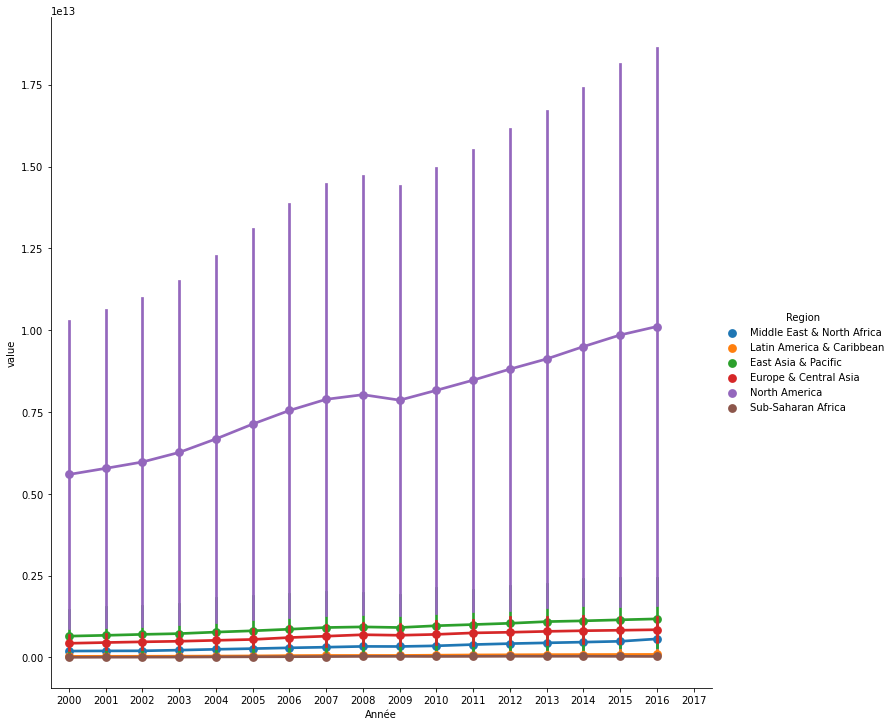

In [ ]:
sns.catplot(x='Année',y='value',data=df_PIB_valeur_courante, hue='Region', kind='point', height=10)

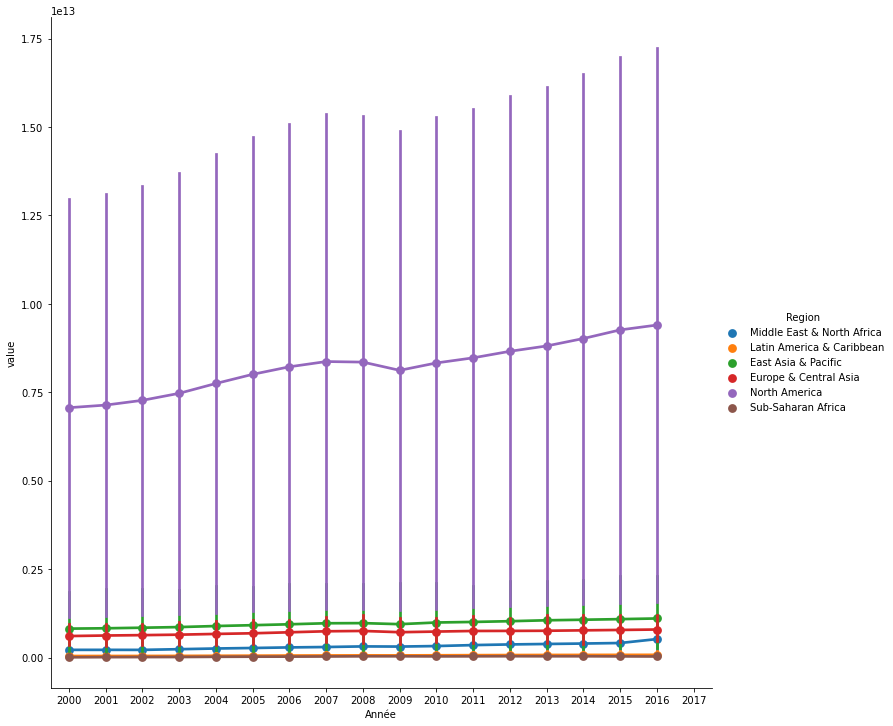

In [ ]:
sns.catplot(x='Année',y='value',data=df_PIB_valeur_constante_2011, hue='Region', kind='point', height=10)

### Analyse 
En comparant les deux graphiques ci-dessus, nous pouvons remarquer que l'Amérique du nord comporte le PIB le plus important et de loin, de 2000 à 2017.

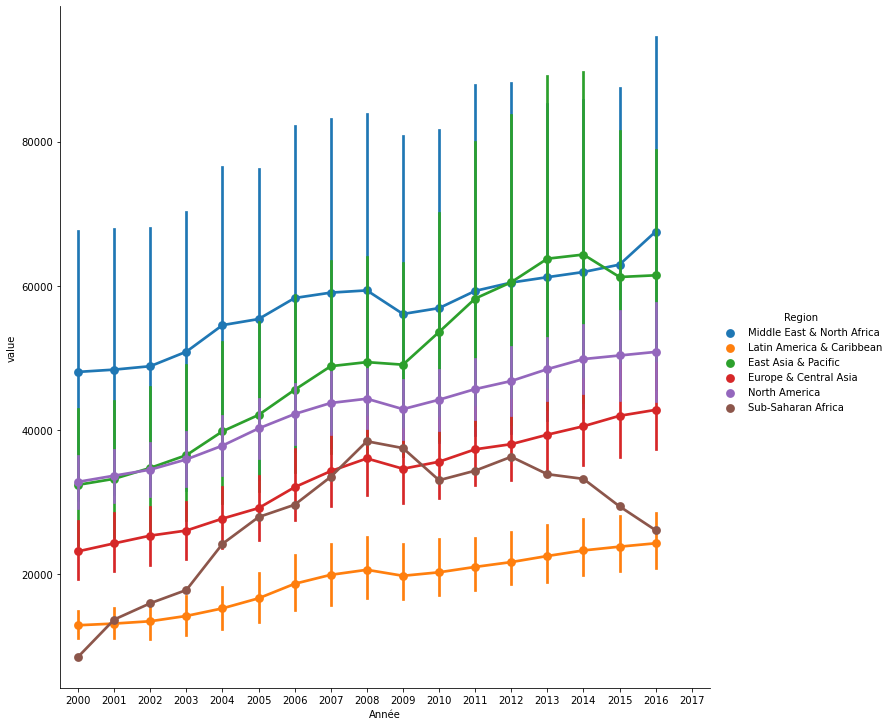

In [ ]:
sns.catplot(x='Année',y='value',data=df_PIB_par_habitant_courant, hue='Region', kind='point', height=10)

### Analyse

Bien que l'amérique du Nord comporte le PIB le plus important du point de vue globale (graphique 1 et 2) nous remarquons qu'elle ne représente pas la région du monde la plus riche. 

Le PIB par habitant vise à mettre en avant le niveau de richesse du pays, rapporté au nombre d'habitants. Il constitue donc un indicateur du niveau de vie des habitants, aussi appelé pouvoir d'achat. Toutefois, il ne permet pas de prendre en compte les inégalités de richesses.

Ainsi nous remarquons qu'entre 2012 et 2017, l'Afrique centrale et du nord s'est vue rattrapé par la région d'Asie de l'Est/Pacifique à partir de 2012. L'Amérique du Nord est quant à elle 3ème de ce point de vue.

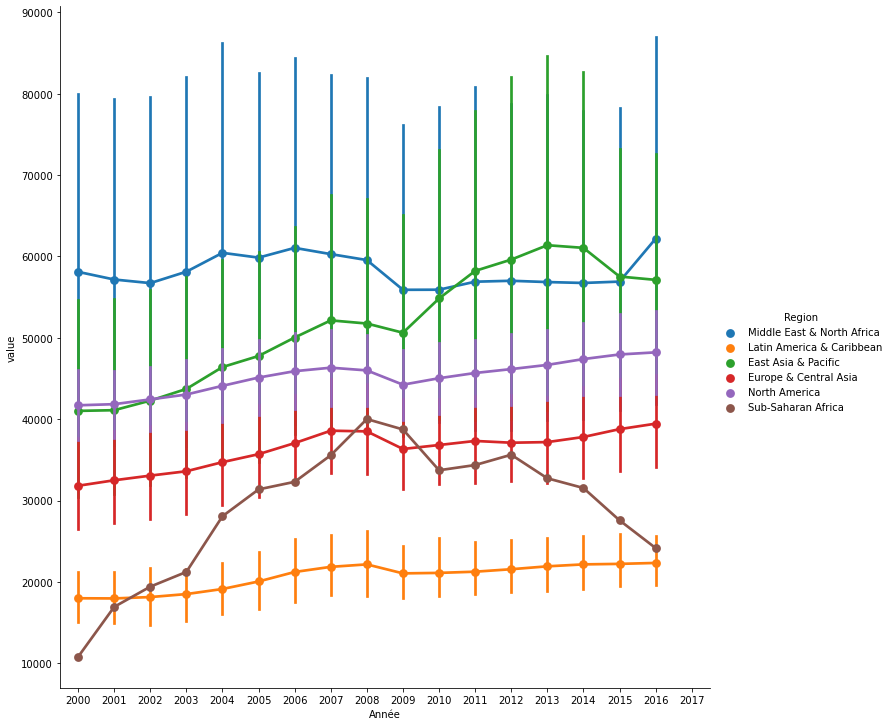

In [ ]:
sns.catplot(x='Année',y='value',data=df_PIB_par_habitant_constant_2011, hue='Region', kind='point', height=10)

### Analyse
En supprimant l'effet de l'inflation, nous constatons que la tendance semble se confirmer.

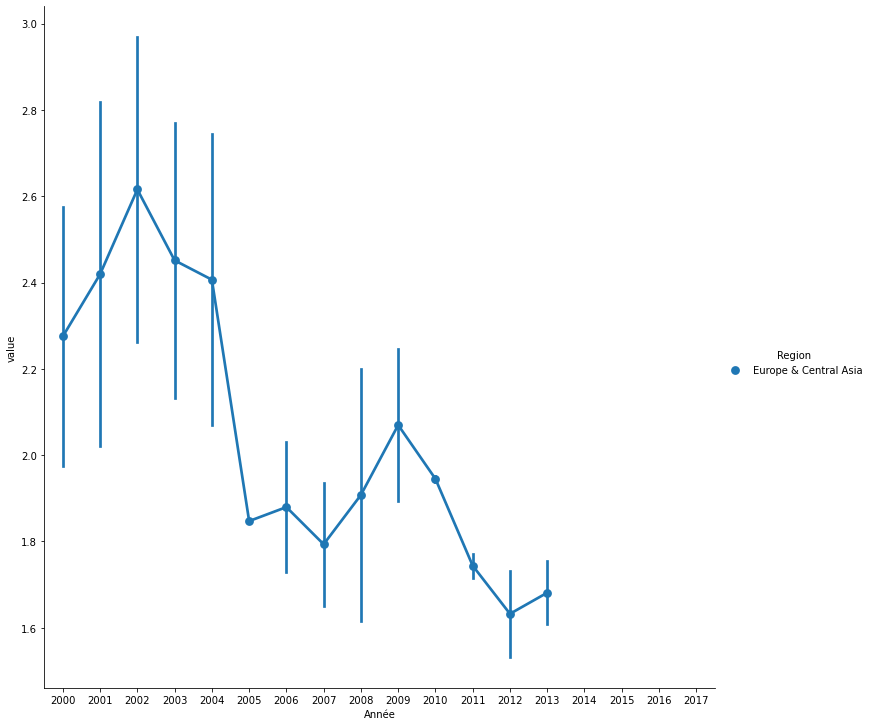

In [ ]:
sns.catplot(x='Année',y='value',data=df_Dépense_educ_2ndaire_pourcent_du_PIB, hue='Region', kind='point', height=10)

### Analyse

Parmis l'ensemble des pays comportant un haut niveau de revenus, nous remarquons que seule région d'Europe et Asie centrale se démarque. Elle semble répondre à la fois aux critères de niveau de richesse élevés, dans chaque pays concernés et être la seule à investir dans l'éducation secondaire. Toutefois, ceci étant peu probable, il est possible que les données n'aient pas été renseignées pour les autres régions du monde.

Nous pouvons constater qu'il y a une baisse des dépenses de l'éducation secondaire en pourcentage du PIB. La question est : Pourquoi ? 

Nous allons tenter d'y répondre grâce au graphique suivant.

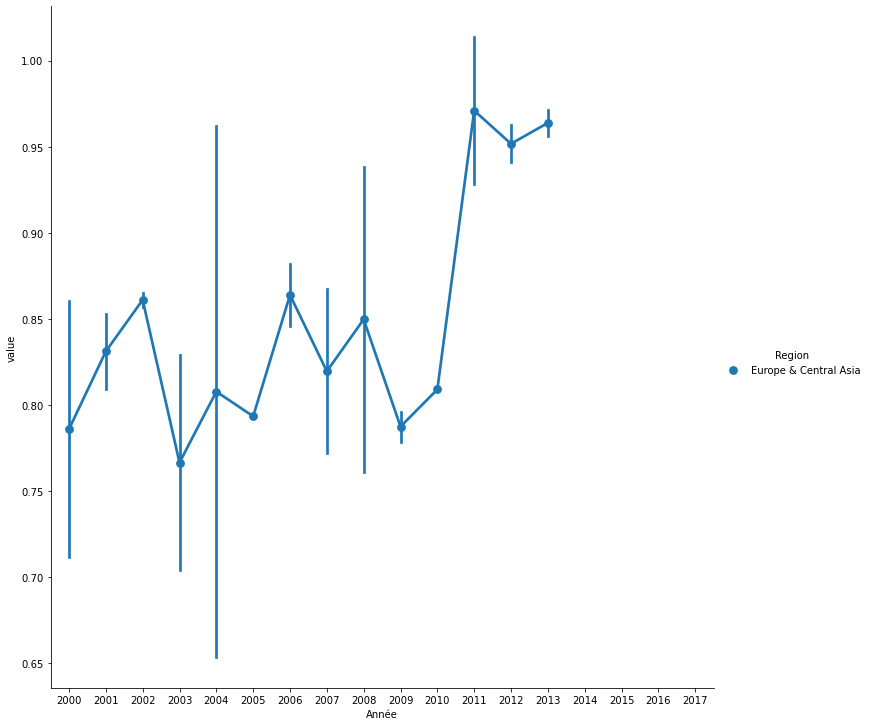

In [ ]:
sns.catplot(x='Année',y='value',data=df_Dépense_educ_tertiaire_pourcent_du_PIB, hue='Region', kind='point', height=10)

### Analyse

En étudiant ce graphique, nous constatons qu'il y a eu une nette hausse des investissements dans l'éducation supérieure au sein de la région Europe et Asie centrale. Nous avons ainsi une clé qui pourrait expliquer la baisse des investissements, en pourcentage, de l'éducation secondaire. Il semble que la part allouée se soit développée davantage dans l'éducation supérieure, ce qui a créé une baisse, en proportion, du taux d'investissement dans l'éducation secondaire. De plus, les études supérieures ont tendance à être plus coûteuse, ce qui influence davantage ces chiffres.

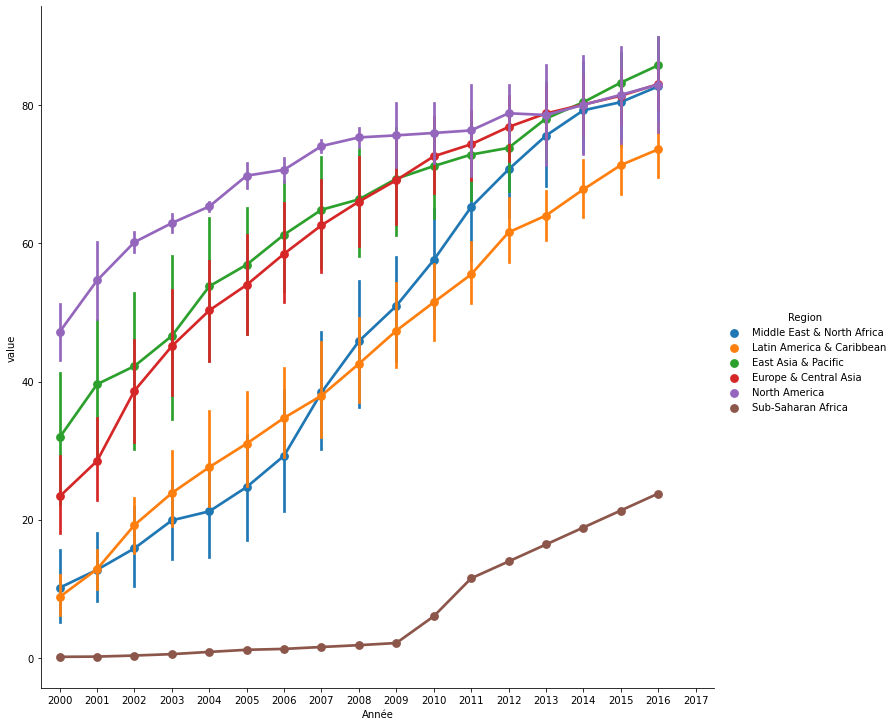

In [ ]:
sns.catplot(x='Année',y='value',data=df_internet_users_pourcent, hue='Region', kind='point', height=10)

### Analyse

D'après ce graphique représentant le taux d'utilisateurs d'internet par région, nous avons, par ordre d'importance : L'Est de l'Asie et Pacifique, puis ex-aequo : L'Amérique du nord, L'Europe et l'Asie Centrale, Le Centre est et l'Afrique du Nord.

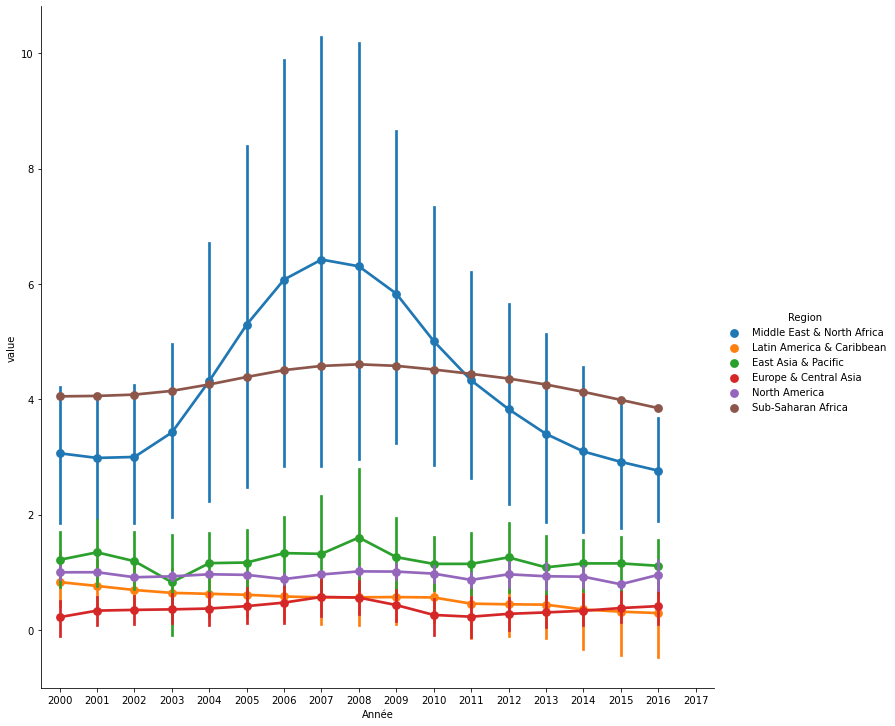

In [ ]:
sns.catplot(x='Année',y='value',data=df_pop_growth_pourcent, hue='Region', kind='point', height=10)

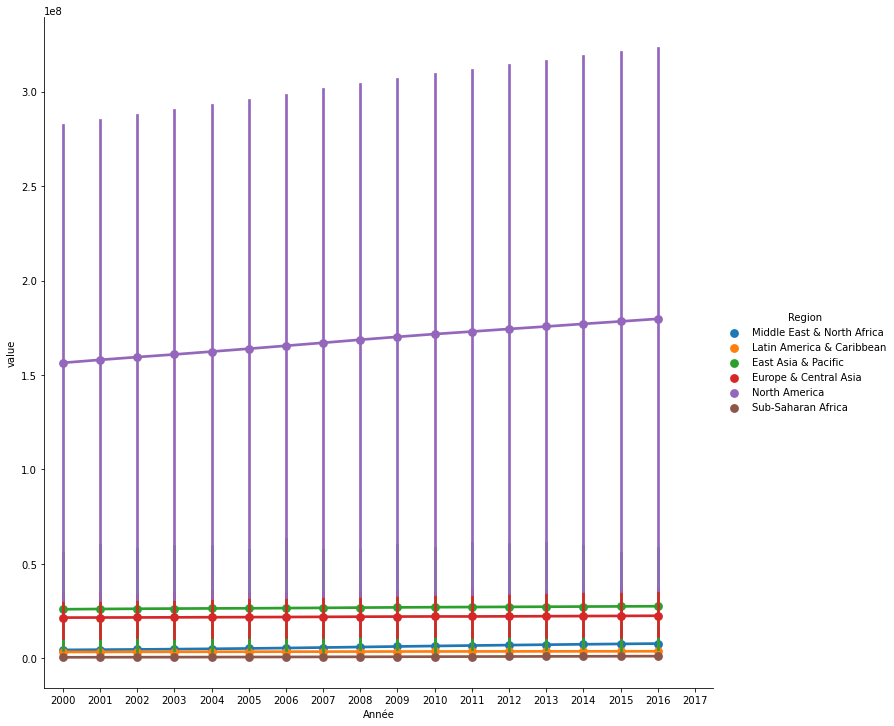

In [ ]:
sns.catplot(x='Année',y='value',data=df_total_population, hue='Region', kind='point', height=10)


### Analyse
Ce graphique représente le niveau de population par région du monde. Il confirme l'idée selon laquelle le PIB par habitant en Amérique du Nord est fortement dilué par rapport aux autres régions du monde.

# Etude des variables par région

## Asie de l'Est et  pacifique

In [ ]:
# Je veux faire apparaître les pays d'Asie de l'Est et du pacifique, comportant un haut niveau de revenu.


df5_High_Income_final = df5_High_Income[df5_High_Income["Region"].str.contains('East Asia & Pacific')]
df5_High_Income_final.head()

Country Name               Region          Income Group  \
7              Australia  East Asia & Pacific     High income: OECD   
23     Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
69  Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
84                 Japan  East Asia & Pacific     High income: OECD   
91           Korea, Rep.  East Asia & Pacific     High income: OECD   

                     Indicator Name Année      value  
7   Internet users (per 100 people)  2000  46.756116  
23  Internet users (per 100 people)  2000   8.996285  
69  Internet users (per 100 people)  2000  27.827761  
84  Internet users (per 100 people)  2000  29.990740  
91  Internet users (per 100 people)  2000  44.700000

In [ ]:
# Je souhaite afficher les variables à étudier pour la région concernée


df5_High_Income_final['Indicator Name'].unique().tolist()

['Internet users (per 100 people)',
 'GDP, PPP (current international $)',
 'GDP, PPP (constant 2011 international $)',
 'GDP per capita, PPP (current international $)',
 'GDP per capita, PPP (constant 2011 international $)',
 'Population growth (annual %)',
 'Population, total']

## Etude des indicateurs pour la région  : Asie de l'Est et pacifique

#### Etude du PIB courant

In [ ]:
df_PIB_courant = df5_High_Income_final[ df5_High_Income_final['Indicator Name'] == 'GDP, PPP (current international $)' ]
df_PIB_courant.head()

Country Name               Region          Income Group  \
192             Australia  East Asia & Pacific     High income: OECD   
207     Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
252  Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
267                 Japan  East Asia & Pacific     High income: OECD   
274           Korea, Rep.  East Asia & Pacific     High income: OECD   

                         Indicator Name Année         value  
192  GDP, PPP (current international $)  2000  5.057566e+11  
207  GDP, PPP (current international $)  2000  2.167227e+10  
252  GDP, PPP (current international $)  2000  1.797056e+11  
267  GDP, PPP (current international $)  2000  3.398784e+12  
274  GDP, PPP (current international $)  2000  8.500516e+11

#### Etude du PIB constant 

In [ ]:
df_PIB_constant_2011 = df5_High_Income_final[ df5_High_Income_final['Indicator Name'] == 'GDP, PPP (constant 2011 international $)' ]
df_PIB_constant_2011.head()

Country Name               Region          Income Group  \
374             Australia  East Asia & Pacific     High income: OECD   
391     Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
437  Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
452                 Japan  East Asia & Pacific     High income: OECD   
459           Korea, Rep.  East Asia & Pacific     High income: OECD   

                               Indicator Name Année         value  
374  GDP, PPP (constant 2011 international $)  2000  6.757446e+11  
391  GDP, PPP (constant 2011 international $)  2000  2.734228e+10  
437  GDP, PPP (constant 2011 international $)  2000  2.267212e+11  
452  GDP, PPP (constant 2011 international $)  2000  4.296406e+12  
459  GDP, PPP (constant 2011 international $)  2000  9.757370e+11

#### Etude du PIB courant / habitant 

In [ ]:
df_PIB_par_habitant_courant = df5_High_Income_final[ df5_High_Income_final['Indicator Name'] == 'GDP per capita, PPP (current international $)' ]
df_PIB_par_habitant_courant.head()

Country Name               Region          Income Group  \
559             Australia  East Asia & Pacific     High income: OECD   
574     Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
619  Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
634                 Japan  East Asia & Pacific     High income: OECD   
641           Korea, Rep.  East Asia & Pacific     High income: OECD   

                                    Indicator Name Année         value  
559  GDP per capita, PPP (current international $)  2000  26406.130951  
574  GDP per capita, PPP (current international $)  2000  65034.834659  
619  GDP per capita, PPP (current international $)  2000  26962.587770  
634  GDP per capita, PPP (current international $)  2000  26795.207427  
641  GDP per capita, PPP (current international $)  2000  18083.084102

#### Etude du PIB constant / habitant 

In [ ]:
df_PIB_par_habitant_constant_2011 = df5_High_Income_final[ df5_High_Income_final['Indicator Name'] == 'GDP per capita, PPP (constant 2011 international $)' ]
df_PIB_par_habitant_constant_2011.head()

Country Name               Region          Income Group  \
741             Australia  East Asia & Pacific     High income: OECD   
758     Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
804  Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
819                 Japan  East Asia & Pacific     High income: OECD   
826           Korea, Rep.  East Asia & Pacific     High income: OECD   

                                        Indicator Name Année         value  
741  GDP per capita, PPP (constant 2011 internation...  2000  35281.395362  
758  GDP per capita, PPP (constant 2011 internation...  2000  82049.580860  
804  GDP per capita, PPP (constant 2011 internation...  2000  34016.677940  
819  GDP per capita, PPP (constant 2011 internation...  2000  33871.843545  
826  GDP per capita, PPP (constant 2011 internation...  2000  20756.779897

#### Taux de croissance de la population

In [ ]:
df_pop_growth = df5_High_Income_final[ df5_High_Income_final['Indicator Name'] == 'Population growth (annual %)' ]
df_pop_growth.head()

Country Name               Region          Income Group  \
926              Australia  East Asia & Pacific     High income: OECD   
942      Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
988   Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
1003                 Japan  East Asia & Pacific     High income: OECD   
1010           Korea, Rep.  East Asia & Pacific     High income: OECD   

                    Indicator Name Année     value  
926   Population growth (annual %)  2000  1.192272  
942   Population growth (annual %)  2000  2.108246  
988   Population growth (annual %)  2000  0.881594  
1003  Population growth (annual %)  2000  0.167276  
1010  Population growth (annual %)  2000  0.836181

#### Total de la population

In [ ]:
df_pop_total = df5_High_Income_final[ df5_High_Income_final['Indicator Name'] == 'Population, total' ]
df_pop_total.head()

Country Name               Region          Income Group  \
1115             Australia  East Asia & Pacific     High income: OECD   
1131     Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
1177  Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
1192                 Japan  East Asia & Pacific     High income: OECD   
1199           Korea, Rep.  East Asia & Pacific     High income: OECD   

         Indicator Name Année        value  
1115  Population, total  2000   19153000.0  
1131  Population, total  2000     333241.0  
1177  Population, total  2000    6665000.0  
1192  Population, total  2000  126843000.0  
1199  Population, total  2000   47008111.0

In [ ]:
df_final_East_Asia_Pacific = df5_High_Income_final[df5_High_Income_final['Region'] == 'East Asia & Pacific']
df_final_East_Asia_Pacific

Country Name               Region          Income Group  \
7                 Australia  East Asia & Pacific     High income: OECD   
23        Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
69     Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
84                    Japan  East Asia & Pacific     High income: OECD   
91              Korea, Rep.  East Asia & Pacific     High income: OECD   
...                     ...                  ...                   ...   
23921                 Japan  East Asia & Pacific     High income: OECD   
23928           Korea, Rep.  East Asia & Pacific     High income: OECD   
23940      Macao SAR, China  East Asia & Pacific  High income: nonOECD   
23965           New Zealand  East Asia & Pacific     High income: OECD   
23985             Singapore  East Asia & Pacific  High income: nonOECD   

                        Indicator Name Année      value  
7      Internet users (per 100 people)  2000  46.756116  
23     Internet users (per 100 people)  2000   8.996285  
69     Internet users (per 100 people)  2000  27.827761  
84     Internet users (per 100 people)  2000  29.990740  
91     Internet users (per 100 people)  2000  44.700000  
...                                ...   ...        ...  
23921                Population, total  2017        NaN  
23928                Population, total  2017        NaN  
23940                Population, total  2017        NaN  
23965                Population, total  2017        NaN  
23985                Population, total  2017        NaN  

[1008 rows x 6 columns]

In [ ]:
df_final_East_Asia_Pacific['Indicator Name'].unique().tolist()

['Internet users (per 100 people)',
 'GDP, PPP (current international $)',
 'GDP, PPP (constant 2011 international $)',
 'GDP per capita, PPP (current international $)',
 'GDP per capita, PPP (constant 2011 international $)',
 'Population growth (annual %)',
 'Population, total']

### Représentation graphique

Nous allons maintenant étudier les données des pays et représentation graphique par indicateur, pour la région 'East Asia & Pacific'.


In [ ]:
df_East_Asia_Pacific_Internet_users = df_final_East_Asia_Pacific[df_final_East_Asia_Pacific['Indicator Name'] == 'Internet users (per 100 people)']
df_East_Asia_Pacific_Internet_users.head()

Country Name               Region          Income Group  \
7              Australia  East Asia & Pacific     High income: OECD   
23     Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
69  Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
84                 Japan  East Asia & Pacific     High income: OECD   
91           Korea, Rep.  East Asia & Pacific     High income: OECD   

                     Indicator Name Année      value  
7   Internet users (per 100 people)  2000  46.756116  
23  Internet users (per 100 people)  2000   8.996285  
69  Internet users (per 100 people)  2000  27.827761  
84  Internet users (per 100 people)  2000  29.990740  
91  Internet users (per 100 people)  2000  44.700000

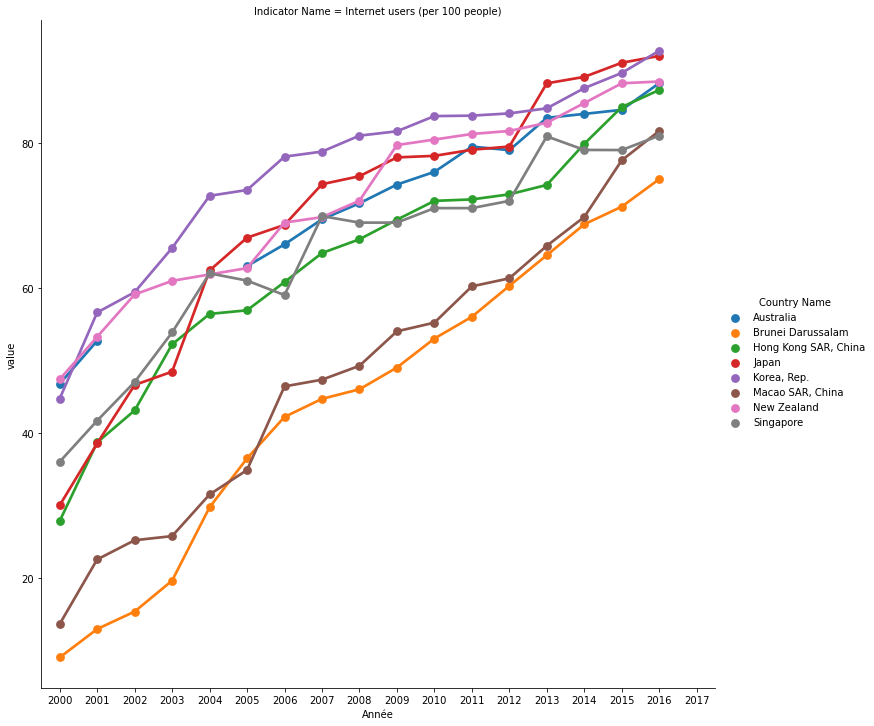

In [ ]:
sns.catplot(x='Année', y='value', data=df_East_Asia_Pacific_Internet_users, hue='Country Name', col='Indicator Name', kind='point', height = 10)

In [ ]:
df_East_Asia_Pacific_PIB_courant = df_final_East_Asia_Pacific[df_final_East_Asia_Pacific['Indicator Name'] == 'GDP, PPP (current international $)']
df_East_Asia_Pacific_PIB_courant.head()

Country Name               Region          Income Group  \
192             Australia  East Asia & Pacific     High income: OECD   
207     Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
252  Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
267                 Japan  East Asia & Pacific     High income: OECD   
274           Korea, Rep.  East Asia & Pacific     High income: OECD   

                         Indicator Name Année         value  
192  GDP, PPP (current international $)  2000  5.057566e+11  
207  GDP, PPP (current international $)  2000  2.167227e+10  
252  GDP, PPP (current international $)  2000  1.797056e+11  
267  GDP, PPP (current international $)  2000  3.398784e+12  
274  GDP, PPP (current international $)  2000  8.500516e+11

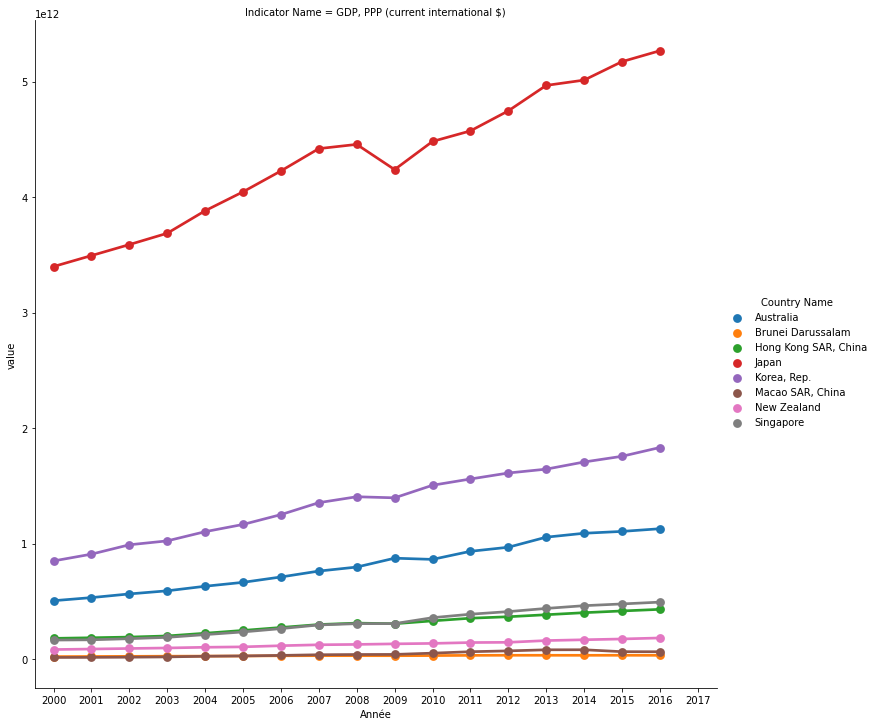

In [ ]:
sns.catplot(x='Année', y='value', data=df_East_Asia_Pacific_PIB_courant, hue='Country Name', col='Indicator Name', kind='point', height = 10)

In [ ]:
df_East_Asia_Pacific_PIB_constant_2011 = df_final_East_Asia_Pacific[df_final_East_Asia_Pacific['Indicator Name'] == 'GDP, PPP (constant 2011 international $)']
df_East_Asia_Pacific_PIB_constant_2011.head()

Country Name               Region          Income Group  \
374             Australia  East Asia & Pacific     High income: OECD   
391     Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
437  Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
452                 Japan  East Asia & Pacific     High income: OECD   
459           Korea, Rep.  East Asia & Pacific     High income: OECD   

                               Indicator Name Année         value  
374  GDP, PPP (constant 2011 international $)  2000  6.757446e+11  
391  GDP, PPP (constant 2011 international $)  2000  2.734228e+10  
437  GDP, PPP (constant 2011 international $)  2000  2.267212e+11  
452  GDP, PPP (constant 2011 international $)  2000  4.296406e+12  
459  GDP, PPP (constant 2011 international $)  2000  9.757370e+11

In [ ]:
df_East_Asia_Pacific_PÏB_par_habitant_courant = df_final_East_Asia_Pacific[df_final_East_Asia_Pacific['Indicator Name'] == 'GDP per capita, PPP (current international $)']
df_East_Asia_Pacific_PÏB_par_habitant_courant.head()

Country Name               Region          Income Group  \
559             Australia  East Asia & Pacific     High income: OECD   
574     Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
619  Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
634                 Japan  East Asia & Pacific     High income: OECD   
641           Korea, Rep.  East Asia & Pacific     High income: OECD   

                                    Indicator Name Année         value  
559  GDP per capita, PPP (current international $)  2000  26406.130951  
574  GDP per capita, PPP (current international $)  2000  65034.834659  
619  GDP per capita, PPP (current international $)  2000  26962.587770  
634  GDP per capita, PPP (current international $)  2000  26795.207427  
641  GDP per capita, PPP (current international $)  2000  18083.084102

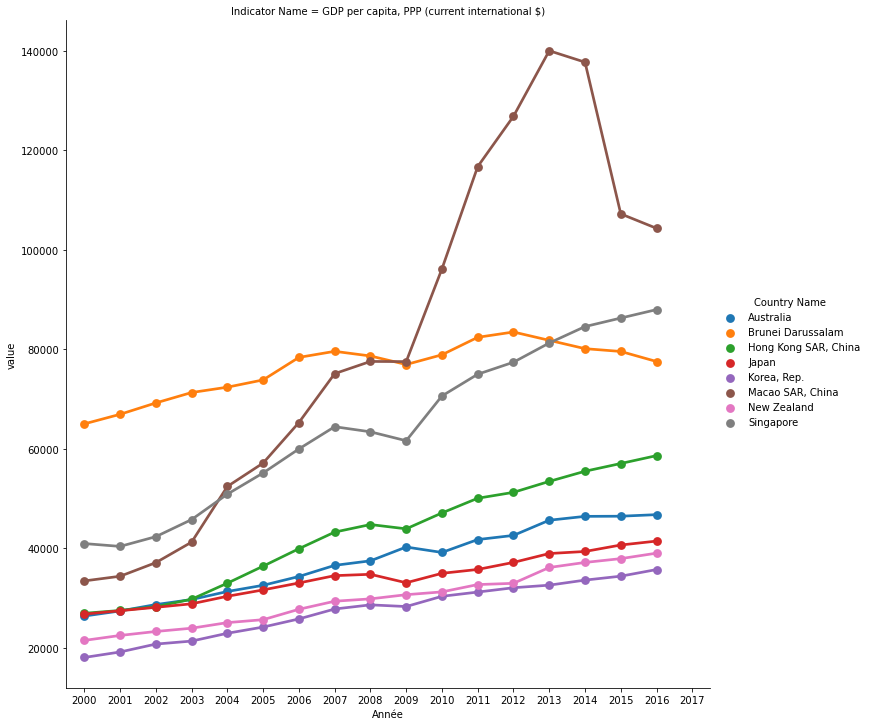

In [ ]:
sns.catplot(x='Année', y='value', data=df_East_Asia_Pacific_PÏB_par_habitant_courant, hue='Country Name', col='Indicator Name', kind='point', height = 10)

In [ ]:
df_East_Asia_Pacific_PIB_par_habitant_constant_2011 = df_final_East_Asia_Pacific[df_final_East_Asia_Pacific['Indicator Name'] == 'GDP per capita, PPP (constant 2011 international $)']
df_East_Asia_Pacific_PIB_par_habitant_constant_2011.head()

Country Name               Region          Income Group  \
741             Australia  East Asia & Pacific     High income: OECD   
758     Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
804  Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
819                 Japan  East Asia & Pacific     High income: OECD   
826           Korea, Rep.  East Asia & Pacific     High income: OECD   

                                        Indicator Name Année         value  
741  GDP per capita, PPP (constant 2011 internation...  2000  35281.395362  
758  GDP per capita, PPP (constant 2011 internation...  2000  82049.580860  
804  GDP per capita, PPP (constant 2011 internation...  2000  34016.677940  
819  GDP per capita, PPP (constant 2011 internation...  2000  33871.843545  
826  GDP per capita, PPP (constant 2011 internation...  2000  20756.779897

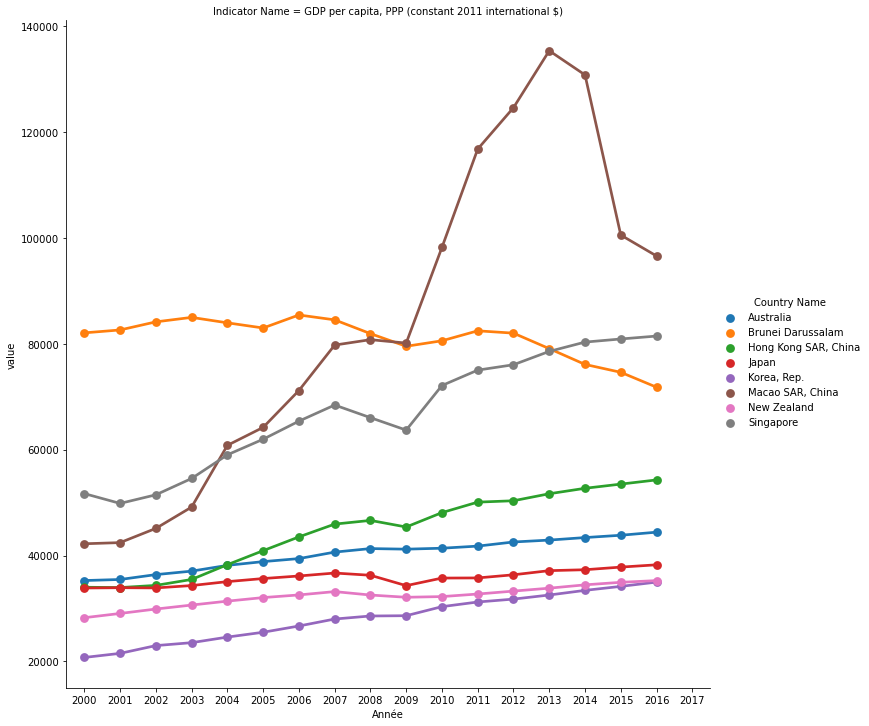

In [ ]:
sns.catplot(x='Année', y='value', data=df_East_Asia_Pacific_PIB_par_habitant_constant_2011, hue='Country Name', col='Indicator Name', kind='point', height = 10)

In [ ]:
df_East_Asia_Pacific_pop_growth = df_final_East_Asia_Pacific[df_final_East_Asia_Pacific['Indicator Name'] == 'Population growth (annual %)']
df_East_Asia_Pacific_pop_growth.head()

Country Name               Region          Income Group  \
926              Australia  East Asia & Pacific     High income: OECD   
942      Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
988   Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
1003                 Japan  East Asia & Pacific     High income: OECD   
1010           Korea, Rep.  East Asia & Pacific     High income: OECD   

                    Indicator Name Année     value  
926   Population growth (annual %)  2000  1.192272  
942   Population growth (annual %)  2000  2.108246  
988   Population growth (annual %)  2000  0.881594  
1003  Population growth (annual %)  2000  0.167276  
1010  Population growth (annual %)  2000  0.836181

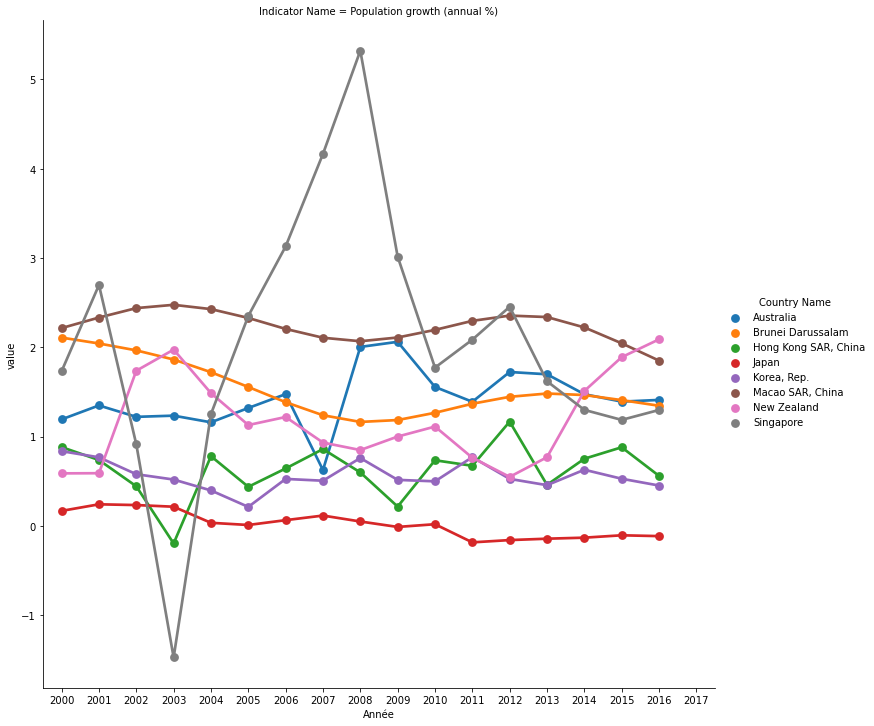

In [ ]:
sns.catplot(x='Année', y='value', data=df_East_Asia_Pacific_pop_growth, hue='Country Name', col='Indicator Name', kind='point', height = 10)

In [ ]:
df_East_Asia_Pacific_pop_totale = df_final_East_Asia_Pacific[df_final_East_Asia_Pacific['Indicator Name'] == 'Population, total']
df_East_Asia_Pacific_pop_totale.head()

Country Name               Region          Income Group  \
1115             Australia  East Asia & Pacific     High income: OECD   
1131     Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
1177  Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
1192                 Japan  East Asia & Pacific     High income: OECD   
1199           Korea, Rep.  East Asia & Pacific     High income: OECD   

         Indicator Name Année        value  
1115  Population, total  2000   19153000.0  
1131  Population, total  2000     333241.0  
1177  Population, total  2000    6665000.0  
1192  Population, total  2000  126843000.0  
1199  Population, total  2000   47008111.0

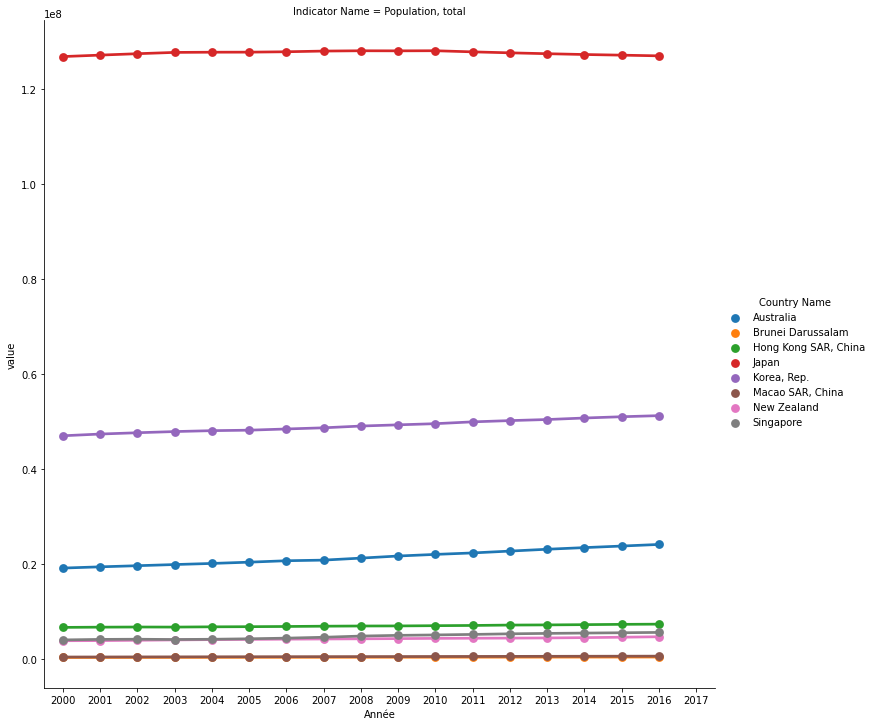

In [ ]:
sns.catplot(x='Année', y='value', data=df_East_Asia_Pacific_pop_totale, hue='Country Name', col='Indicator Name', kind='point', height = 10)

In [ ]:
df_East_Asia_Pacific_Internet_users.describe()


value
count  133.000000
mean    63.798312
std     19.421498
min      8.996285
25%     52.689266
50%     69.000000
75%     79.054114
max     92.716545

### Analyse statistique

L'écart-type est assez faible, la dispersion est assez proche de la moyenne qui correspond à 63.79 % des utilisateurs d'internet pour la région East Asia / Pacific.

In [ ]:
df5_High_Income_final[df5_High_Income_final['Region'] == 'East Asia & Pacific']
df_final_East_Asia_Pacific = df5_High_Income_final[df5_High_Income_final['Region'] == 'East Asia & Pacific']
df_final_East_Asia_Pacific

Country Name               Region          Income Group  \
7                 Australia  East Asia & Pacific     High income: OECD   
23        Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
69     Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
84                    Japan  East Asia & Pacific     High income: OECD   
91              Korea, Rep.  East Asia & Pacific     High income: OECD   
...                     ...                  ...                   ...   
23921                 Japan  East Asia & Pacific     High income: OECD   
23928           Korea, Rep.  East Asia & Pacific     High income: OECD   
23940      Macao SAR, China  East Asia & Pacific  High income: nonOECD   
23965           New Zealand  East Asia & Pacific     High income: OECD   
23985             Singapore  East Asia & Pacific  High income: nonOECD   

                        Indicator Name Année      value  
7      Internet users (per 100 people)  2000  46.756116  
23     Internet users (per 100 people)  2000   8.996285  
69     Internet users (per 100 people)  2000  27.827761  
84     Internet users (per 100 people)  2000  29.990740  
91     Internet users (per 100 people)  2000  44.700000  
...                                ...   ...        ...  
23921                Population, total  2017        NaN  
23928                Population, total  2017        NaN  
23940                Population, total  2017        NaN  
23965                Population, total  2017        NaN  
23985                Population, total  2017        NaN  

[1008 rows x 6 columns]

## Calcul de la moyenne des indicateurs par pays pour la région Asie de l'Est et pacifique

In [ ]:
moy_par_indicateur_East_Asia_Pacific = df_final_East_Asia_Pacific.groupby(['Indicator Name','Country Name'], as_index=False).agg({'value': 'mean'}).sort_values(by = ['Indicator Name','value'], ascending=False)
moy_par_indicateur_East_Asia_Pacific

Indicator Name          Country Name  \
51                                  Population, total                 Japan   
52                                  Population, total           Korea, Rep.   
48                                  Population, total             Australia   
50                                  Population, total  Hong Kong SAR, China   
55                                  Population, total             Singapore   
54                                  Population, total           New Zealand   
53                                  Population, total      Macao SAR, China   
49                                  Population, total     Brunei Darussalam   
45                       Population growth (annual %)      Macao SAR, China   
47                       Population growth (annual %)             Singapore   
41                       Population growth (annual %)     Brunei Darussalam   
40                       Population growth (annual %)             Australia   
46                       Population growth (annual %)           New Zealand   
42                       Population growth (annual %)  Hong Kong SAR, China   
44                       Population growth (annual %)           Korea, Rep.   
43                       Population growth (annual %)                 Japan   
36                    Internet users (per 100 people)           Korea, Rep.   
32                    Internet users (per 100 people)             Australia   
38                    Internet users (per 100 people)           New Zealand   
35                    Internet users (per 100 people)                 Japan   
39                    Internet users (per 100 people)             Singapore   
34                    Internet users (per 100 people)  Hong Kong SAR, China   
37                    Internet users (per 100 people)      Macao SAR, China   
33                    Internet users (per 100 people)     Brunei Darussalam   
27                 GDP, PPP (current international $)                 Japan   
28                 GDP, PPP (current international $)           Korea, Rep.   
24                 GDP, PPP (current international $)             Australia   
31                 GDP, PPP (current international $)             Singapore   
26                 GDP, PPP (current international $)  Hong Kong SAR, China   
30                 GDP, PPP (current international $)           New Zealand   
29                 GDP, PPP (current international $)      Macao SAR, China   
25                 GDP, PPP (current international $)     Brunei Darussalam   
19           GDP, PPP (constant 2011 international $)                 Japan   
20           GDP, PPP (constant 2011 international $)           Korea, Rep.   
16           GDP, PPP (constant 2011 international $)             Australia   
23           GDP, PPP (constant 2011 international $)             Singapore   
18           GDP, PPP (constant 2011 international $)  Hong Kong SAR, China   
22           GDP, PPP (constant 2011 international $)           New Zealand   
21           GDP, PPP (constant 2011 international $)      Macao SAR, China   
17           GDP, PPP (constant 2011 international $)     Brunei Darussalam   
13      GDP per capita, PPP (current international $)      Macao SAR, China   
9       GDP per capita, PPP (current international $)     Brunei Darussalam   
15      GDP per capita, PPP (current international $)             Singapore   
10      GDP per capita, PPP (current international $)  Hong Kong SAR, China   
8       GDP per capita, PPP (current international $)             Australia   
11      GDP per capita, PPP (current international $)                 Japan   
14      GDP per capita, PPP (current international $)           New Zealand   
12      GDP per capita, PPP (current international $)           Korea, Rep.   
5   GDP per capita, PPP (constant 2011 internation...      Macao SAR, China   
1   GDP per capita, PPP (constant 2011 internation...     Brunei Darussalam   
7   GDP pe

## Etude et représentation graphique, par indicateur, pour la région Asie de l'Est et Pacifique

In [ ]:
df_East_Asia_Pacific_Internet_users = df_final_East_Asia_Pacific[df_final_East_Asia_Pacific['Indicator Name'] == 'Internet users (per 100 people)']
df_East_Asia_Pacific_Internet_users.head()

Country Name               Region          Income Group  \
7              Australia  East Asia & Pacific     High income: OECD   
23     Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
69  Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
84                 Japan  East Asia & Pacific     High income: OECD   
91           Korea, Rep.  East Asia & Pacific     High income: OECD   

                     Indicator Name Année      value  
7   Internet users (per 100 people)  2000  46.756116  
23  Internet users (per 100 people)  2000   8.996285  
69  Internet users (per 100 people)  2000  27.827761  
84  Internet users (per 100 people)  2000  29.990740  
91  Internet users (per 100 people)  2000  44.700000

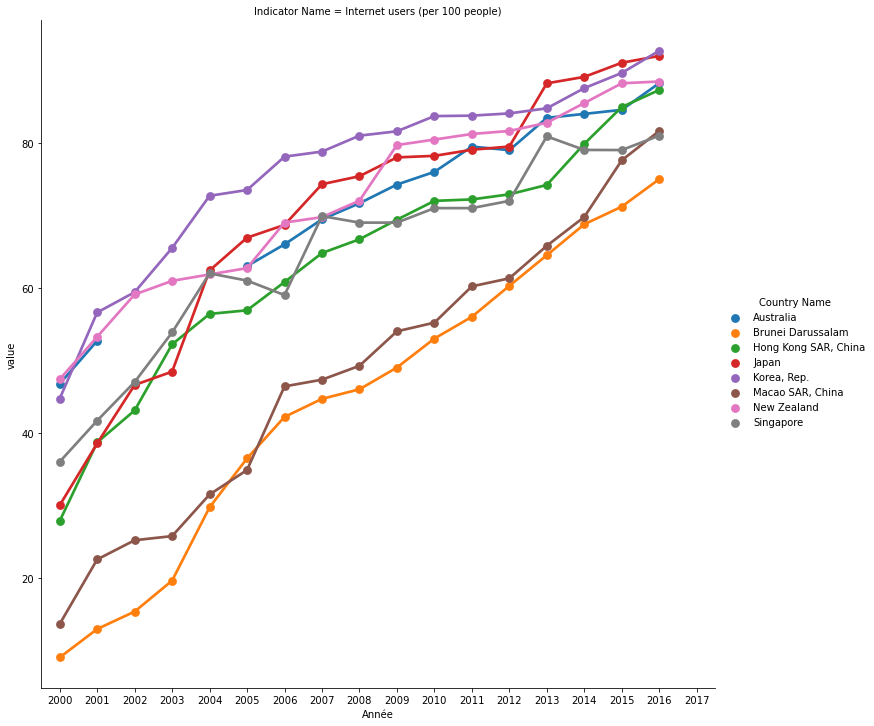

In [ ]:
sns.catplot(x='Année', y='value', data=df_East_Asia_Pacific_Internet_users, hue='Country Name', col='Indicator Name', kind='point', height = 10)

### Analyse
La Korée et le japon sont les plus équipés en internet, suivi par la nouvelle-zélande, l'australie et Hong-kong, le tout approchant les 90%.

In [ ]:
df_East_Asia_Pacific_PIB_courant = df_final_East_Asia_Pacific[df_final_East_Asia_Pacific['Indicator Name'] == 'GDP, PPP (current international $)']
df_East_Asia_Pacific_PIB_courant.head()

Country Name               Region          Income Group  \
192             Australia  East Asia & Pacific     High income: OECD   
207     Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
252  Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
267                 Japan  East Asia & Pacific     High income: OECD   
274           Korea, Rep.  East Asia & Pacific     High income: OECD   

                         Indicator Name Année         value  
192  GDP, PPP (current international $)  2000  5.057566e+11  
207  GDP, PPP (current international $)  2000  2.167227e+10  
252  GDP, PPP (current international $)  2000  1.797056e+11  
267  GDP, PPP (current international $)  2000  3.398784e+12  
274  GDP, PPP (current international $)  2000  8.500516e+11

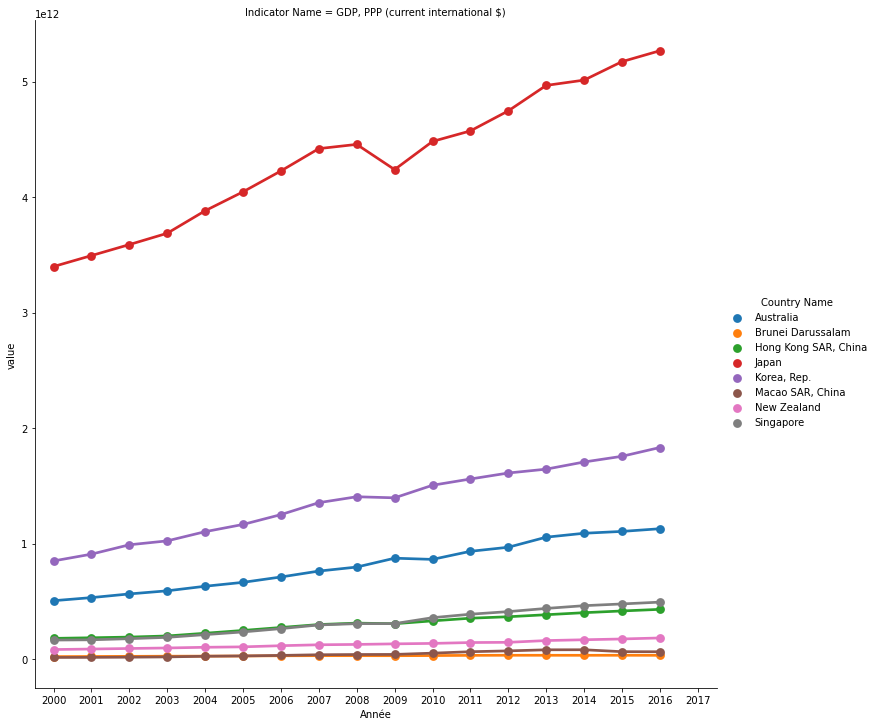

In [ ]:
sns.catplot(x='Année', y='value', data=df_East_Asia_Pacific_PIB_courant, hue='Country Name', col='Indicator Name', kind='point', height = 10)

### Analyse
Le Japon est le pays dégagant le plus de richesse, produisant plus du triple de son suiveur, la Korée.

In [ ]:
df_East_Asia_Pacific_PIB_constant_2011 = df_final_East_Asia_Pacific[df_final_East_Asia_Pacific['Indicator Name'] == 'GDP, PPP (constant 2011 international $)']
df_East_Asia_Pacific_PIB_constant_2011.head()

Country Name               Region          Income Group  \
374             Australia  East Asia & Pacific     High income: OECD   
391     Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
437  Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
452                 Japan  East Asia & Pacific     High income: OECD   
459           Korea, Rep.  East Asia & Pacific     High income: OECD   

                               Indicator Name Année         value  
374  GDP, PPP (constant 2011 international $)  2000  6.757446e+11  
391  GDP, PPP (constant 2011 international $)  2000  2.734228e+10  
437  GDP, PPP (constant 2011 international $)  2000  2.267212e+11  
452  GDP, PPP (constant 2011 international $)  2000  4.296406e+12  
459  GDP, PPP (constant 2011 international $)  2000  9.757370e+11

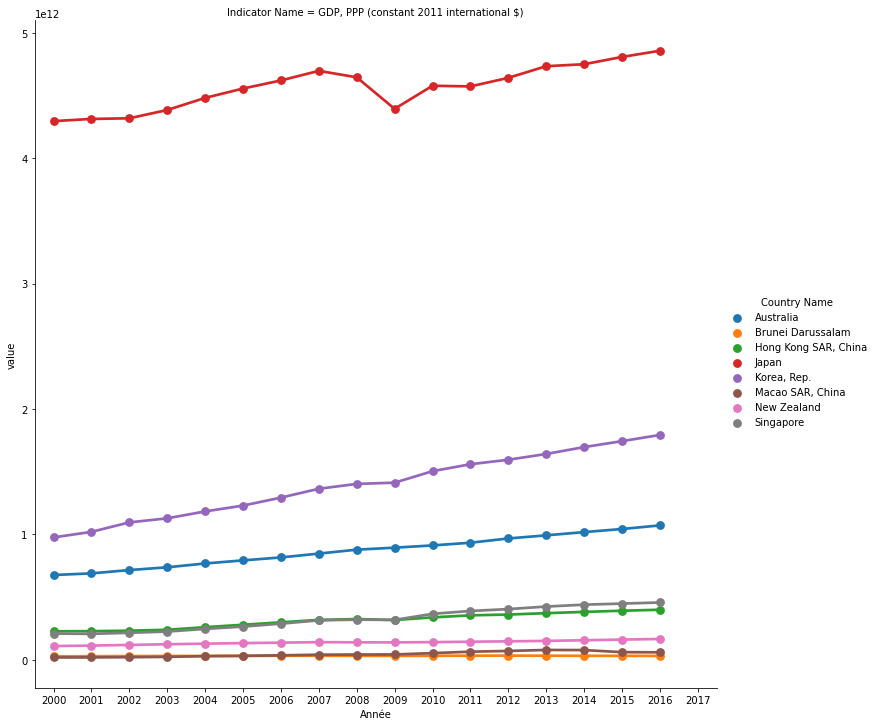

In [ ]:
sns.catplot(x='Année', y='value', data=df_East_Asia_Pacific_PIB_constant_2011, hue='Country Name', col='Indicator Name', kind='point', height = 10)

In [ ]:
df_East_Asia_Pacific_PÏB_par_habitant_courant = df_final_East_Asia_Pacific[df_final_East_Asia_Pacific['Indicator Name'] == 'GDP per capita, PPP (current international $)']
df_East_Asia_Pacific_PÏB_par_habitant_courant.head()

Country Name               Region          Income Group  \
559             Australia  East Asia & Pacific     High income: OECD   
574     Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
619  Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
634                 Japan  East Asia & Pacific     High income: OECD   
641           Korea, Rep.  East Asia & Pacific     High income: OECD   

                                    Indicator Name Année         value  
559  GDP per capita, PPP (current international $)  2000  26406.130951  
574  GDP per capita, PPP (current international $)  2000  65034.834659  
619  GDP per capita, PPP (current international $)  2000  26962.587770  
634  GDP per capita, PPP (current international $)  2000  26795.207427  
641  GDP per capita, PPP (current international $)  2000  18083.084102

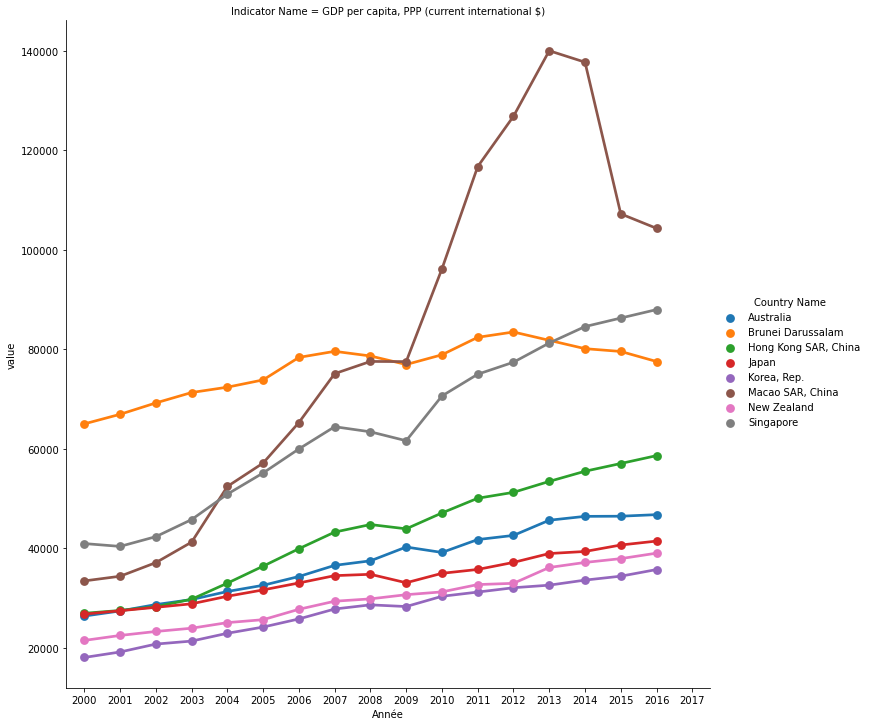

In [ ]:
sns.catplot(x='Année', y='value', data=df_East_Asia_Pacific_PÏB_par_habitant_courant, hue='Country Name', col='Indicator Name', kind='point', height = 10)

### Analyse
Macao, une région administrative de la Chine (elle constitue donc un segment distinct sur le plan statistique) possède le niveau de richesse par habitant le plus élevé (mais a nettement baissé entre 2013 et 2017), suivi par Singapour et Brunei Darussalam. Ce dernier est un micro-état et il est peu probable qu'il constitue un pays d'implantation intéressant.

In [ ]:
df_East_Asia_Pacific_PIB_par_habitant_constant_2011 = df_final_East_Asia_Pacific[df_final_East_Asia_Pacific['Indicator Name'] == 'GDP per capita, PPP (constant 2011 international $)']
df_East_Asia_Pacific_PIB_par_habitant_constant_2011.head()

Country Name               Region          Income Group  \
741             Australia  East Asia & Pacific     High income: OECD   
758     Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
804  Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
819                 Japan  East Asia & Pacific     High income: OECD   
826           Korea, Rep.  East Asia & Pacific     High income: OECD   

                                        Indicator Name Année         value  
741  GDP per capita, PPP (constant 2011 internation...  2000  35281.395362  
758  GDP per capita, PPP (constant 2011 internation...  2000  82049.580860  
804  GDP per capita, PPP (constant 2011 internation...  2000  34016.677940  
819  GDP per capita, PPP (constant 2011 internation...  2000  33871.843545  
826  GDP per capita, PPP (constant 2011 internation...  2000  20756.779897

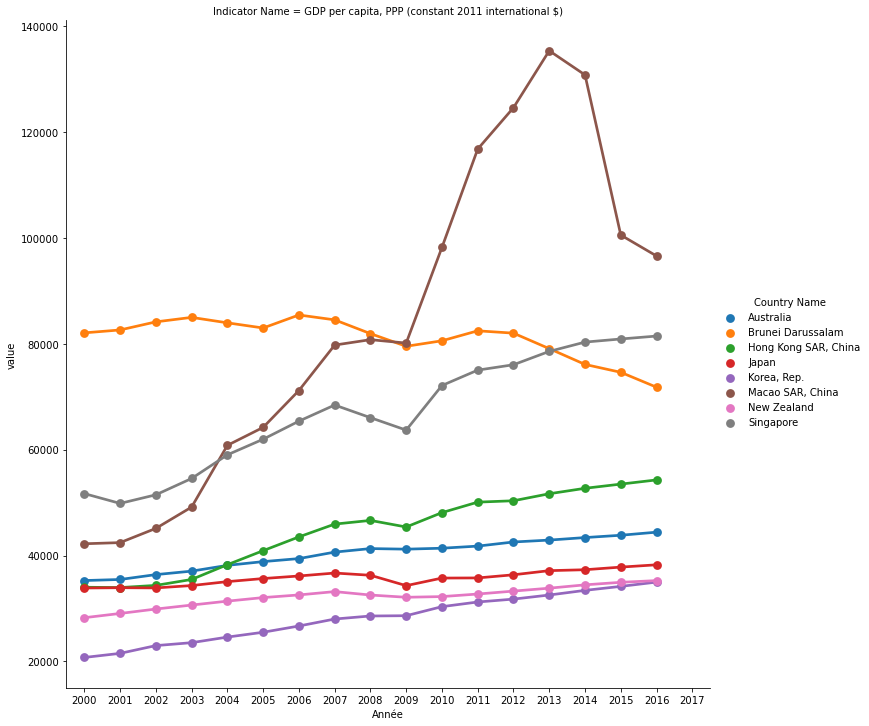

In [ ]:
sns.catplot(x='Année', y='value', data=df_East_Asia_Pacific_PIB_par_habitant_constant_2011, hue='Country Name', col='Indicator Name', kind='point', height = 10)

In [ ]:
df_East_Asia_Pacific_pop_growth = df_final_East_Asia_Pacific[df_final_East_Asia_Pacific['Indicator Name'] == 'Population growth (annual %)']
df_East_Asia_Pacific_pop_growth.head()

Country Name               Region          Income Group  \
926              Australia  East Asia & Pacific     High income: OECD   
942      Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
988   Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
1003                 Japan  East Asia & Pacific     High income: OECD   
1010           Korea, Rep.  East Asia & Pacific     High income: OECD   

                    Indicator Name Année     value  
926   Population growth (annual %)  2000  1.192272  
942   Population growth (annual %)  2000  2.108246  
988   Population growth (annual %)  2000  0.881594  
1003  Population growth (annual %)  2000  0.167276  
1010  Population growth (annual %)  2000  0.836181

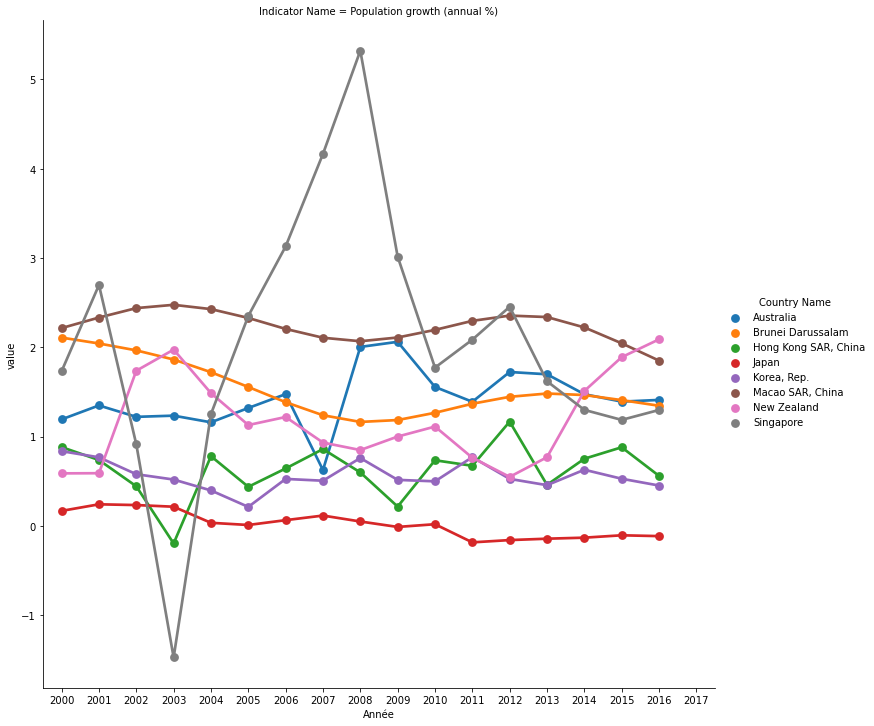

In [ ]:
sns.catplot(x='Année', y='value', data=df_East_Asia_Pacific_pop_growth, hue='Country Name', col='Indicator Name', kind='point', height = 10)

In [ ]:
df_East_Asia_Pacific_pop_totale = df_final_East_Asia_Pacific[df_final_East_Asia_Pacific['Indicator Name'] == 'Population, total']
df_East_Asia_Pacific_pop_totale.head()

Country Name               Region          Income Group  \
1115             Australia  East Asia & Pacific     High income: OECD   
1131     Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
1177  Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
1192                 Japan  East Asia & Pacific     High income: OECD   
1199           Korea, Rep.  East Asia & Pacific     High income: OECD   

         Indicator Name Année        value  
1115  Population, total  2000   19153000.0  
1131  Population, total  2000     333241.0  
1177  Population, total  2000    6665000.0  
1192  Population, total  2000  126843000.0  
1199  Population, total  2000   47008111.0

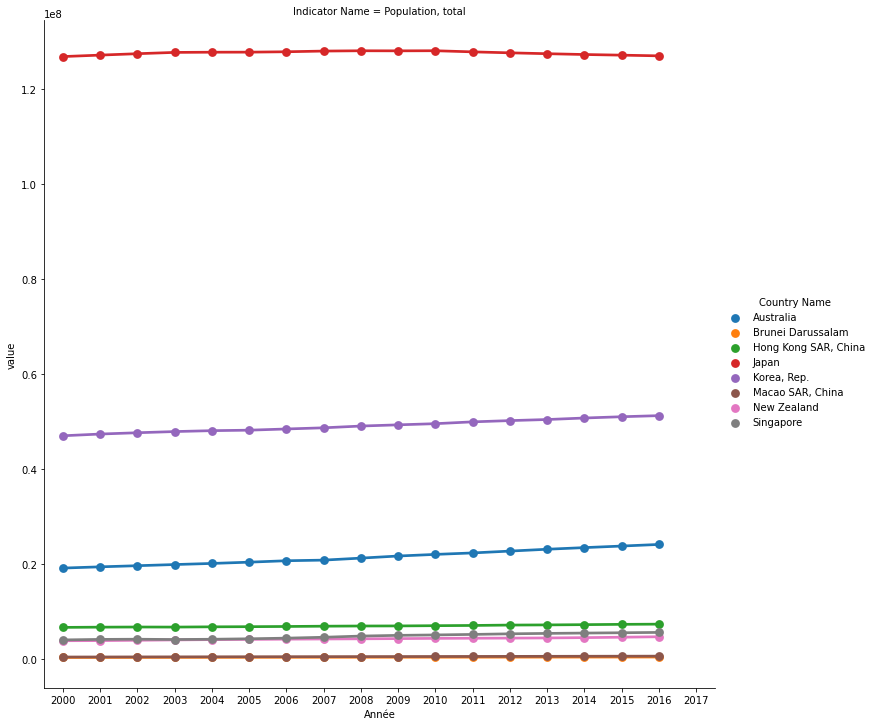

In [ ]:
sns.catplot(x='Année', y='value', data=df_East_Asia_Pacific_pop_totale, hue='Country Name', col='Indicator Name', kind='point', height = 10)

### Analyse
Le Japon semble ici comporter la population la plus importante de la région Asie de l'Est et Pacifique, toutefois cela semble très peu probable; du fait de l'absence d'autres pays majeut (comme la Chine) dans la représentation graphique. Sans la présence de ces données il semble difficile de prendre du recul sur le niveau élevé de richesse par habitant de Macao (Chine). Si nous la retenons pas dnans ce classement, le Japon et la Korée sont les meilleurs cibles.

### Indicateurs relatifs à l'éducation 

In [ ]:
df5_melted_High_Income['Indicator Name'].unique().tolist()

['Internet users (per 100 people)',
 'GDP, PPP (current international $)',
 'GDP, PPP (constant 2011 international $)',
 'GDP per capita, PPP (current international $)',
 'GDP per capita, PPP (constant 2011 international $)',
 'Population growth (annual %)',
 'Population, total',
 'Government expenditure on secondary education as % of GDP (%)',
 'Government expenditure on tertiary education as % of GDP (%)']

In [ ]:
Educ_East_Asia_Pacific = df5_melted_High_Income[df5_melted_High_Income['Region'] == 'East Asia & Pacific']
Educ_East_Asia_Pacific

Country Name               Region          Income Group  \
7                 Australia  East Asia & Pacific     High income: OECD   
23        Brunei Darussalam  East Asia & Pacific  High income: nonOECD   
69     Hong Kong SAR, China  East Asia & Pacific  High income: nonOECD   
84                    Japan  East Asia & Pacific     High income: OECD   
91              Korea, Rep.  East Asia & Pacific     High income: OECD   
...                     ...                  ...                   ...   
23921                 Japan  East Asia & Pacific     High income: OECD   
23928           Korea, Rep.  East Asia & Pacific     High income: OECD   
23940      Macao SAR, China  East Asia & Pacific  High income: nonOECD   
23965           New Zealand  East Asia & Pacific     High income: OECD   
23985             Singapore  East Asia & Pacific  High income: nonOECD   

                        Indicator Name Année      value  
7      Internet users (per 100 people)  2000  46.756116  
23     Internet users (per 100 people)  2000   8.996285  
69     Internet users (per 100 people)  2000  27.827761  
84     Internet users (per 100 people)  2000  29.990740  
91     Internet users (per 100 people)  2000  44.700000  
...                                ...   ...        ...  
23921                Population, total  2017        NaN  
23928                Population, total  2017        NaN  
23940                Population, total  2017        NaN  
23965                Population, total  2017        NaN  
23985                Population, total  2017        NaN  

[1008 rows x 6 columns]

In [ ]:
Education_East_Asia_and_Pacific_2dary = Educ_East_Asia_Pacific[Educ_East_Asia_Pacific['Indicator Name'] == 'Government expenditure per secondary student as % of GDP per capita (%)']
Education_East_Asia_and_Pacific_2dary

Empty DataFrame
Columns: [Country Name, Region, Income Group, Indicator Name, Année, value]
Index: []

In [ ]:
Education_East_Asia_and_Pacific_3tiary = Educ_East_Asia_Pacific[Educ_East_Asia_Pacific['Indicator Name'] == 'Government expenditure per tertiary student as % of GDP per capita (%)']

## Nord Afrique et Centre Est

In [ ]:
df_Middle_East_and_North_Africa = df5_melted_High_Income[df5_melted_High_Income['Region'] =='Middle East & North Africa']
df_Middle_East_and_North_Africa

Country Name                      Region          Income Group  \
3      United Arab Emirates  Middle East & North Africa  High income: nonOECD   
16                  Bahrain  Middle East & North Africa  High income: nonOECD   
80                   Israel  Middle East & North Africa     High income: OECD   
92                   Kuwait  Middle East & North Africa  High income: nonOECD   
112                   Malta  Middle East & North Africa  High income: nonOECD   
...                     ...                         ...                   ...   
23929                Kuwait  Middle East & North Africa  High income: nonOECD   
23949                 Malta  Middle East & North Africa  High income: nonOECD   
23966                  Oman  Middle East & North Africa  High income: nonOECD   
23978                 Qatar  Middle East & North Africa  High income: nonOECD   
23982          Saudi Arabia  Middle East & North Africa  High income: nonOECD   

                        Indicator Name Année      value  
3      Internet users (per 100 people)  2000  23.625301  
16     Internet users (per 100 people)  2000   6.153733  
80     Internet users (per 100 people)  2000  20.873790  
92     Internet users (per 100 people)  2000   6.731396  
112    Internet users (per 100 people)  2000  13.113709  
...                                ...   ...        ...  
23929                Population, total  2017        NaN  
23949                Population, total  2017        NaN  
23966                Population, total  2017        NaN  
23978                Population, total  2017        NaN  
23982                Population, total  2017        NaN  

[972 rows x 6 columns]

## Calcul de la moyenne pour la région Afrique du Nord et Centre Est

In [ ]:
moy_par_indicateur_Middle_East_and_North_Africa = df_Middle_East_and_North_Africa.groupby(['Indicator Name','Country Name'], as_index=False).agg({'value': 'mean'}).sort_values(by = ['Indicator Name','value'], ascending=False)
moy_par_indicateur_Middle_East_and_North_Africa

Indicator Name          Country Name  \
52                                  Population, total          Saudi Arabia   
47                                  Population, total                Israel   
53                                  Population, total  United Arab Emirates   
50                                  Population, total                  Oman   
48                                  Population, total                Kuwait   
51                                  Population, total                 Qatar   
46                                  Population, total               Bahrain   
49                                  Population, total                 Malta   
43                       Population growth (annual %)                 Qatar   
45                       Population growth (annual %)  United Arab Emirates   
38                       Population growth (annual %)               Bahrain   
40                       Population growth (annual %)                Kuwait   
42                       Population growth (annual %)                  Oman   
44                       Population growth (annual %)          Saudi Arabia   
39                       Population growth (annual %)                Israel   
41                       Population growth (annual %)                 Malta   
37                    Internet users (per 100 people)  United Arab Emirates   
30                    Internet users (per 100 people)               Bahrain   
33                    Internet users (per 100 people)                 Malta   
31                    Internet users (per 100 people)                Israel   
35                    Internet users (per 100 people)                 Qatar   
32                    Internet users (per 100 people)                Kuwait   
36                    Internet users (per 100 people)          Saudi Arabia   
34                    Internet users (per 100 people)                  Oman   
28                 GDP, PPP (current international $)          Saudi Arabia   
29                 GDP, PPP (current international $)  United Arab Emirates   
23                 GDP, PPP (current international $)                Israel   
24                 GDP, PPP (current international $)                Kuwait   
27                 GDP, PPP (current international $)                 Qatar   
26                 GDP, PPP (current international $)                  Oman   
25                 GDP, PPP (current international $)                 Malta   
21           GDP, PPP (constant 2011 international $)          Saudi Arabia   
22           GDP, PPP (constant 2011 international $)  United Arab Emirates   
17           GDP, PPP (constant 2011 international $)                Kuwait   
16           GDP, PPP (constant 2011 international $)                Israel   
20           GDP, PPP (constant 2011 international $)                 Qatar   
19           GDP, PPP (constant 2011 international $)                  Oman   
15           GDP, PPP (constant 2011 international $)               Bahrain   
18           GDP, PPP (constant 2011 international $)                 Malta   
12      GDP per capita, PPP (current international $)                 Qatar   
9       GDP per capita, PPP (current international $)                Kuwait   
14      GDP per capita, PPP (current international $)  United Arab Emirates   
13      GDP per capita, PPP (current international $)          Saudi Arabia   
11      GDP per capita, PPP (current international $)                  Oman   
8       GDP per capita, PPP (current international $)                Israel   
10      GDP per capita, PPP (current international $)                 Malta   
5   GDP per capita, PPP (constant 2011 internation...                 Qatar   
2   GDP per capita, PPP (constant 2011 internation...                Kuwait   
7   GDP per capita, PPP (constant 2011 internation...  United Arab Emirates   
6   GDP per capita, PPP (constant 2011 internation...          Saudi Arabia   
4   GDP pe

In [ ]:
df_Middle_East_and_North_Africa_Internet_users = df_Middle_East_and_North_Africa[df_Middle_East_and_North_Africa['Indicator Name'] == 'Internet users (per 100 people)']
df_Middle_East_and_North_Africa_Internet_users.head()

Country Name                      Region          Income Group  \
3    United Arab Emirates  Middle East & North Africa  High income: nonOECD   
16                Bahrain  Middle East & North Africa  High income: nonOECD   
80                 Israel  Middle East & North Africa     High income: OECD   
92                 Kuwait  Middle East & North Africa  High income: nonOECD   
112                 Malta  Middle East & North Africa  High income: nonOECD   

                      Indicator Name Année      value  
3    Internet users (per 100 people)  2000  23.625301  
16   Internet users (per 100 people)  2000   6.153733  
80   Internet users (per 100 people)  2000  20.873790  
92   Internet users (per 100 people)  2000   6.731396  
112  Internet users (per 100 people)  2000  13.113709

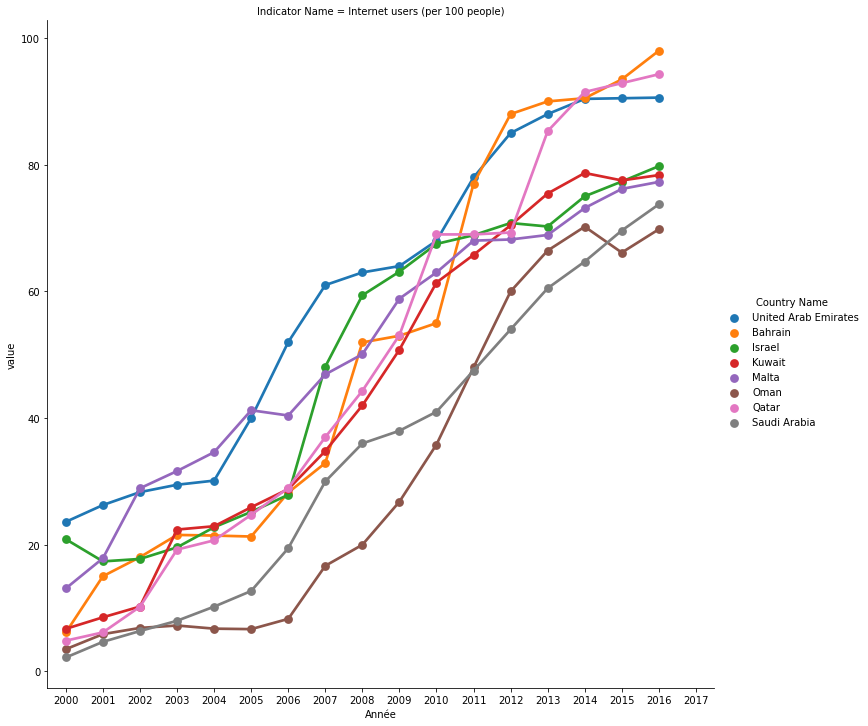

In [ ]:
sns.catplot(x='Année', y='value', data=df_Middle_East_and_North_Africa_Internet_users, hue='Country Name', col='Indicator Name', kind='point', height = 10)


### Analyse 
On constate que 3 pays se distingue nettement : Bahrain , les Emirats Arabes Unis et le Qatar sont équipés à + de 95% d'internet en 2017.


In [ ]:
df_Middle_East_and_North_Africa_PIB_courant = df_Middle_East_and_North_Africa[df_Middle_East_and_North_Africa['Indicator Name'] == 'GDP, PPP (current international $)']
df_Middle_East_and_North_Africa_PIB_courant.head()

Country Name                      Region          Income Group  \
188  United Arab Emirates  Middle East & North Africa  High income: nonOECD   
263                Israel  Middle East & North Africa     High income: OECD   
275                Kuwait  Middle East & North Africa  High income: nonOECD   
294                 Malta  Middle East & North Africa  High income: nonOECD   
311                  Oman  Middle East & North Africa  High income: nonOECD   

                         Indicator Name Année         value  
188  GDP, PPP (current international $)  2000  2.581316e+11  
263  GDP, PPP (current international $)  2000  1.567918e+11  
275  GDP, PPP (current international $)  2000  1.136535e+11  
294  GDP, PPP (current international $)  2000  7.571892e+09  
311  GDP, PPP (current international $)  2000  7.903575e+10

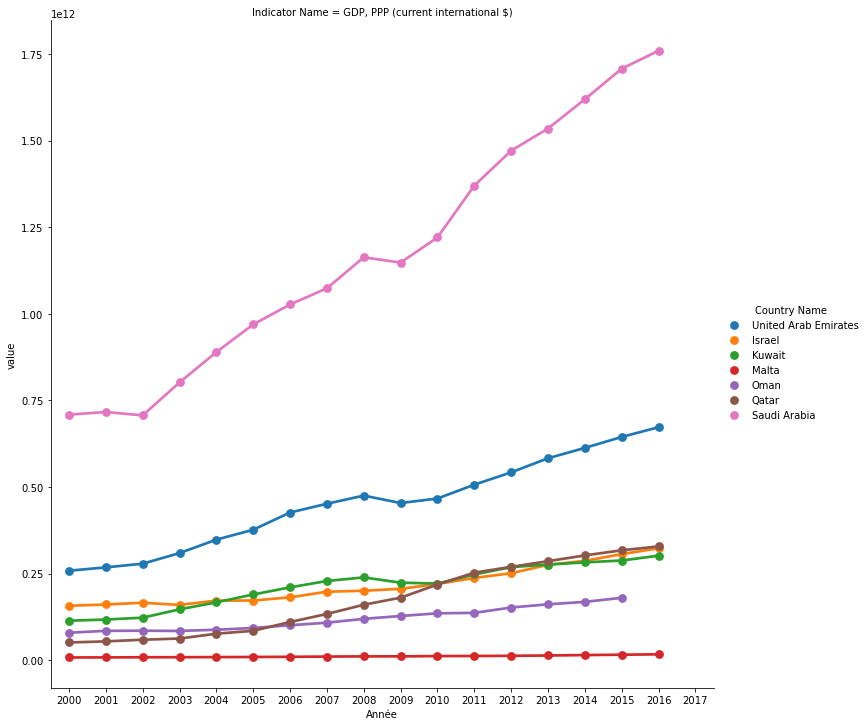

In [ ]:
sns.catplot(x='Année', y='value', data=df_Middle_East_and_North_Africa_PIB_courant, hue='Country Name', col='Indicator Name', kind='point', height = 10)

### Analyse
Le PIB de l'arabie saoudite dépasse de loin celui des autres pays, le deuxième étant les émirats arabes unis.

In [ ]:
df_Middle_East_and_North_Africa_PIB_constant_2011 = df_Middle_East_and_North_Africa[df_Middle_East_and_North_Africa['Indicator Name'] == 'GDP, PPP (constant 2011 international $)']
df_Middle_East_and_North_Africa_PIB_constant_2011.head()

Country Name                      Region          Income Group  \
370  United Arab Emirates  Middle East & North Africa  High income: nonOECD   
383               Bahrain  Middle East & North Africa  High income: nonOECD   
448                Israel  Middle East & North Africa     High income: OECD   
460                Kuwait  Middle East & North Africa  High income: nonOECD   
479                 Malta  Middle East & North Africa  High income: nonOECD   

                               Indicator Name Année         value  
370  GDP, PPP (constant 2011 international $)  2000  3.256653e+11  
383  GDP, PPP (constant 2011 international $)  2000  2.986933e+10  
448  GDP, PPP (constant 2011 international $)  2000  1.687006e+11  
460  GDP, PPP (constant 2011 international $)  2000  1.433882e+11  
479  GDP, PPP (constant 2011 international $)  2000  9.593600e+09

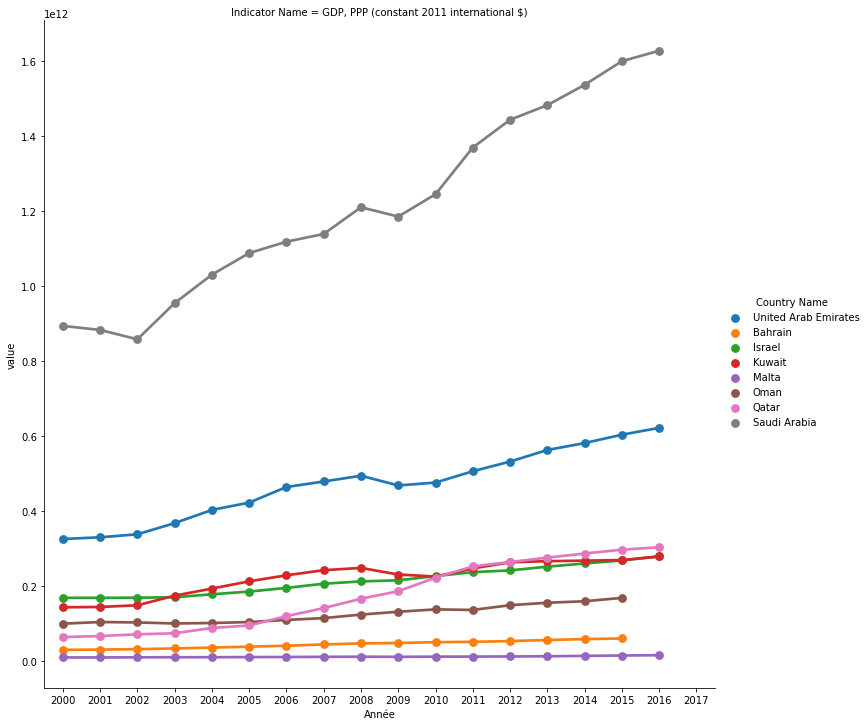

In [ ]:
sns.catplot(x='Année', y='value', data=df_Middle_East_and_North_Africa_PIB_constant_2011, hue='Country Name', col='Indicator Name', kind='point', height = 10)

In [ ]:
df_Middle_East_and_North_Africa_PÏB_par_habitant_courant = df_Middle_East_and_North_Africa[df_Middle_East_and_North_Africa['Indicator Name'] == 'GDP per capita, PPP (current international $)']
df_Middle_East_and_North_Africa_PÏB_par_habitant_courant.head()

Country Name                      Region          Income Group  \
555  United Arab Emirates  Middle East & North Africa  High income: nonOECD   
630                Israel  Middle East & North Africa     High income: OECD   
642                Kuwait  Middle East & North Africa  High income: nonOECD   
661                 Malta  Middle East & North Africa  High income: nonOECD   
678                  Oman  Middle East & North Africa  High income: nonOECD   

                                    Indicator Name Année         value  
555  GDP per capita, PPP (current international $)  2000  81818.620517  
630  GDP per capita, PPP (current international $)  2000  24931.111060  
642  GDP per capita, PPP (current international $)  2000  55420.722652  
661  GDP per capita, PPP (current international $)  2000  19410.776349  
678  GDP per capita, PPP (current international $)  2000  34848.351287

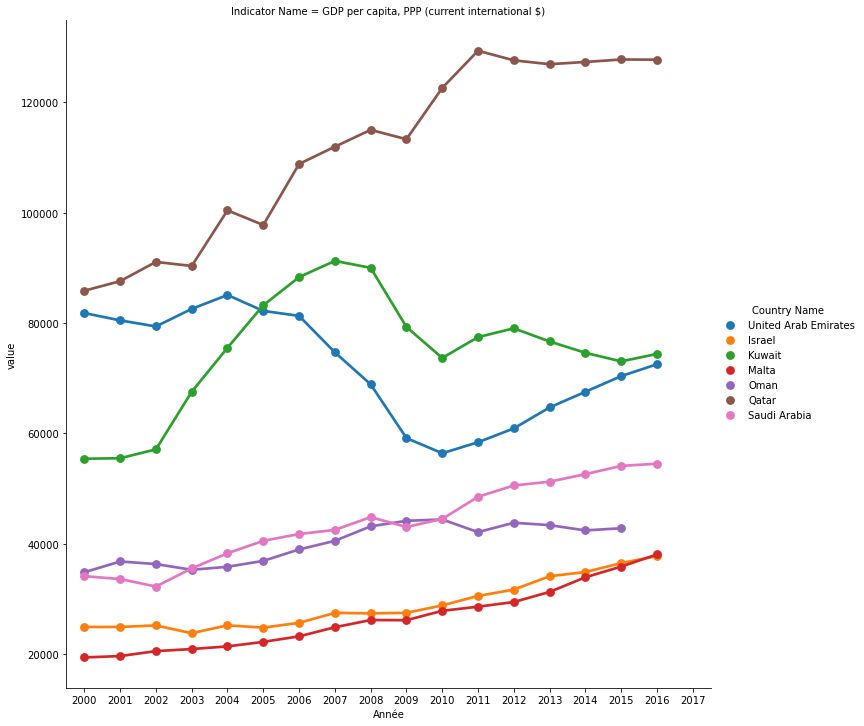

In [ ]:
sns.catplot(x='Année', y='value', data=df_Middle_East_and_North_Africa_PÏB_par_habitant_courant, hue='Country Name', col='Indicator Name', kind='point', height = 10)

### Analyse
Le Qatar est le pays le plus riche par habitant, suivi de loin par le koweit et les émirats arabes unis.

In [ ]:
df_Middle_East_and_North_Africa_PIB_par_habitant_constant_2011 = df_Middle_East_and_North_Africa[df_Middle_East_and_North_Africa['Indicator Name'] == 'GDP per capita, PPP (constant 2011 international $)']
df_Middle_East_and_North_Africa_PIB_par_habitant_constant_2011.head()

Country Name                      Region          Income Group  \
737  United Arab Emirates  Middle East & North Africa  High income: nonOECD   
750               Bahrain  Middle East & North Africa  High income: nonOECD   
815                Israel  Middle East & North Africa     High income: OECD   
827                Kuwait  Middle East & North Africa  High income: nonOECD   
846                 Malta  Middle East & North Africa  High income: nonOECD   

                                        Indicator Name Année          value  
737  GDP per capita, PPP (constant 2011 internation...  2000  103224.426650  
750  GDP per capita, PPP (constant 2011 internation...  2000   44942.369023  
815  GDP per capita, PPP (constant 2011 internation...  2000   26824.705115  
827  GDP per capita, PPP (constant 2011 internation...  2000   69920.175678  
846  GDP per capita, PPP (constant 2011 internation...  2000   24593.487674

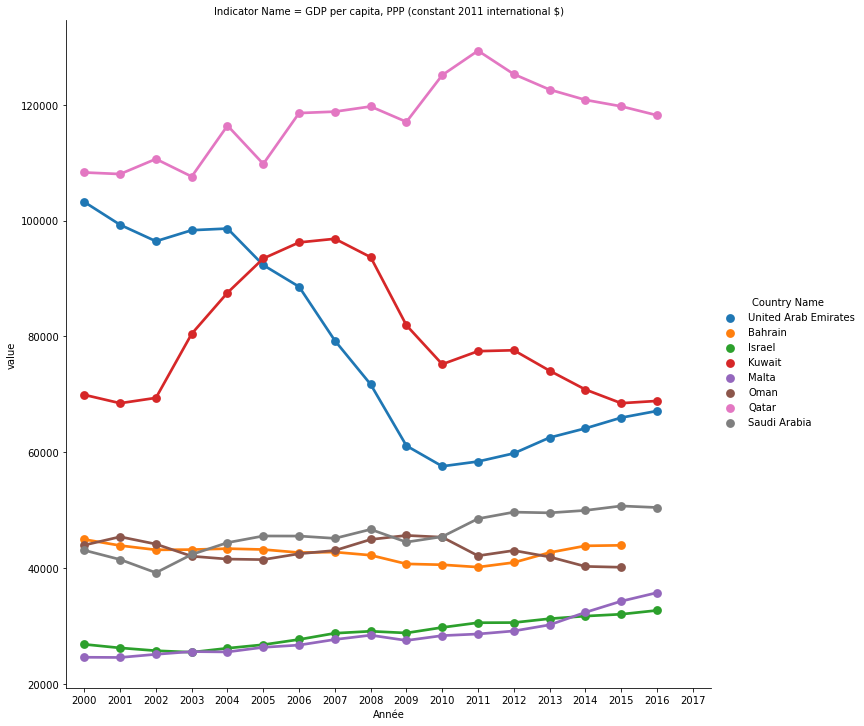

In [ ]:
sns.catplot(x='Année', y='value', data=df_Middle_East_and_North_Africa_PIB_par_habitant_constant_2011, hue='Country Name', col='Indicator Name', kind='point', height = 10)

In [ ]:
df_Middle_East_and_North_Africa_pop_growth = df_Middle_East_and_North_Africa[df_Middle_East_and_North_Africa['Indicator Name'] == 'Population growth (annual %)']
df_Middle_East_and_North_Africa_pop_growth.head()

Country Name                      Region          Income Group  \
922   United Arab Emirates  Middle East & North Africa  High income: nonOECD   
935                Bahrain  Middle East & North Africa  High income: nonOECD   
999                 Israel  Middle East & North Africa     High income: OECD   
1011                Kuwait  Middle East & North Africa  High income: nonOECD   
1031                 Malta  Middle East & North Africa  High income: nonOECD   

                    Indicator Name Année     value  
922   Population growth (annual %)  2000  5.430624  
935   Population growth (annual %)  2000  4.315131  
999   Population growth (annual %)  2000  2.642332  
1011  Population growth (annual %)  2000  4.675478  
1031  Population growth (annual %)  2000  0.645267

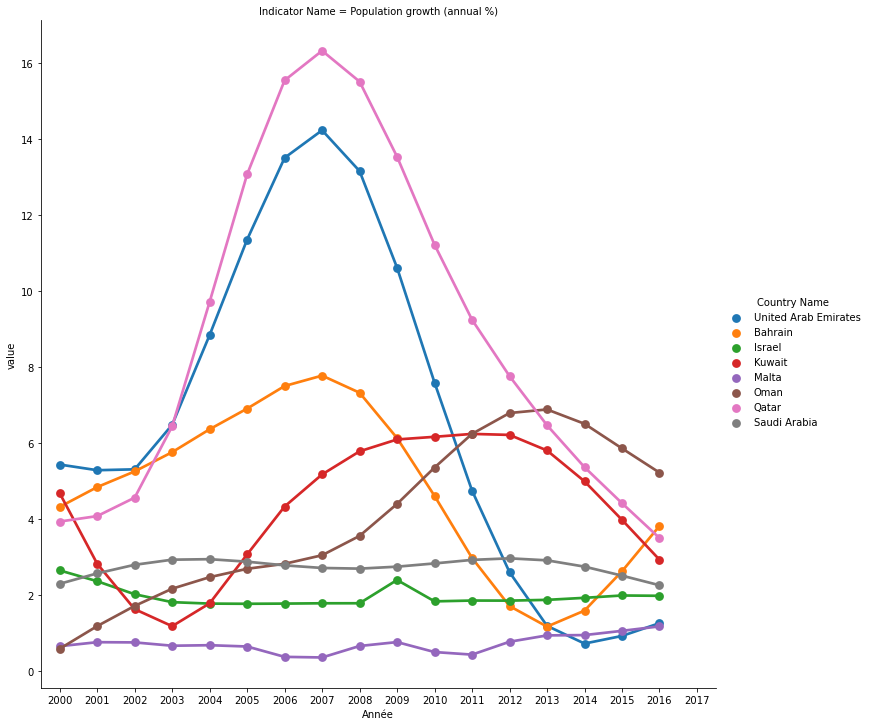

In [ ]:
sns.catplot(x='Année', y='value', data=df_Middle_East_and_North_Africa_pop_growth, hue='Country Name', col='Indicator Name', kind='point', height = 10)

### Analyse
Le qatar et les émirats arabes unis connaissent un ralentissement de la croissance de leur population.

In [ ]:
df_Middle_East_and_North_Africa_pop_totale = df_Middle_East_and_North_Africa[df_Middle_East_and_North_Africa['Indicator Name'] == 'Population, total']
df_Middle_East_and_North_Africa_pop_totale.head()

Country Name                      Region          Income Group  \
1111  United Arab Emirates  Middle East & North Africa  High income: nonOECD   
1124               Bahrain  Middle East & North Africa  High income: nonOECD   
1188                Israel  Middle East & North Africa     High income: OECD   
1200                Kuwait  Middle East & North Africa  High income: nonOECD   
1220                 Malta  Middle East & North Africa  High income: nonOECD   

         Indicator Name Année      value  
1111  Population, total  2000  3154925.0  
1124  Population, total  2000   664614.0  
1188  Population, total  2000  6289000.0  
1200  Population, total  2000  2050741.0  
1220  Population, total  2000   390087.0

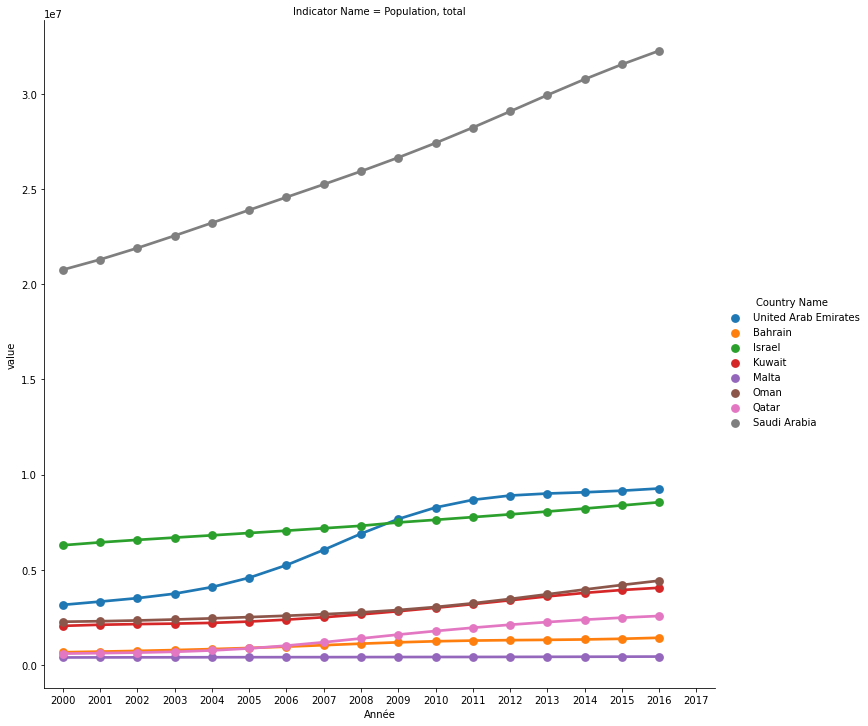

In [ ]:
sns.catplot(x='Année', y='value', data=df_Middle_East_and_North_Africa_pop_totale, hue='Country Name', col='Indicator Name', kind='point', height = 10)

### Analyse
L'arabie saoudite possède de très loin la population la plus importante devant les émirats arabes et israël.

### Indicateurs relatifs à l'éducation 

In [ ]:
df_Middle_East_and_North_Africa[df_Middle_East_and_North_Africa['Indicator Name'] == 'Government expenditure per secondary student as % of GDP per capita (%)']

Empty DataFrame
Columns: [Country Name, Region, Income Group, Indicator Name, Année, value]
Index: []

In [ ]:
df_Middle_East_and_North_Africa[df_Middle_East_and_North_Africa['Indicator Name'] == 'Government expenditure per tertiary student as % of GDP per capita (%)']

Empty DataFrame
Columns: [Country Name, Region, Income Group, Indicator Name, Année, value]
Index: []

## Amérique du Nord

In [ ]:
df_North_America = df5_melted_High_Income[df5_melted_High_Income['Region'] =='North America']
df_North_America

Country Name         Region       Income Group  \
27            Canada  North America  High income: OECD   
174    United States  North America  High income: OECD   
211           Canada  North America  High income: OECD   
355    United States  North America  High income: OECD   
395           Canada  North America  High income: OECD   
...              ...            ...                ...   
23636  United States  North America  High income: OECD   
23675         Canada  North America  High income: OECD   
23825  United States  North America  High income: OECD   
23864         Canada  North America  High income: OECD   
24014  United States  North America  High income: OECD   

                                          Indicator Name Année         value  
27                       Internet users (per 100 people)  2000  5.130000e+01  
174                      Internet users (per 100 people)  2000  4.307916e+01  
211                   GDP, PPP (current international $)  2000  8.980246e+11  
355                   GDP, PPP (current international $)  2000  1.028478e+13  
395             GDP, PPP (constant 2011 international $)  2000  1.151769e+12  
...                                                  ...   ...           ...  
23636  GDP per capita, PPP (constant 2011 internation...  2017           NaN  
23675                       Population growth (annual %)  2017           NaN  
23825                       Population growth (annual %)  2017           NaN  
23864                                  Population, total  2017           NaN  
24014                                  Population, total  2017           NaN  

[252 rows x 6 columns]

In [ ]:
moy_par_indicateur_North_America = df_North_America.groupby(['Indicator Name','Country Name'], as_index=False).agg({'value': 'mean'}).sort_values(by = ['Indicator Name','value'], ascending=False)
moy_par_indicateur_North_America

Indicator Name   Country Name  \
13                                  Population, total  United States   
12                                  Population, total         Canada   
10                       Population growth (annual %)         Canada   
11                       Population growth (annual %)  United States   
8                     Internet users (per 100 people)         Canada   
9                     Internet users (per 100 people)  United States   
7                  GDP, PPP (current international $)  United States   
6                  GDP, PPP (current international $)         Canada   
5            GDP, PPP (constant 2011 international $)  United States   
4            GDP, PPP (constant 2011 international $)         Canada   
3       GDP per capita, PPP (current international $)  United States   
2       GDP per capita, PPP (current international $)         Canada   
1   GDP per capita, PPP (constant 2011 internation...  United States   
0   GDP per capita, PPP (constant 2011 internation...         Canada   

           value  
13  3.033803e+08  
12  3.338018e+07  
10  1.022019e+00  
11  8.628934e-01  
8   7.500231e+01  
9   6.738532e+01  
7   1.433539e+13  
6   1.284371e+12  
5   1.507389e+13  
4   1.362130e+12  
3   4.698856e+04  
2   3.822688e+04  
1   4.960544e+04  
0   4.072493e+04

In [ ]:
df_North_America_Internet_users = df_North_America[df_North_America['Indicator Name'] == 'Internet users (per 100 people)']
df_North_America_Internet_users.head()


Country Name         Region       Income Group  \
27           Canada  North America  High income: OECD   
174   United States  North America  High income: OECD   
1364         Canada  North America  High income: OECD   
1511  United States  North America  High income: OECD   
2701         Canada  North America  High income: OECD   

                       Indicator Name Année      value  
27    Internet users (per 100 people)  2000  51.300000  
174   Internet users (per 100 people)  2000  43.079163  
1364  Internet users (per 100 people)  2001  60.200000  
1511  Internet users (per 100 people)  2001  49.080832  
2701  Internet users (per 100 people)  2002  61.593299

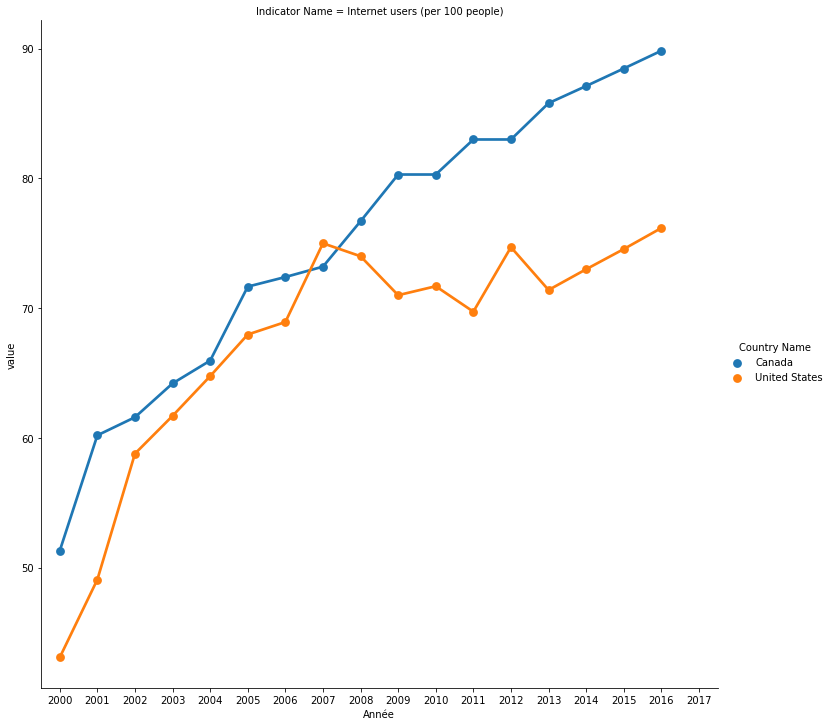

In [ ]:
sns.catplot(x='Année', y='value', data=df_North_America_Internet_users, hue='Country Name', col='Indicator Name', kind='point', height = 10)

### Analyse
Le canada est dôté à plus de 90% d'internet et les Etats unis à plus de 70%.

In [ ]:
df_North_America_PIB_courant = df_North_America[df_North_America['Indicator Name'] == 'GDP, PPP (current international $)']
df_North_America_PIB_courant.head()

Country Name         Region       Income Group  \
211          Canada  North America  High income: OECD   
355   United States  North America  High income: OECD   
1548         Canada  North America  High income: OECD   
1692  United States  North America  High income: OECD   
2885         Canada  North America  High income: OECD   

                          Indicator Name Année         value  
211   GDP, PPP (current international $)  2000  8.980246e+11  
355   GDP, PPP (current international $)  2000  1.028478e+13  
1548  GDP, PPP (current international $)  2001  9.347544e+11  
1692  GDP, PPP (current international $)  2001  1.062182e+13  
2885  GDP, PPP (current international $)  2002  9.675588e+11

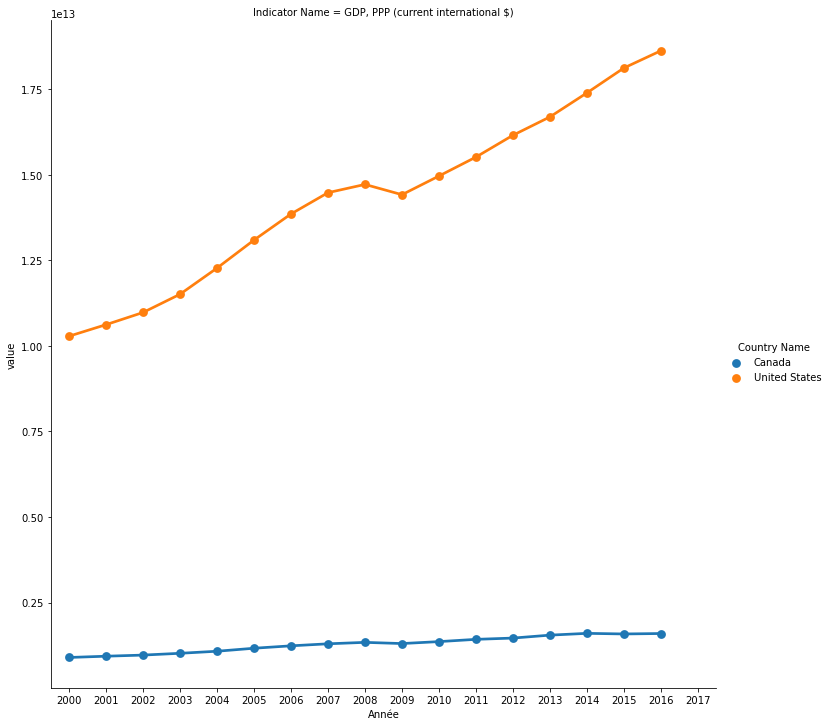

In [ ]:
sns.catplot(x='Année', y='value', data=df_North_America_PIB_courant, hue='Country Name', col='Indicator Name', kind='point', height = 10)


In [ ]:
df_North_America_PIB_constant_2011 = df_North_America[df_North_America['Indicator Name'] == 'GDP, PPP (constant 2011 international $)']
df_North_America_PIB_constant_2011.head()

Country Name         Region       Income Group  \
395          Canada  North America  High income: OECD   
540   United States  North America  High income: OECD   
1732         Canada  North America  High income: OECD   
1877  United States  North America  High income: OECD   
3069         Canada  North America  High income: OECD   

                                Indicator Name Année         value  
395   GDP, PPP (constant 2011 international $)  2000  1.151769e+12  
540   GDP, PPP (constant 2011 international $)  2000  1.297554e+13  
1732  GDP, PPP (constant 2011 international $)  2001  1.172165e+12  
1877  GDP, PPP (constant 2011 international $)  2001  1.310217e+13  
3069  GDP, PPP (constant 2011 international $)  2002  1.207447e+12

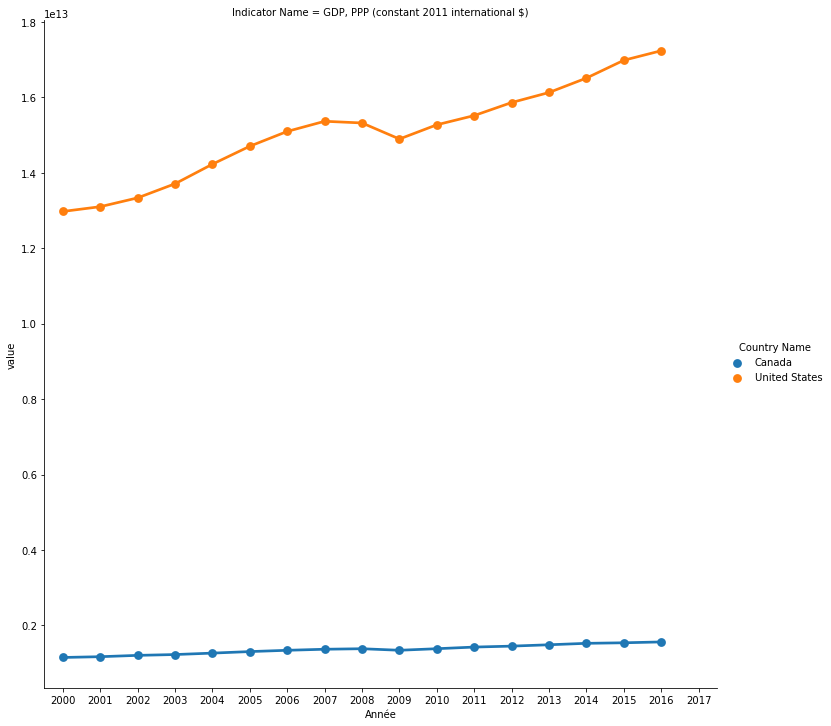

In [ ]:
sns.catplot(x='Année', y='value', data=df_North_America_PIB_constant_2011, hue='Country Name', col='Indicator Name', kind='point', height = 10)

### Analyse
Le canada ne dégage que très peu de richesse de sa production contrairement aux Etats-Unis.

In [ ]:
df_North_America_PÏB_par_habitant_courant = df_North_America[df_North_America['Indicator Name'] == 'GDP per capita, PPP (current international $)']
df_North_America_PÏB_par_habitant_courant.head()

Country Name         Region       Income Group  \
578          Canada  North America  High income: OECD   
722   United States  North America  High income: OECD   
1915         Canada  North America  High income: OECD   
2059  United States  North America  High income: OECD   
3252         Canada  North America  High income: OECD   

                                     Indicator Name Année         value  
578   GDP per capita, PPP (current international $)  2000  29185.355059  
722   GDP per capita, PPP (current international $)  2000  36449.855116  
1915  GDP per capita, PPP (current international $)  2001  30073.912805  
2059  GDP per capita, PPP (current international $)  2001  37273.618103  
3252  GDP per capita, PPP (current international $)  2002  30851.311482

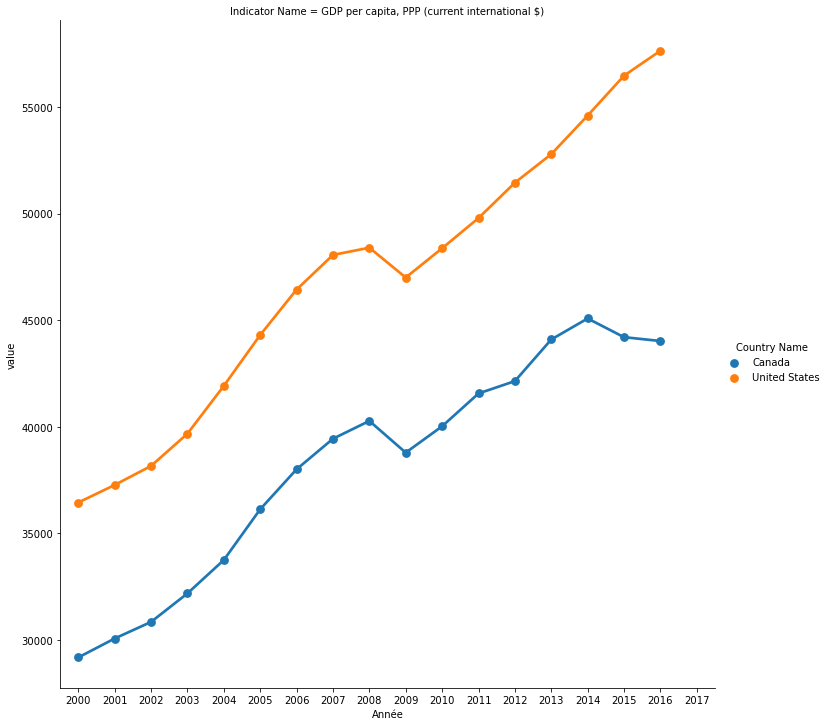

In [ ]:
sns.catplot(x='Année', y='value', data=df_North_America_PÏB_par_habitant_courant, hue='Country Name', col='Indicator Name', kind='point', height = 10)

In [ ]:
df_North_America_PIB_par_habitant_constant_2011 = df_North_America[df_North_America['Indicator Name'] == 'GDP per capita, PPP (constant 2011 international $)']
df_North_America_PIB_par_habitant_constant_2011.head()

Country Name         Region       Income Group  \
762          Canada  North America  High income: OECD   
907   United States  North America  High income: OECD   
2099         Canada  North America  High income: OECD   
2244  United States  North America  High income: OECD   
3436         Canada  North America  High income: OECD   

                                         Indicator Name Année         value  
762   GDP per capita, PPP (constant 2011 internation...  2000  37431.916978  
907   GDP per capita, PPP (constant 2011 internation...  2000  45986.052710  
2099  GDP per capita, PPP (constant 2011 internation...  2001  37712.128235  
2244  GDP per capita, PPP (constant 2011 internation...  2001  45977.549991  
3436  GDP per capita, PPP (constant 2011 internation...  2002  38500.317077

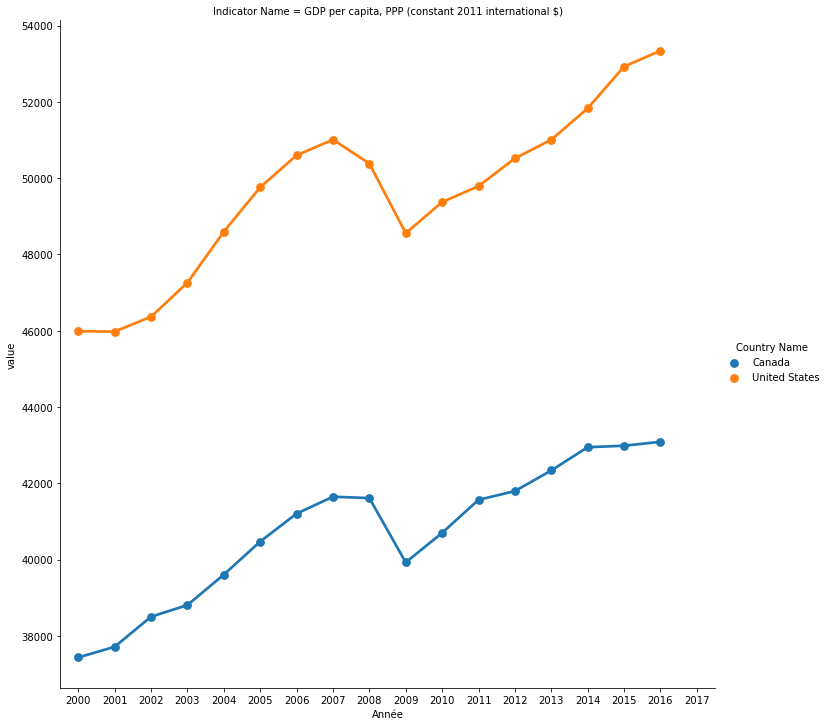

In [ ]:
sns.catplot(x='Année', y='value', data=df_North_America_PIB_par_habitant_constant_2011, hue='Country Name', col='Indicator Name', kind='point', height = 10)

### Analyse
Le niveau de richesse par habitant des Etats-Unis est bien plus important qu'au Canada, le rendant plus attractif.

In [ ]:
df_North_America_pop_growth = df_North_America[df_North_America['Indicator Name'] == 'Population growth (annual %)']
df_North_America_pop_growth.head()

Country Name         Region       Income Group  \
946          Canada  North America  High income: OECD   
1096  United States  North America  High income: OECD   
2283         Canada  North America  High income: OECD   
2433  United States  North America  High income: OECD   
3620         Canada  North America  High income: OECD   

                    Indicator Name Année     value  
946   Population growth (annual %)  2000  0.882999  
1096  Population growth (annual %)  2000  1.112769  
2283  Population growth (annual %)  2001  1.009522  
2433  Population growth (annual %)  2001  0.989741  
3620  Population growth (annual %)  2002  0.897131

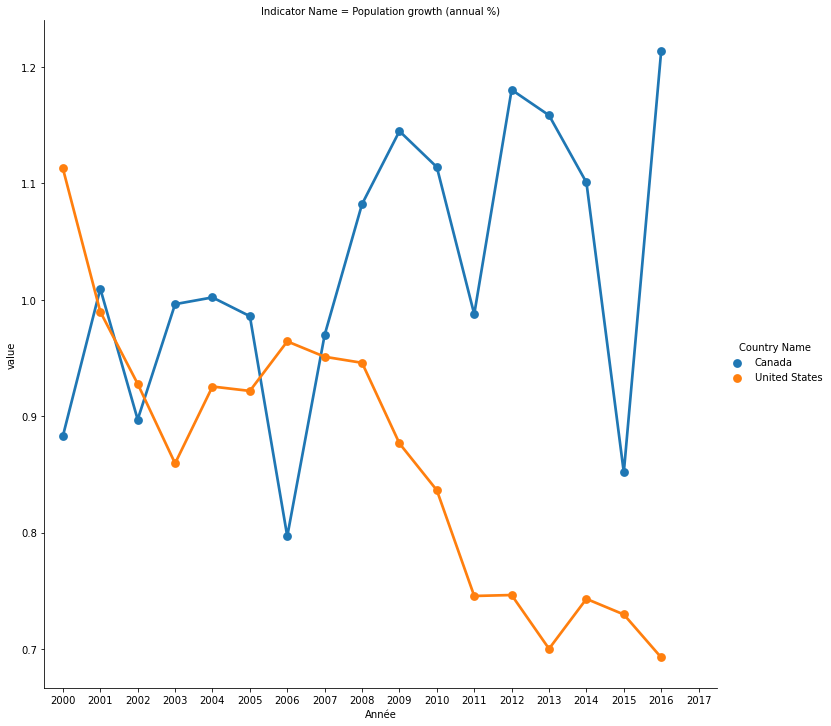

In [ ]:
sns.catplot(x='Année', y='value', data=df_North_America_pop_growth, hue='Country Name', col='Indicator Name', kind='point', height = 10)

In [ ]:
df_North_America_pop_totale = df_North_America[df_North_America['Indicator Name'] == 'Population, total']
df_North_America_pop_totale.head()

Country Name         Region       Income Group     Indicator Name  \
1135         Canada  North America  High income: OECD  Population, total   
1285  United States  North America  High income: OECD  Population, total   
2472         Canada  North America  High income: OECD  Population, total   
2622  United States  North America  High income: OECD  Population, total   
3809         Canada  North America  High income: OECD  Population, total   

     Année        value  
1135  2000   30769700.0  
1285  2000  282162411.0  
2472  2001   31081900.0  
2622  2001  284968955.0  
3809  2002   31362000.0

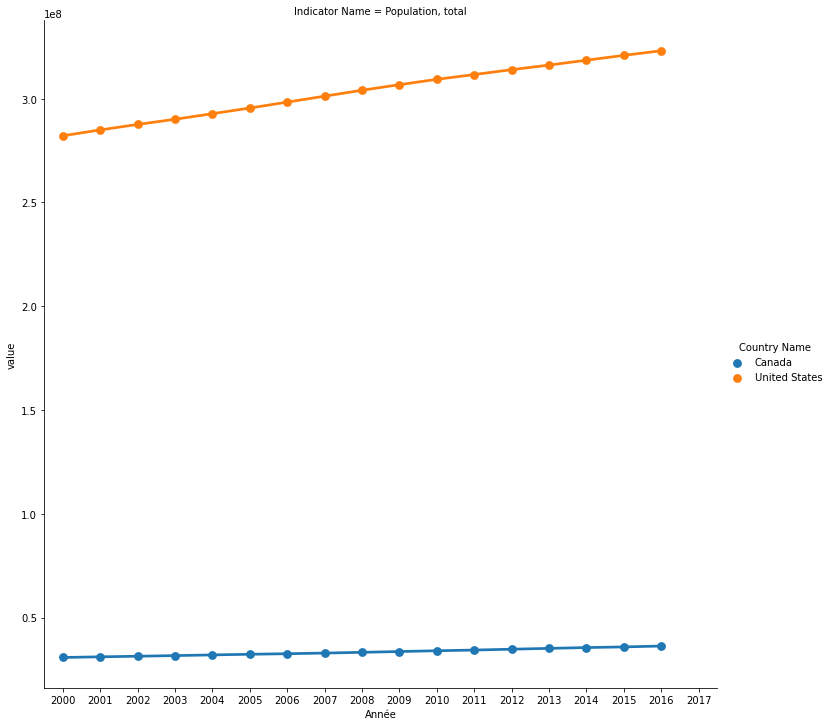

In [ ]:
sns.catplot(x='Année', y='value', data=df_North_America_pop_totale, hue='Country Name', col='Indicator Name', kind='point', height = 10)

### Analyse
Les Etats-Unis comporte de très loin la population la plus importante, avec un PIB par habitant extrêmement élevé. Les perspective de profit y sont importantes.

### Indicateurs relatifs à l'éducation 

In [ ]:
df_North_America[df_North_America['Indicator Name'] == 'Government expenditure per secondary student as % of GDP per capita (%)']

Empty DataFrame
Columns: [Country Name, Region, Income Group, Indicator Name, Année, value]
Index: []

In [ ]:
df_North_America[df_North_America['Indicator Name'] == 'Government expenditure per tertiary student as % of GDP per capita (%)']

Empty DataFrame
Columns: [Country Name, Region, Income Group, Indicator Name, Année, value]
Index: []

## Europe et Asie centrale

In [ ]:
df_Europe_et_Asie_centrale = df5_melted_High_Income[df5_melted_High_Income['Region'] == 'Europe & Central Asia']
df_Europe_et_Asie_centrale

Country Name                 Region          Income Group  \
8              Austria  Europe & Central Asia     High income: OECD   
11             Belgium  Europe & Central Asia     High income: OECD   
28         Switzerland  Europe & Central Asia     High income: OECD   
40              Cyprus  Europe & Central Asia  High income: nonOECD   
41      Czech Republic  Europe & Central Asia     High income: OECD   
...                ...                    ...                   ...   
23995           Sweden  Europe & Central Asia     High income: OECD   
24037           Latvia  Europe & Central Asia  High income: nonOECD   
24042  Slovak Republic  Europe & Central Asia     High income: OECD   
24057           Latvia  Europe & Central Asia  High income: nonOECD   
24061  Slovak Republic  Europe & Central Asia     High income: OECD   

                                          Indicator Name Année      value  
8                        Internet users (per 100 people)  2000  33.730133  
11                       Internet users (per 100 people)  2000  29.431692  
28                       Internet users (per 100 people)  2000  47.100000  
40                       Internet users (per 100 people)  2000  15.255394  
41                       Internet users (per 100 people)  2000   9.780528  
...                                                  ...   ...        ...  
23995                                  Population, total  2017        NaN  
24037  Government expenditure on secondary education ...  2017        NaN  
24042  Government expenditure on secondary education ...  2017        NaN  
24057  Government expenditure on tertiary education a...  2017        NaN  
24061  Government expenditure on tertiary education a...  2017        NaN  

[3600 rows x 6 columns]

In [ ]:
moy_par_indicateur_Europe_et_Asie_centrale = df_Europe_et_Asie_centrale.groupby(['Indicator Name','Country Name'], as_index=False).agg({'value': 'mean'}).sort_values(by = ['Indicator Name','value'], ascending=False)
moy_par_indicateur_Europe_et_Asie_centrale

Indicator Name        Country Name  \
193                                  Population, total  Russian Federation   
181                                  Population, total             Germany   
180                                  Population, total              France   
199                                  Population, total      United Kingdom   
185                                  Population, total               Italy   
..                                                 ...                 ...   
21   GDP per capita, PPP (constant 2011 internation...  Russian Federation   
15   GDP per capita, PPP (constant 2011 internation...           Lithuania   
19   GDP per capita, PPP (constant 2011 internation...              Poland   
2    GDP per capita, PPP (constant 2011 internation...             Croatia   
14   GDP per capita, PPP (constant 2011 internation...              Latvia   

            value  
193  1.438984e+08  
181  8.186383e+07  
180  6.416499e+07  
199  6.193559e+07  
185  5.876462e+07  
..            ...  
21   2.110942e+04  
15   2.068096e+04  
19   2.004343e+04  
2    1.962578e+04  
14   1.852342e+04  

[200 rows x 3 columns]

### Représentation graphique
Nous allons maintenant étudier une par une les différentes variables

In [ ]:
df_Europe_et_Asie_centrale['Indicator Name'].unique().tolist()

['Internet users (per 100 people)',
 'GDP, PPP (current international $)',
 'GDP, PPP (constant 2011 international $)',
 'GDP per capita, PPP (current international $)',
 'GDP per capita, PPP (constant 2011 international $)',
 'Population growth (annual %)',
 'Population, total',
 'Government expenditure on secondary education as % of GDP (%)',
 'Government expenditure on tertiary education as % of GDP (%)']

In [ ]:
df_Europe_et_Asie_centrale_Internet_users = df_Europe_et_Asie_centrale[df_Europe_et_Asie_centrale['Indicator Name'] == 'Internet users (per 100 people)']
df_Europe_et_Asie_centrale_Internet_users.head()

Country Name                 Region          Income Group  \
8          Austria  Europe & Central Asia     High income: OECD   
11         Belgium  Europe & Central Asia     High income: OECD   
28     Switzerland  Europe & Central Asia     High income: OECD   
40          Cyprus  Europe & Central Asia  High income: nonOECD   
41  Czech Republic  Europe & Central Asia     High income: OECD   

                     Indicator Name Année      value  
8   Internet users (per 100 people)  2000  33.730133  
11  Internet users (per 100 people)  2000  29.431692  
28  Internet users (per 100 people)  2000  47.100000  
40  Internet users (per 100 people)  2000  15.255394  
41  Internet users (per 100 people)  2000   9.780528

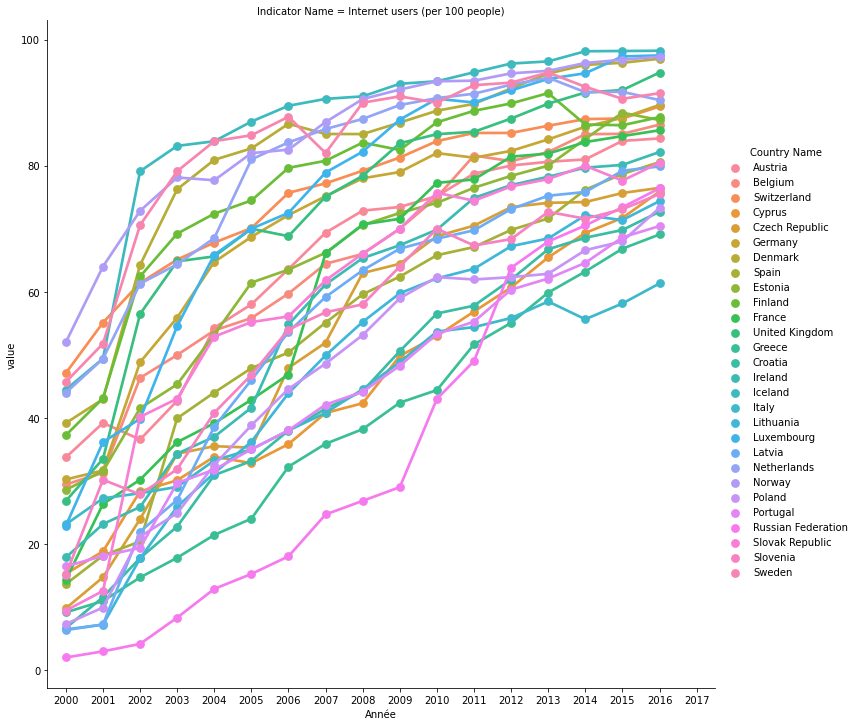

In [ ]:
sns.catplot(x='Année', y='value', data=df_Europe_et_Asie_centrale_Internet_users, hue='Country Name', col='Indicator Name', kind='point', height = 10)

### Analyse

In [ ]:
df_Europe_et_Asie_centrale_PIB_courant = df_Europe_et_Asie_centrale[df_Europe_et_Asie_centrale['Indicator Name'] == 'GDP, PPP (current international $)']
df_Europe_et_Asie_centrale_PIB_courant.head()

Country Name                 Region          Income Group  \
193         Austria  Europe & Central Asia     High income: OECD   
196         Belgium  Europe & Central Asia     High income: OECD   
212     Switzerland  Europe & Central Asia     High income: OECD   
223          Cyprus  Europe & Central Asia  High income: nonOECD   
224  Czech Republic  Europe & Central Asia     High income: OECD   

                         Indicator Name Année         value  
193  GDP, PPP (current international $)  2000  2.351994e+11  
196  GDP, PPP (current international $)  2000  2.866961e+11  
212  GDP, PPP (current international $)  2000  2.566722e+11  
223  GDP, PPP (current international $)  2000  1.505738e+10  
224  GDP, PPP (current international $)  2000  1.659100e+11

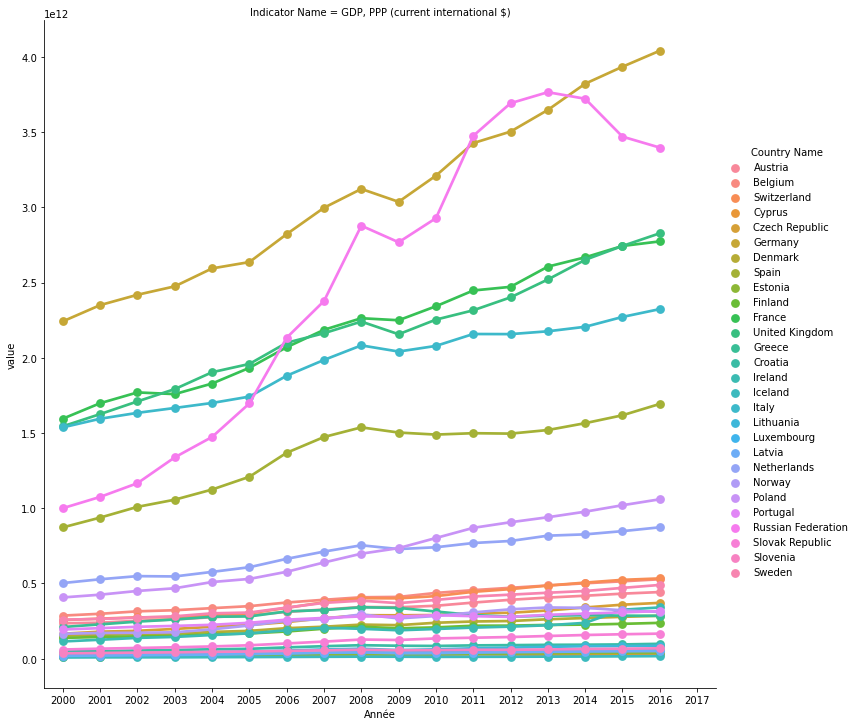

In [ ]:
sns.catplot(x='Année', y='value', data=df_Europe_et_Asie_centrale_PIB_courant, hue='Country Name', col='Indicator Name', kind='point', height = 10)

### Analyse
Dans l'ordre, les pays comportant le PIB les plus important sont l'Allemagne, la Russie, puis derrière, la France et le Royaume-Unis.

In [ ]:
df_Europe_et_Asie_centrale_PIB_constant_2011 = df_Europe_et_Asie_centrale[df_Europe_et_Asie_centrale['Indicator Name'] == 'GDP, PPP (constant 2011 international $)']
df_Europe_et_Asie_centrale_PIB_constant_2011.head()

Country Name                 Region          Income Group  \
375         Austria  Europe & Central Asia     High income: OECD   
378         Belgium  Europe & Central Asia     High income: OECD   
396     Switzerland  Europe & Central Asia     High income: OECD   
407          Cyprus  Europe & Central Asia  High income: nonOECD   
408  Czech Republic  Europe & Central Asia     High income: OECD   

                               Indicator Name Année         value  
375  GDP, PPP (constant 2011 international $)  2000  3.124549e+11  
378  GDP, PPP (constant 2011 international $)  2000  3.812301e+11  
396  GDP, PPP (constant 2011 international $)  2000  3.647873e+11  
407  GDP, PPP (constant 2011 international $)  2000  2.088022e+10  
408  GDP, PPP (constant 2011 international $)  2000  2.173448e+11

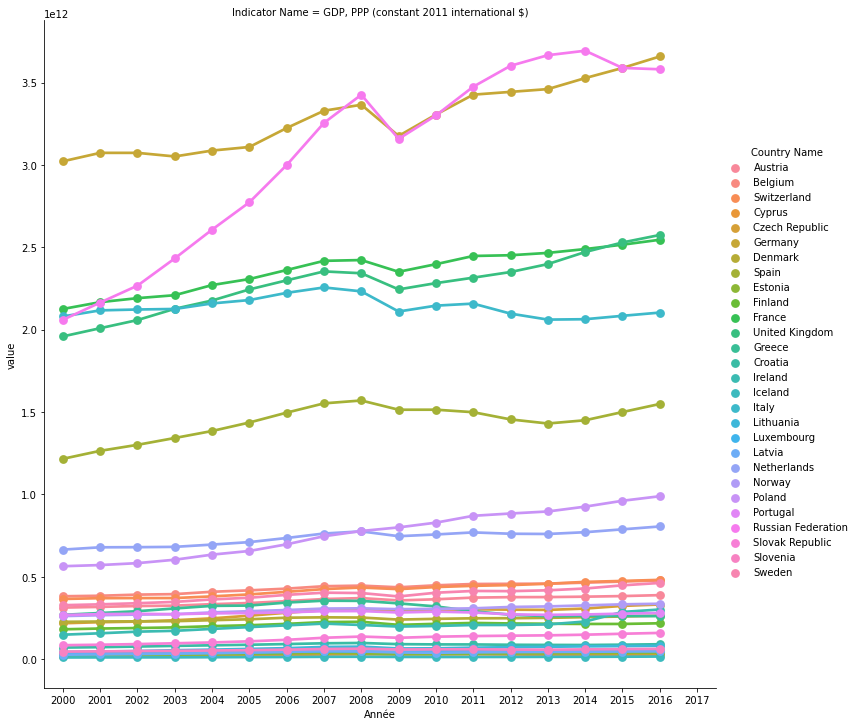

In [ ]:
sns.catplot(x='Année', y='value', data=df_Europe_et_Asie_centrale_PIB_constant_2011, hue='Country Name', col='Indicator Name', kind='point', height = 10)

### Analyse
En étudiant le PIB courant, nous constatons que finalement les PIB de l'Allemagne et de la Russie sont identiques, une fois l'effet de l'inflation supprimé. Les deux pays ont donc des PIB similaires.

In [ ]:
df_Europe_et_Asie_centrale_PÏB_par_habitant_courant = df_Europe_et_Asie_centrale[df_Europe_et_Asie_centrale['Indicator Name'] == 'GDP per capita, PPP (current international $)']
df_Europe_et_Asie_centrale_PÏB_par_habitant_courant.head()

Country Name                 Region          Income Group  \
560         Austria  Europe & Central Asia     High income: OECD   
563         Belgium  Europe & Central Asia     High income: OECD   
579     Switzerland  Europe & Central Asia     High income: OECD   
590          Cyprus  Europe & Central Asia  High income: nonOECD   
591  Czech Republic  Europe & Central Asia     High income: OECD   

                                    Indicator Name Année         value  
560  GDP per capita, PPP (current international $)  2000  29357.485725  
563  GDP per capita, PPP (current international $)  2000  27966.938804  
579  GDP per capita, PPP (current international $)  2000  35727.068352  
590  GDP per capita, PPP (current international $)  2000  21695.794534  
591  GDP per capita, PPP (current international $)  2000  16178.353832

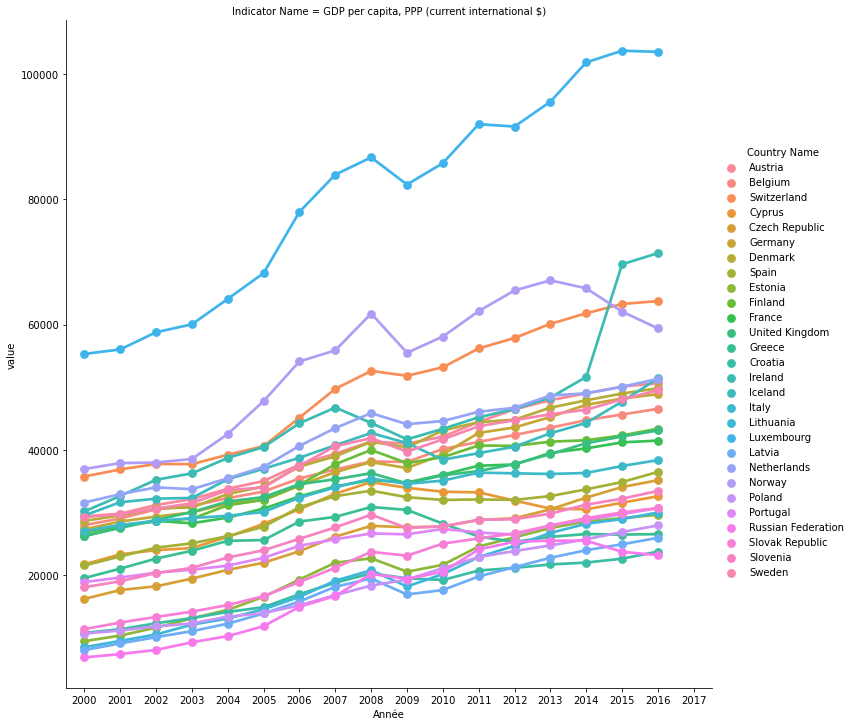

In [ ]:
sns.catplot(x='Année', y='value', data=df_Europe_et_Asie_centrale_PÏB_par_habitant_courant, hue='Country Name', col='Indicator Name', kind='point', height = 10)

### Analyse
Le Luxembourg dégage le PIB par habitant le plus important de tous, toutefois, il s'agit d'un petit pays. En 2ème et 3ème position nous avons l'Irlande, la Suisse, la Norvège. Pour information la majorité des revenus de ces 3 premiers pays proviennent ne provient probablement pas de leur industrie, mais de leur état de paradis fiscaux, se rapportant à une faible population du pays.

La Norvège quant à elle se distingue en tant que 4ème pays.

In [ ]:
df_Europe_et_Asie_centrale_PIB_par_habitant_constant_2011 = df_Europe_et_Asie_centrale[df_Europe_et_Asie_centrale['Indicator Name'] == 'GDP per capita, PPP (constant 2011 international $)']
df_Europe_et_Asie_centrale_PIB_par_habitant_constant_2011.head()

Country Name                 Region          Income Group  \
742         Austria  Europe & Central Asia     High income: OECD   
745         Belgium  Europe & Central Asia     High income: OECD   
763     Switzerland  Europe & Central Asia     High income: OECD   
774          Cyprus  Europe & Central Asia  High income: nonOECD   
775  Czech Republic  Europe & Central Asia     High income: OECD   

                                        Indicator Name Année         value  
742  GDP per capita, PPP (constant 2011 internation...  2000  39000.480953  
745  GDP per capita, PPP (constant 2011 internation...  2000  37188.643693  
763  GDP per capita, PPP (constant 2011 internation...  2000  50775.976339  
774  GDP per capita, PPP (constant 2011 internation...  2000  30085.774122  
775  GDP per capita, PPP (constant 2011 internation...  2000  21193.901714

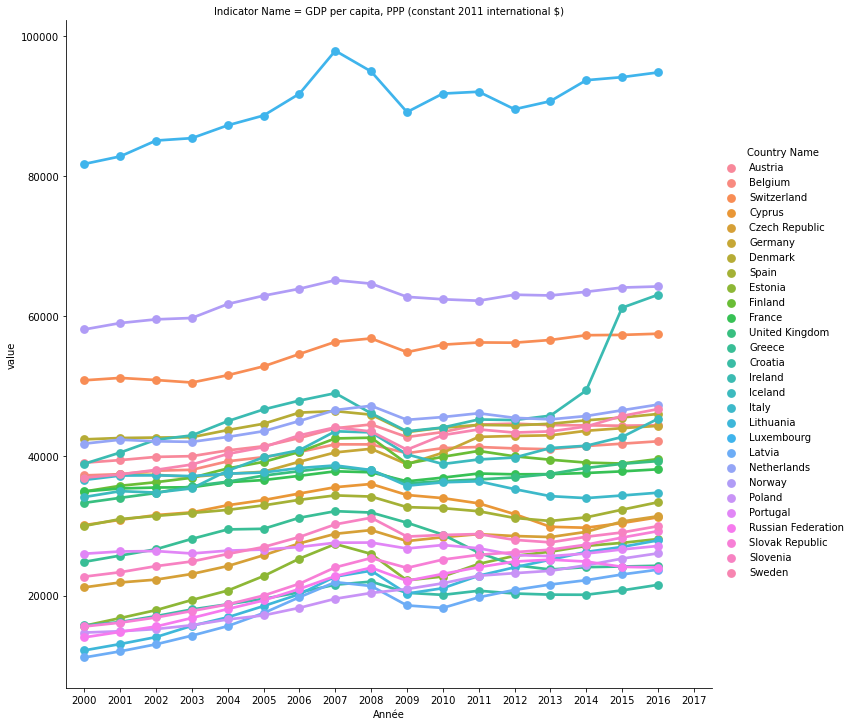

In [ ]:
sns.catplot(x='Année', y='value', data=df_Europe_et_Asie_centrale_PIB_par_habitant_constant_2011, hue='Country Name', col='Indicator Name', kind='point', height = 10)

### Analyse 

In [ ]:
df_Europe_et_Asie_centrale_pop_growth = df_Europe_et_Asie_centrale[df_Europe_et_Asie_centrale['Indicator Name'] == 'Population growth (annual %)']
df_Europe_et_Asie_centrale_pop_growth.head()

Country Name                 Region          Income Group  \
927         Austria  Europe & Central Asia     High income: OECD   
930         Belgium  Europe & Central Asia     High income: OECD   
947     Switzerland  Europe & Central Asia     High income: OECD   
959          Cyprus  Europe & Central Asia  High income: nonOECD   
960  Czech Republic  Europe & Central Asia     High income: OECD   

                   Indicator Name Année     value  
927  Population growth (annual %)  2000  0.240467  
930  Population growth (annual %)  2000  0.242518  
947  Population growth (annual %)  2000  0.561955  
959  Population growth (annual %)  2000  1.844130  
960  Population growth (annual %)  2000 -0.280414

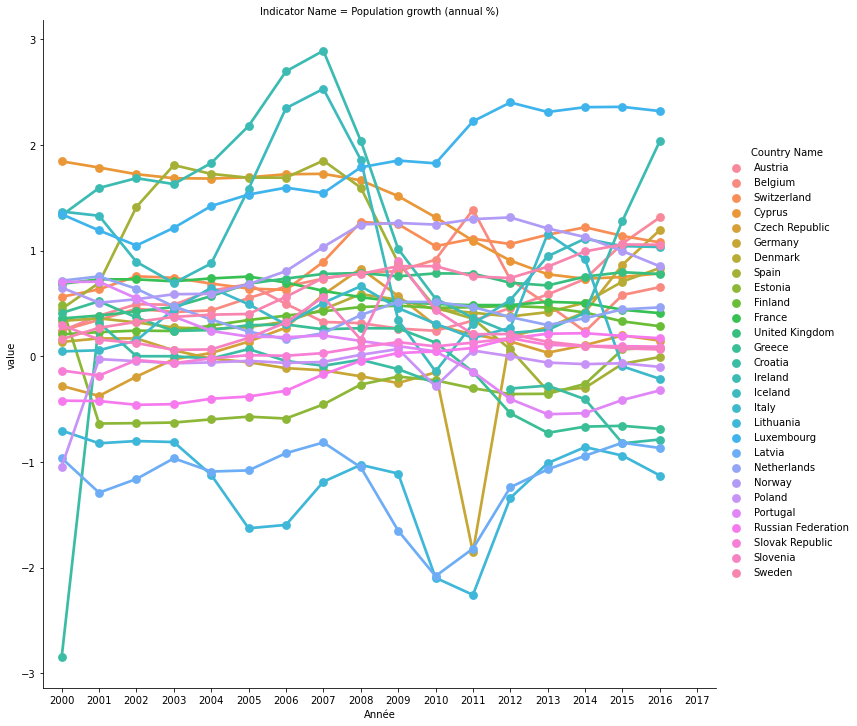

In [ ]:
sns.catplot(x='Année', y='value', data=df_Europe_et_Asie_centrale_pop_growth, hue='Country Name', col='Indicator Name', kind='point', height = 10)

### Analyse
La plus forte croissance de population vient du Luxembourg, de l'Irlande et de Chypre.

In [ ]:
df_Europe_et_Asie_centrale_pop_totale = df_Europe_et_Asie_centrale[df_Europe_et_Asie_centrale['Indicator Name'] == 'Population, total']
df_Europe_et_Asie_centrale_pop_totale.head()

Country Name                 Region          Income Group  \
1116         Austria  Europe & Central Asia     High income: OECD   
1119         Belgium  Europe & Central Asia     High income: OECD   
1136     Switzerland  Europe & Central Asia     High income: OECD   
1148          Cyprus  Europe & Central Asia  High income: nonOECD   
1149  Czech Republic  Europe & Central Asia     High income: OECD   

         Indicator Name Année       value  
1116  Population, total  2000   8011566.0  
1119  Population, total  2000  10251250.0  
1136  Population, total  2000   7184250.0  
1148  Population, total  2000    943286.0  
1149  Population, total  2000  10255063.0

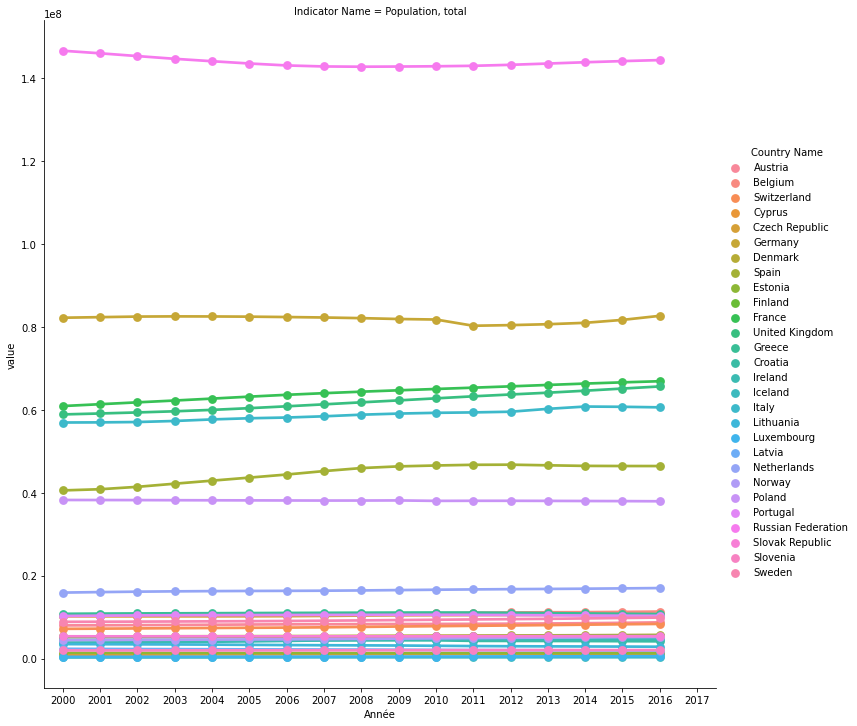

In [ ]:
sns.catplot(x='Année', y='value', data=df_Europe_et_Asie_centrale_pop_totale, hue='Country Name', col='Indicator Name', kind='point', height = 10)


### Analyse
La population la plus importante se situe en Russie, puis en Allemagne. Ces deux pays ne s'étant pas démarqué sur la variable PIB par habitant, mais sur celle de la population, ils pourraient être retenus pour une stratégie de pénétration du marché (notamment en Russie).

### Indicateurs relatifs à l'éducation 

In [ ]:
df_Europe_et_Asie_centrale_2dary_educ = df_Europe_et_Asie_centrale[df_Europe_et_Asie_centrale['Indicator Name'] == 'Government expenditure on secondary education as % of GDP (%)']
df_Europe_et_Asie_centrale_2dary_educ.head()

Country Name                 Region          Income Group  \
1308           Latvia  Europe & Central Asia  High income: nonOECD   
1313  Slovak Republic  Europe & Central Asia     High income: OECD   
2645           Latvia  Europe & Central Asia  High income: nonOECD   
2650  Slovak Republic  Europe & Central Asia     High income: OECD   
3982           Latvia  Europe & Central Asia  High income: nonOECD   

                                         Indicator Name Année    value  
1308  Government expenditure on secondary education ...  2000  2.57449  
1313  Government expenditure on secondary education ...  2000  1.97573  
2645  Government expenditure on secondary education ...  2001  2.81808  
2650  Government expenditure on secondary education ...  2001  2.02052  
3982  Government expenditure on secondary education ...  2002  2.96802

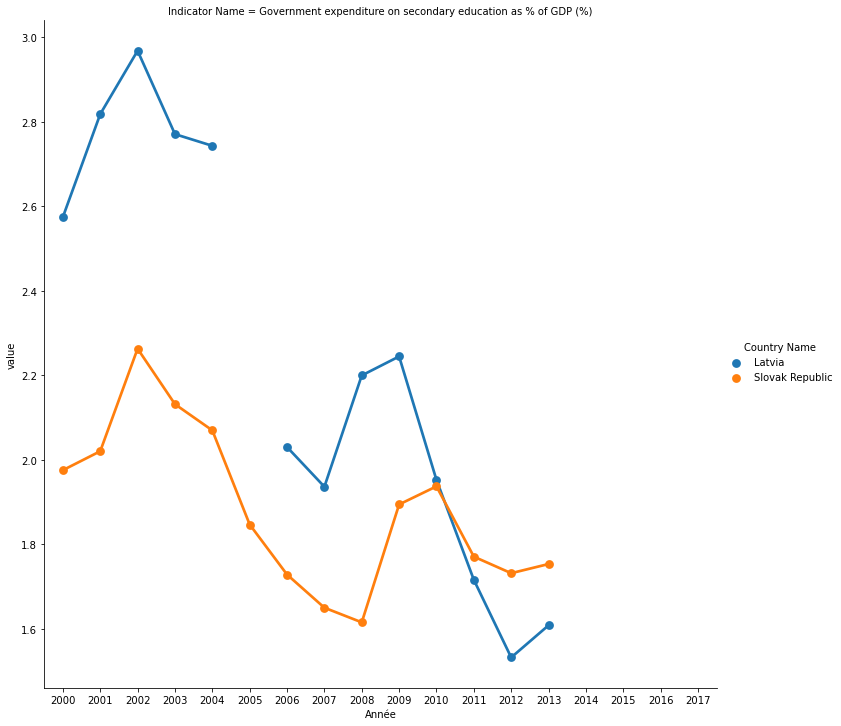

In [ ]:
sns.catplot(x='Année', y='value', data=df_Europe_et_Asie_centrale_2dary_educ, hue='Country Name', col='Indicator Name', kind='point', height = 10)


In [ ]:
df_Europe_et_Asie_centrale_3tiary_educ = df_Europe_et_Asie_centrale[df_Europe_et_Asie_centrale['Indicator Name'] == 'Government expenditure on tertiary education as % of GDP (%)']
df_Europe_et_Asie_centrale_3tiary_educ.head()

Country Name                 Region          Income Group  \
1328           Latvia  Europe & Central Asia  High income: nonOECD   
1332  Slovak Republic  Europe & Central Asia     High income: OECD   
2665           Latvia  Europe & Central Asia  High income: nonOECD   
2669  Slovak Republic  Europe & Central Asia     High income: OECD   
4002           Latvia  Europe & Central Asia  High income: nonOECD   

                                         Indicator Name Année    value  
1328  Government expenditure on tertiary education a...  2000  0.86024  
1332  Government expenditure on tertiary education a...  2000  0.71140  
2665  Government expenditure on tertiary education a...  2001  0.85286  
2669  Government expenditure on tertiary education a...  2001  0.80926  
4002  Government expenditure on tertiary education a...  2002  0.86497

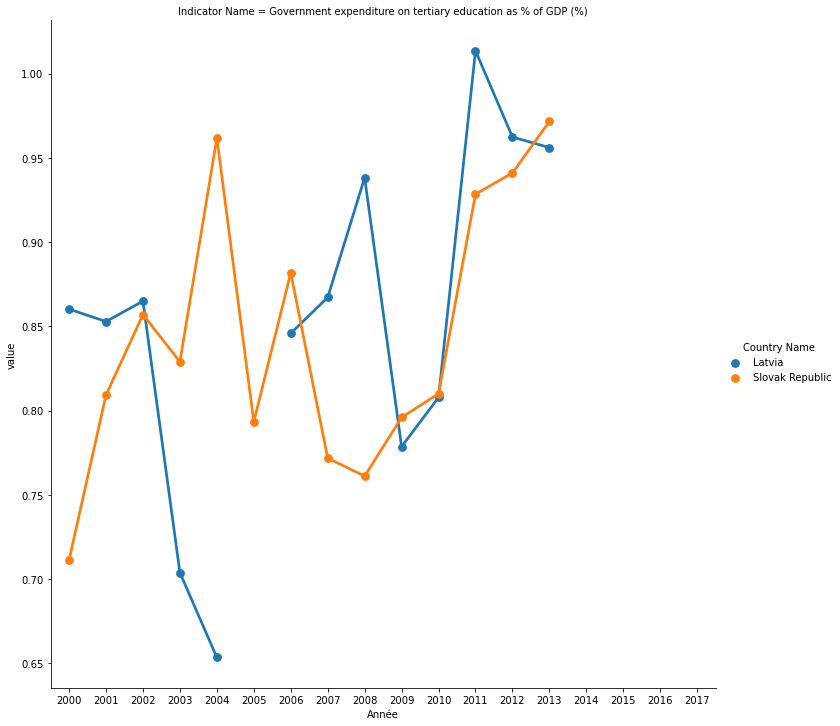

In [ ]:
sns.catplot(x='Année', y='value', data=df_Europe_et_Asie_centrale_3tiary_educ, hue='Country Name', col='Indicator Name', kind='point', height = 10)


### Analyse
Les données ne sont pas suffisamment probantes pour établir des conclusions.

# Résumé

In [ ]:
var_to_study

('GDP, PPP (current international $)',
 'GDP, PPP (constant 2011 international $)',
 'GDP per capita, PPP (current international $)',
 'GDP per capita, PPP (constant 2011 international $)',
 'Government expenditure on secondary education as % of GDP (%)',
 'Government expenditure on tertiary education as % of GDP (%)',
 'Internet users (per 100 people)',
 'Population growth (annual %)',
 'Population, total')

# Asie de l'Est et Pacifique

#### Moyenne d'utilisation d'internet 

In [ ]:
East_Asia_and_pacific_internet = moy_par_indicateur_East_Asia_Pacific[moy_par_indicateur_East_Asia_Pacific['Indicator Name'] == 'Internet users (per 100 people)']
East_Asia_and_pacific_internet.head(5)

Indicator Name Country Name      value
36  Internet users (per 100 people)  Korea, Rep.  76.360066
32  Internet users (per 100 people)    Australia  72.753982
38  Internet users (per 100 people)  New Zealand  72.001721
35  Internet users (per 100 people)        Japan  69.788079
39  Internet users (per 100 people)    Singapore  64.844272

#### Moyenne du PIB / habitant constant 

In [ ]:
East_Asia_and_pacific_PIB_par_habitant_constant = moy_par_indicateur_East_Asia_Pacific[moy_par_indicateur_East_Asia_Pacific['Indicator Name'] == 'GDP per capita, PPP (constant 2011 international $)']
East_Asia_and_pacific_PIB_par_habitant_constant.head(5)

Indicator Name          Country Name  \
5  GDP per capita, PPP (constant 2011 internation...      Macao SAR, China   
1  GDP per capita, PPP (constant 2011 internation...     Brunei Darussalam   
7  GDP per capita, PPP (constant 2011 internation...             Singapore   
2  GDP per capita, PPP (constant 2011 internation...  Hong Kong SAR, China   
0  GDP per capita, PPP (constant 2011 internation...             Australia   

          value  
5  83435.821972  
1  81089.913841  
7  66847.734764  
2  44658.061736  
0  40241.996686

#### Moyenne du total de la population, par pays, sur les dernières année 

In [ ]:
East_Asia_and_pacific_population = moy_par_indicateur_East_Asia_Pacific[moy_par_indicateur_East_Asia_Pacific['Indicator Name'] == 'Population, total']
East_Asia_and_pacific_population.head(5)

Indicator Name          Country Name         value
51  Population, total                 Japan  1.275907e+08
52  Population, total           Korea, Rep.  4.910551e+07
48  Population, total             Australia  2.145270e+07
50  Population, total  Hong Kong SAR, China  6.969818e+06
55  Population, total             Singapore  4.781768e+06

#### Précision statistique

Après recherche la population de Macao en 2017 ne dépasse pas les 625 000 habitants.

Source : https://data.worldbank.org/indicator/SP.POP.TOTL?locations=MO&name_desc=false

#### Moyenne du PIB constant 

In [ ]:
East_Asia_and_pacific_GDP_constant = moy_par_indicateur_East_Asia_Pacific[moy_par_indicateur_East_Asia_Pacific['Indicator Name'] == 'GDP, PPP (constant 2011 international $)']
East_Asia_and_pacific_GDP_constant.head(5)

Indicator Name          Country Name  \
19  GDP, PPP (constant 2011 international $)                 Japan   
20  GDP, PPP (constant 2011 international $)           Korea, Rep.   
16  GDP, PPP (constant 2011 international $)             Australia   
23  GDP, PPP (constant 2011 international $)             Singapore   
18  GDP, PPP (constant 2011 international $)  Hong Kong SAR, China   

           value  
19  4.567899e+12  
20  1.390367e+12  
16  8.675901e+11  
23  3.252734e+11  
18  3.126940e+11

### Analyse

De manière générale, Singapour est le pays cible à retenir. Le pays réponds très favorablement besoin d'équipement en internet, comporte une population riche et dense.

Dans le cadre d'une offre à destination des états ou d'une stratégie de pénétration du marché(offre plus abordable), le Japon, la Korée et l'Australie sont de très bonnes cibles.

# Centre Est et Afrique du Nord

In [ ]:
Centre_Est_et_Afrique_du_Nord_internet = moy_par_indicateur_Middle_East_and_North_Africa[moy_par_indicateur_Middle_East_and_North_Africa['Indicator Name'] == 'Internet users (per 100 people)']
Centre_Est_et_Afrique_du_Nord_internet.head(5)

Indicator Name          Country Name      value
37  Internet users (per 100 people)  United Arab Emirates  59.313105
30  Internet users (per 100 people)               Bahrain  50.685048
33  Internet users (per 100 people)                 Malta  50.496379
31  Internet users (per 100 people)                Israel  48.921582
35  Internet users (per 100 people)                 Qatar  48.269271

In [ ]:
Centre_Est_et_Afrique_du_Nord_PIB_par_habitant_constant = moy_par_indicateur_Middle_East_and_North_Africa[moy_par_indicateur_Middle_East_and_North_Africa['Indicator Name'] == 'GDP per capita, PPP (constant 2011 international $)']
Centre_Est_et_Afrique_du_Nord_PIB_par_habitant_constant.head(5)

Indicator Name          Country Name  \
5  GDP per capita, PPP (constant 2011 internation...                 Qatar   
2  GDP per capita, PPP (constant 2011 internation...                Kuwait   
7  GDP per capita, PPP (constant 2011 internation...  United Arab Emirates   
6  GDP per capita, PPP (constant 2011 internation...          Saudi Arabia   
4  GDP per capita, PPP (constant 2011 internation...                  Oman   

           value  
5  117430.649881  
2   79443.822968  
7   77914.987870  
6   46006.635291  
4   42966.980635

In [ ]:
Centre_Est_et_Afrique_du_Nord_population = moy_par_indicateur_Middle_East_and_North_Africa[moy_par_indicateur_Middle_East_and_North_Africa['Indicator Name'] == 'Population, total']
Centre_Est_et_Afrique_du_Nord_population.head(5)

Indicator Name          Country Name         value
52  Population, total          Saudi Arabia  2.620014e+07
47  Population, total                Israel  7.368076e+06
53  Population, total  United Arab Emirates  6.505238e+06
50  Population, total                  Oman  3.009788e+06
48  Population, total                Kuwait  2.839027e+06

In [ ]:
Centre_Est_et_Afrique_du_Nord_GDP_constant = moy_par_indicateur_Middle_East_and_North_Africa[moy_par_indicateur_Middle_East_and_North_Africa['Indicator Name'] == 'GDP, PPP (constant 2011 international $)']
Centre_Est_et_Afrique_du_Nord_GDP_constant.head(5)

Indicator Name          Country Name  \
21  GDP, PPP (constant 2011 international $)          Saudi Arabia   
22  GDP, PPP (constant 2011 international $)  United Arab Emirates   
17  GDP, PPP (constant 2011 international $)                Kuwait   
16  GDP, PPP (constant 2011 international $)                Israel   
20  GDP, PPP (constant 2011 international $)                 Qatar   

           value  
21  1.216317e+12  
22  4.694754e+11  
17  2.227807e+11  
16  2.138769e+11  
20  1.751089e+11

### Analyse
D'une manière générale, les Emirats Arabes Unis représentent le meilleur candidat.
Dans le cadre d'une offre à destination des états ou d'une stratégie de pénétration du marché(offre plus abordable), les Emirats Arabes Unis, l'Arabie Saoudite, Israël et le Koweit sont de très bonnes cibles.

# Amérique du Nord

In [ ]:
Amerique_du_Nord_internet = moy_par_indicateur_North_America[moy_par_indicateur_North_America['Indicator Name'] == 'Internet users (per 100 people)']
Amerique_du_Nord_internet.head(5)

Indicator Name   Country Name      value
8  Internet users (per 100 people)         Canada  75.002310
9  Internet users (per 100 people)  United States  67.385319

In [ ]:
Amerique_du_Nord_PIB_par_habitant_constant = moy_par_indicateur_North_America[moy_par_indicateur_North_America['Indicator Name'] == 'GDP per capita, PPP (constant 2011 international $)']
Amerique_du_Nord_PIB_par_habitant_constant.head(5)

Indicator Name   Country Name  \
1  GDP per capita, PPP (constant 2011 internation...  United States   
0  GDP per capita, PPP (constant 2011 internation...         Canada   

          value  
1  49605.441304  
0  40724.934354

In [ ]:
Amerique_du_Nord_population = moy_par_indicateur_North_America[moy_par_indicateur_North_America['Indicator Name'] == 'Population, total']
Amerique_du_Nord_population.head(5)

Indicator Name   Country Name         value
13  Population, total  United States  3.033803e+08
12  Population, total         Canada  3.338018e+07

In [ ]:
Amerique_du_Nord_GDP_constant = moy_par_indicateur_North_America[moy_par_indicateur_North_America['Indicator Name'] == 'GDP, PPP (constant 2011 international $)']
Amerique_du_Nord_GDP_constant.head(5)

Indicator Name   Country Name         value
5  GDP, PPP (constant 2011 international $)  United States  1.507389e+13
4  GDP, PPP (constant 2011 international $)         Canada  1.362130e+12

### Analyse
D'une manière générale, les Etats-Unis représentent le meilleur candidat.
Dans le cadre d'une offre à destination des individus le pays reste un bon choix, le Canada reste une cible potentielle.

# Europe et Asie centrale

In [ ]:
Europe_Asie_internet = moy_par_indicateur_Europe_et_Asie_centrale[moy_par_indicateur_Europe_et_Asie_centrale['Indicator Name'] == 'Internet users (per 100 people)']
Europe_Asie_internet.head(10)

Indicator Name    Country Name      value
127  Internet users (per 100 people)         Iceland  86.275284
134  Internet users (per 100 people)          Norway  85.045404
141  Internet users (per 100 people)          Sweden  83.059642
121  Internet users (per 100 people)         Denmark  81.444586
133  Internet users (per 100 people)     Netherlands  79.873268
123  Internet users (per 100 people)         Finland  76.654376
142  Internet users (per 100 people)     Switzerland  75.583391
132  Internet users (per 100 people)      Luxembourg  74.480298
143  Internet users (per 100 people)  United Kingdom  73.480179
125  Internet users (per 100 people)         Germany  70.444952

In [ ]:
Europe_Asie_PIB_par_habitant_constant = moy_par_indicateur_Europe_et_Asie_centrale[moy_par_indicateur_Europe_et_Asie_centrale['Indicator Name'] == 'GDP per capita, PPP (constant 2011 international $)']
Europe_Asie_PIB_par_habitant_constant.head(5)

Indicator Name Country Name  \
16  GDP per capita, PPP (constant 2011 internation...   Luxembourg   
18  GDP per capita, PPP (constant 2011 internation...       Norway   
26  GDP per capita, PPP (constant 2011 internation...  Switzerland   
12  GDP per capita, PPP (constant 2011 internation...      Ireland   
17  GDP per capita, PPP (constant 2011 internation...  Netherlands   

           value  
16  90040.598602  
18  62290.965809  
26  54497.319760  
12  46818.390577  
17  44685.981508

In [ ]:
Europe_Asie_population = moy_par_indicateur_Europe_et_Asie_centrale[moy_par_indicateur_Europe_et_Asie_centrale['Indicator Name'] == 'Population, total']
Europe_Asie_population.head(10)

Indicator Name        Country Name         value
193  Population, total  Russian Federation  1.438984e+08
181  Population, total             Germany  8.186383e+07
180  Population, total              France  6.416499e+07
199  Population, total      United Kingdom  6.193559e+07
185  Population, total               Italy  5.876462e+07
196  Population, total               Spain  4.468464e+07
191  Population, total              Poland  3.811671e+07
189  Population, total         Netherlands  1.649074e+07
182  Population, total              Greece  1.096416e+07
173  Population, total             Belgium  1.075955e+07

In [ ]:
Europe_Asie_GDP_constant = moy_par_indicateur_Europe_et_Asie_centrale[moy_par_indicateur_Europe_et_Asie_centrale['Indicator Name'] == 'GDP, PPP (constant 2011 international $)']
Europe_Asie_GDP_constant.head(10)

Indicator Name        Country Name         value
65  GDP, PPP (constant 2011 international $)             Germany  3.289937e+12
77  GDP, PPP (constant 2011 international $)  Russian Federation  3.062156e+12
64  GDP, PPP (constant 2011 international $)              France  2.361268e+12
83  GDP, PPP (constant 2011 international $)      United Kingdom  2.278731e+12
69  GDP, PPP (constant 2011 international $)               Italy  2.136631e+12
80  GDP, PPP (constant 2011 international $)               Spain  1.439628e+12
75  GDP, PPP (constant 2011 international $)              Poland  7.636609e+11
73  GDP, PPP (constant 2011 international $)         Netherlands  7.373716e+11
57  GDP, PPP (constant 2011 international $)             Belgium  4.327741e+11
82  GDP, PPP (constant 2011 international $)         Switzerland  4.206516e+11

In [ ]:
Europe_Asie_educ_2dary_as_purcent_GDP = moy_par_indicateur_Europe_et_Asie_centrale[moy_par_indicateur_Europe_et_Asie_centrale['Indicator Name'] == 'Government expenditure on secondary education as % of GDP (%)']
Europe_Asie_educ_2dary_as_purcent_GDP.head(5)

Indicator Name     Country Name  \
112  Government expenditure on secondary education ...           Latvia   
113  Government expenditure on secondary education ...  Slovak Republic   

        value  
112  2.238174  
113  1.885144

In [ ]:
Europe_Asie_educ_3rd_as_purcent_GDP = moy_par_indicateur_Europe_et_Asie_centrale[moy_par_indicateur_Europe_et_Asie_centrale['Indicator Name'] == 'Government expenditure on tertiary education as % of GDP (%)']
Europe_Asie_educ_3rd_as_purcent_GDP.head(5)

Indicator Name     Country Name  \
114  Government expenditure on tertiary education a...           Latvia   
115  Government expenditure on tertiary education a...  Slovak Republic   

        value  
114  0.854245  
115  0.844549

### Analyse
Dans le cadre d'une offre "premium", la Norvège et les Pays-Bas sont de très bons candidats.
Dans le cadre d'une offre à destination des états ou d'une stratégie de pénétration du marché (offre plus abordable), l'Allemagne, l'Angleterre reste de d'excellente cibles potentielle. Toutefois, la Russie serait le meilleur candidat, sous réserve d'un équipement suffisant en internet. La Russie comprote un fort PIB, une forte population mais le taux d'équiepement étant une donnée cruciale absente, nous ne pouvons pas la retenir.